# How to Use Data to Find the Best Airbnb Rental Property to Buy 

    Author: Siavash Saki
    Date: datetime.date(2019, 12, 14)

LinkedIn Profile of the author: [Siavash Saki](https://www.linkedin.com/in/siavash-saki/)

## Introduction

For a long time, my girlfriend and I have been discussing to invest in real estate. One idea we came up with is to buy an apartment and rent it out on Airbnb. 

Airbnb is an online marketplace which lets people rent out their properties or spare rooms to guests. [Reference](https://home.bt.com/lifestyle/travel/travel-advice/what-is-airbnb-11363981595930) Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its inception in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year.

In Germany, no city is more popular than our home town, **Berlin**. That implies that Berlin is one of the hottest markets for Airbnb in Europe, with over 24,000 listings as of November 2019. With a size of 891 km², this means there are roughly 27 homes being rented out per km² in Berlin on Airbnb!
[Refrence](https://www.kaggle.com/brittabettendorf/what-factors-influence-demand-eda-occupancy)
So it seems like a promising idea to make this investment, but we cannot just take it for granted. We have to do some financial analysis and find out if this investment is right for us. After proving this point, the most important question will follow: which apartment should we buy? There are thousands of apartments in Berlin.

The key to the success of any real estate investment business is finding the right property in a top location. The same holds true for investing in an Airbnb rental property. No matter how great of a property manager and an Airbnb host we are, we cannot do well and make a lot of money unless we buy a profitable property first. [Reference](https://www.igms.com/airbnb-property-to-buy/)

The following question will drive this project:

> **Is an Airbnb Investment Right for me? if yes, how can I find the best Airbnb rental property in berlin to buy and which property should I buy?**

The initial data we need in order to answer this question are: **Berlin Airbnb listings dataset** and **available apartments in Berlin to buy dataset**. Using these datasets, we build a model to predict Berlin Airbnb Yearly Incomes. Then we apply this model on buying aprtements to predict their approximate yearly income. Finally we do some financial analysis to see which apartment has a shorter **Payback Period** and make us more money.

Using Longitude and Latitude in Airbnb Dataset, we can extract usefull geolocation data from Foursquare Database. In this project, **Foursquare Data** is used to refine our price prediction model for airbnb rental price.

**Note:** 

* **Berlin Airbnb listings dataset** is downloaded from [insideairbnb](http://insideairbnb.com/get-the-data.html).
* **Available apartments in Berlin to buy dataset** is scraped from [ImmoScout24](https://www.immobilienscout24.de/).
* **Foursquare Data** is downloaded using Foursquare Rest API. [Foursquare](https://developer.foursquare.com/)
* **Longitude** and **Latitude** data are dwonloaded using HERE Rest API. [HERE](https://www.here.com/)

## Table of Contents
    
1. [Obtaining and Analysing Airbnb Dataset](#1.-Analysing-Airbnb-Dataset)

    1.1. [Download and Explore the Airbnb Dataset](#1.1.-Download-and-Explore-the-Airbnb-Dataset)
    
    1.2. [Cleaning the Data](#1.2.-Cleaning-the-Data)    
    
    1.3. [Feature Engineering](#1.3.-Feature-Engineering)
    
    1.4. [Exploratory Data Analysis (EDA)](#1.4.-Exploratory-Data-Analysis-(EDA))
    
    1.5. [Building the Prediction model](#1.5.-Building-the-Prediction-model)
    

2. [Obtaining and Analysing ImmobilienScout Data](#2.-Obtaining-and-Viewing-the-ImmobilienScout-Data)

    2.1. [Data Scraping from ImmobilienScout24](#2.1.-Data-Scraping-from-ImmobilienScout24)
    
    2.2. [Cleaning the Data](#2.2.-Cleaning-the-Data)
    
    2.3. [Geocoding Using HERE Rest API](#2.3.-Geocoding-Using-HERE-Rest-API)
    
    2.4. [KNN Model for predicting districts and neighborhoods](#2.4.-KNN-Model-for-predicting-districts-and-neighborhoods)
    
    2.5. [Exploratory Data Analysis (EDA)](#2.5.-Exploratory-Data-Analysis-(EDA))
    
    2.6. [Getting Foursquare Data](#2.6.-Getting-Foursquare-Data)


3. [Predicting Yearly Incomes and Fincancial Analysis](#3.-Predicting-Yearly-Incomes-and-Fincancial-Analysis)

    3.1. [Processing ImmobilienScout Data](#3.1.-Processing-ImmobilienScout-Data)
    
    3.2. [Results Evaluation](#3.2.-Results-Evaluation)
    
    3.3. [Financial Analysis](#3.3.-Financial-Analysis)

    3.4. [Discussion](#3.4.-Discussion)
    
    
4. [Summary and Conclusion](#4.-Summary-and-Conclusion)




# 1. Analysing Airbnb Dataset

Before going through all the trouble of data mining, I did a search on Airbnb dataset and found a website named http://insideairbnb.com/ with everything I needed. The datasets were scraped on November 12th, 2019 and contain detailed listings data, review data and calendar data of current Airbnb listings in Berlin. This data was created by Murray Cox and his Inside Airbnb project which can be found [here](http://insideairbnb.com/get-the-data.html). Fortunately, this saves us a lot of time and effort.

Before we start, let's import necessary libraries for our analysis.

In [1]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 40)

# library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# library for searching patterns in a text
import re

# library to handle requests
import requests 

# library to handle JSON files
import json
from pandas.io.json import json_normalize

# library for plotting geo data
import folium

# library for web scraping
from bs4 import BeautifulSoup

# sleep function to wait a specific amount of time in the middle of code
from time import sleep

## 1.1. Download and Explore the Airbnb Dataset 

First, we download the berlin airbnb dataset.

In [2]:
# Downloading the berlin airbnb dataset

print('Beginning file download...\n')
!wget -O 'berlin-airbnb-listings.csv.gz' http://data.insideairbnb.com/germany/be/berlin/2019-11-12/data/listings.csv.gz

Beginning file download...

--2020-01-15 14:08:06--  http://data.insideairbnb.com/germany/be/berlin/2019-11-12/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.217.32.131
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.217.32.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20258242 (19M) [application/x-gzip]
Saving to: ‘berlin-airbnb-listings.csv.gz’

berlin-airbnb-listi 100%[===================>]  19,32M  3,20MB/s    in 6,4s    

2020-01-15 14:08:13 (3,02 MB/s) - ‘berlin-airbnb-listings.csv.gz’ saved [20258242/20258242]



The data is compressed and needs to be extracted.

In [6]:
# Extracting .gz file

!gunzip 'berlin-airbnb-listings.csv.gz'
print('Data extracted!')

gzip: berlin-airbnb-listings.csv already exists; do you wish to overwrite (y or n)? ^C
Data extracted!


In [7]:
# reading csv data

df= pd.read_csv('berlin-airbnb-listings.csv', low_memory=False)

In [8]:
# checking data

df.head()

id                        listing_url       scrape_id last_scraped  \
0  1944  https://www.airbnb.com/rooms/1944  20191112224519   2019-11-14   
1  3176  https://www.airbnb.com/rooms/3176  20191112224519   2019-11-14   
2  3309  https://www.airbnb.com/rooms/3309  20191112224519   2019-11-14   
3  6883  https://www.airbnb.com/rooms/6883  20191112224519   2019-11-14   
4  7071  https://www.airbnb.com/rooms/7071  20191112224519   2019-11-14   

                                                name  \
0                             cafeheaven Pberg/Mitte   
1                    Fabulous Flat in great Location   
2                  BerlinSpot Schöneberg near KaDeWe   
3  Stylish East Side Loft in Center with AC & 2 b...   
4                   BrightRoom with sunny greenview!   

                                             summary  \
0  Private, bright and friendly room. You'd be sh...   
1  This beautiful first floor apartment  is situa...   
2  First of all: I prefer short-notice bookings. ...   
3                                                NaN   
4  Cozy and large room in the beautiful district ...   

                                               space  \
0  The room is very large, private, cozy, bright,...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   
3  Stay in a stylish loft on the second floor and...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description experiences_offered  \
0  Private, bright and friendly room. You'd be sh...                none   
1  This beautiful first floor apartment  is situa...                none   
2  First of all: I prefer short-notice bookings. ...                none   
3  Stay in a stylish loft on the second floor and...                none   
4  Cozy and large room in the beautiful district ...                none   

                               neighborhood_overview  \
0  near all the trendy cafés and flea markets and...   
1  The neighbourhood is famous for its variety of...   
2  My flat is in the middle of West-Berlin, direc...   
3  The emerging and upcoming East of the new hip ...   
4  Great neighborhood with plenty of Cafés, Baker...   

                                               notes  \
0  Please check-in by 10pm, and we can't accept c...   
1  We welcome FAMILIES and cater especially for y...   
2  The flat is a strictly non-smoking facility! A...   
3  Information on Berlin Citytax: English (Websit...   
4  I hope you enjoy your stay to the fullest! Ple...   

                                             transit  \
0  There is ample street parking. We are near 2  ...   
1  We are 5 min walk  away from the tram M2, whic...   
2  The public transportation is excellent: Severa...   
3  Location: - Very close to Alexanderplatz just ...   
4  Best access to other parts of the city via pub...   

                                              access  \
0  Your room, the bathroom and the kitchen, and o...   
1  The apartment will be entirely yours. We are c...   
2  I do have a strictly non-smoker-flat.  Keep th...   
3  More details: - Electricity, heating fees and ...   
4  The guests have access to the bathroom, a smal...   

                                         interaction  \
0  I'll be traveling a lot in the summer and not ...   
1  Feel free to ask any questions prior to bookin...   
2  I'm working as a freelancing photographer. My ...   
3  I rent out my space when I am travelling so I ...   
4  I am glad if I can give you advice or help as ...   

                                         house_rules  ...  \
0  Please do not use the wireless Internet access...  ...   
1  It’s a non smoking flat, which likes to be tre...  ...   
2  House-Rules and Information ..............(deu...  ...   
3  No Pets.  No loud Parties.  Smoking only on th...  ...   
4  Please take good care of everything during you...  ...   

   review_scores_location  review_

In [9]:
# Checking the size of dataset

print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 24586 rows and 106 columns.


Our dataset has more than 24586 listings entries with 106 datapoints for each entry. Let's take a look at columns.

In [10]:
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

There are too many datapoints in this dataset. We select just the ones that are needed for our prediction model.

In [11]:
selected_cols=[
'id',
'summary',
'space',
'description',
'host_is_superhost',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood',  
'neighbourhood_group_cleansed',
'latitude',
'longitude',
'room_type',
'accommodates',
'bed_type',
'amenities',
'square_feet',
'price',
'cleaning_fee',
'guests_included',
'extra_people',
'number_of_reviews',
'review_scores_rating',
'instant_bookable',
'cancellation_policy'
]

In [12]:
print(f'{len(selected_cols)} Columns are selected.')

24 Columns are selected.


In [13]:
# keep the selected columns

airbnb= df[selected_cols].copy()

In [14]:
# look at the head of the dataframe

airbnb.head()

id                                            summary  \
0  1944  Private, bright and friendly room. You'd be sh...   
1  3176  This beautiful first floor apartment  is situa...   
2  3309  First of all: I prefer short-notice bookings. ...   
3  6883                                                NaN   
4  7071  Cozy and large room in the beautiful district ...   

                                               space  \
0  The room is very large, private, cozy, bright,...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   
3  Stay in a stylish loft on the second floor and...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description host_is_superhost  \
0  Private, bright and friendly room. You'd be sh...                 f   
1  This beautiful first floor apartment  is situa...                 f   
2  First of all: I prefer short-notice bookings. ...                 f   
3  Stay in a stylish loft on the second floor and...                 f   
4  Cozy and large room in the beautiful district ...                 t   

  host_has_profile_pic host_identity_verified    neighbourhood  \
0                    t                      t          Wedding   
1                    t                      t  Prenzlauer Berg   
2                    t                      f       Schöneberg   
3                    t                      t   Friedrichshain   
4                    t                      t  Prenzlauer Berg   

  neighbourhood_group_cleansed  latitude  longitude        room_type  \
0                        Mitte  52.54425   13.39749     Private room   
1                       Pankow  52.53500   13.41758  Entire home/apt   
2       Tempelhof - Schöneberg  52.49885   13.34906     Private room   
3     Friedrichshain-Kreuzberg  52.51171   13.45477  Entire home/apt   
4                       Pankow  52.54316   13.41509     Private room   

   accommodates       bed_type  \
0             1       Real Bed   
1             4       Real Bed   
2             1  Pull-out Sofa   
3             2       Real Bed   
4             2       Real Bed   

                                           amenities  square_feet    price  \
0  {"Cable TV",Internet,Wifi,"Free street parking...          NaN   $21.00   
1  {Internet,Wifi,Kitchen,"Buzzer/wireless interc...        720.0   $90.00   
2  {Internet,Wifi,"Pets live on this property",Ca...          0.0   $28.00   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...          NaN  $125.00   
4  {Wifi,Heating,"Family/kid friendly",Essentials...          NaN   $33.00   

  cleaning_fee  guests_included extra_people  number_of_reviews  \
0        $0.00                1       $10.00                 18   
1      $100.00                2       $20.00                145   
2       $30.00                1       $18.00                 27   
3       $39.00                1        $0.00                128   
4        $0.00                1       $25.00                266   

   review_scores_rating instant_bookable          cancellation_policy  
0                  82.0                f                     moderate  
1                  93.0                f  strict_14_with_grace_period  
2                  89.0                f  strict_14_with_grace_period  
3                  99.0                f                     moderate  
4                  96.0                f                     moderate

Check for duplicates:

In [15]:
# duplicates

airbnb.duplicated().sum()

0

Getting info of the dataframe:

In [16]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24586 entries, 0 to 24585
Data columns (total 24 columns):
id                              24586 non-null int64
summary                         23373 non-null object
space                           15961 non-null object
description                     24162 non-null object
host_is_superhost               24558 non-null object
host_has_profile_pic            24558 non-null object
host_identity_verified          24558 non-null object
neighbourhood                   24515 non-null object
neighbourhood_group_cleansed    24586 non-null object
latitude                        24586 non-null float64
longitude                       24586 non-null float64
room_type                       24586 non-null object
accommodates                    24586 non-null int64
bed_type                        24586 non-null object
amenities                       24586 non-null object
square_feet                     429 non-null float64
price                       

In [17]:
airbnb.describe(include=['O'])

summary  \
count                                               23373   
unique                                              22619   
top     with en-suite bathroom, TV, WIFI, bed linen, a...   
freq                                                   15   

                                                    space  \
count                                               15961   
unique                                              15315   
top     The Singer 109 Hostel is located in the heart ...   
freq                                                   45   

                                              description host_is_superhost  \
count                                               24162             24558   
unique                                              23681                 2   
top     Eine 24-Stunden-Rezeption und einfach eingeric...                 f   
freq                                                   10             20553   

       host_has_profile_pic host_identity_verified neighbourhood  \
count                 24558                  24558         24515   
unique                    2                      2            92   
top                       t                      f      Neukölln   
freq                  24481                  15971          3537   

       neighbourhood_group_cleansed        room_type  bed_type amenities  \
count                         24586            24586     24586     24586   
unique                           12                4         5     21940   
top        Friedrichshain-Kreuzberg  Entire home/apt  Real Bed        {}   
freq                           5869            12381     23923        61   

         price cleaning_fee extra_people instant_bookable cancellation_policy  
count    24586        17389        24586            24586               24586  
unique     334          128           63                2                   6  
top     $50.00        $0.00        $0.00                f            flexible  
freq      1412         2351        12001            15984                9641

Almost all of the hosts have profile pic. So *host_has_profile_pic* column doesn't add any information. I drop it.

In [18]:
# Drop "host_has_profile_pic" column

airbnb.drop(columns=['host_has_profile_pic'], axis=1, inplace=True)

Let's take a look at null values.

In [19]:
# sum of null values in each column

airbnb.isnull().sum()

id                                  0
summary                          1213
space                            8625
description                       424
host_is_superhost                  28
host_identity_verified             28
neighbourhood                      71
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
accommodates                        0
bed_type                            0
amenities                           0
square_feet                     24157
price                               0
cleaning_fee                     7197
guests_included                     0
extra_people                        0
number_of_reviews                   0
review_scores_rating             4551
instant_bookable                    0
cancellation_policy                 0
dtype: int64

Well, there seems to be some null values in the dataset. Let's visualize it for a better insight:

Text(0.5, 1, '\nMissing Data in Airbnb Dataset\n')

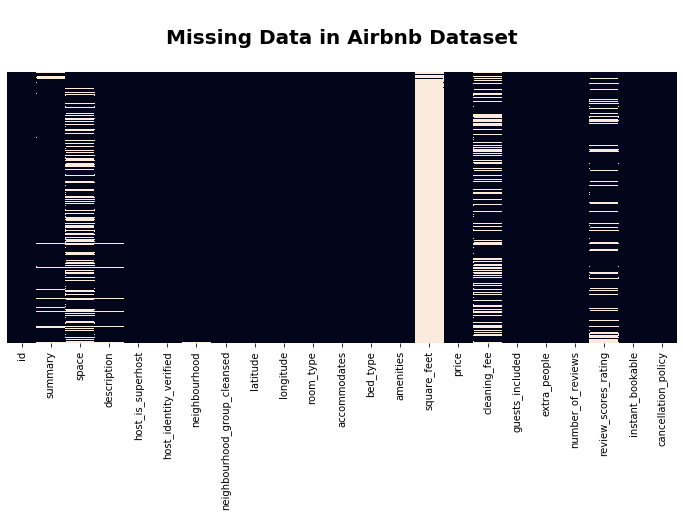

In [20]:
# visualize null values using seaborn heatmap function

plt.figure(figsize=(12,5))
sns.heatmap(airbnb.isnull(),yticklabels=False,cbar=False)
plt.title('\nMissing Data in Airbnb Dataset\n',y=1, fontsize=20, fontweight='bold')

We also drop *square_feet* column, as it is almost all NaN values.

In [21]:
# Drop "square_feet" column

airbnb.drop(columns=['square_feet'], axis=1, inplace=True)

Replace superhosts null values with False:

In [22]:
# Number of superhosts

airbnb['host_is_superhost'].value_counts()

f    20553
t     4005
Name: host_is_superhost, dtype: int64

In [23]:
# replacing null values with "f"

airbnb['host_is_superhost']= airbnb['host_is_superhost'].fillna('f')

In [24]:
superhost_nulls= airbnb["host_is_superhost"].isnull().sum()

print(f'There are {superhost_nulls} null values in "host_is_superhost".')
print('Regular hosts: {}\nSuperhosts: {}'.format(*airbnb['host_is_superhost'].value_counts().values))

There are 0 null values in "host_is_superhost".
Regular hosts: 20581
Superhosts: 4005


Replace verified hosts null values with True:

In [25]:
# Number of verified hosts

airbnb['host_identity_verified'].value_counts()

f    15971
t     8587
Name: host_identity_verified, dtype: int64

In [26]:
# replacing null values with "f"

airbnb['host_identity_verified']= airbnb['host_identity_verified'].fillna('f')

In [27]:
print(f"There are {airbnb['host_identity_verified'].isnull().sum()} null values in 'host_identity_verified'.")
print('not verified hosts: {}\nverified hosts: {}'.format(*airbnb['host_identity_verified'].value_counts().values))

There are 0 null values in 'host_identity_verified'.
not verified hosts: 15999
verified hosts: 8587


We set the *cleaning_fee* null values to zero.

In [28]:
# replacing null values with 0

airbnb['cleaning_fee'].fillna('$0.00', inplace=True)

In [29]:
print(f"There are {airbnb['cleaning_fee'].isnull().sum()} null values in 'cleaning_fee'.")

There are 0 null values in 'cleaning_fee'.


Next column to deal with is *review_scores_rating*. I guess the rows which have no reviews have a null values for *review_scores_rating*. So let's take a look:

In [30]:
# number of not noll values in review_scores_rating when number_of_reviews is equal to zero

airbnb['review_scores_rating'][airbnb['number_of_reviews']==0].notnull().sum()

2

Besides 2 of them, for the rest, our statement is true. So we get rid of them. In addition, to have a meaningful estimated price, the apartment has to have been rated at least several times. We set the limit to 8 times and remove the rest rows.

In [31]:
# keeping the rows with atleast 8 reviews

airbnb= airbnb[airbnb['number_of_reviews']>7]

In [32]:
# look at missing values

airbnb.isnull().sum()

id                                 0
summary                          511
space                           2289
description                       72
host_is_superhost                  0
host_identity_verified             0
neighbourhood                      0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bed_type                           0
amenities                          0
price                              0
cleaning_fee                       0
guests_included                    0
extra_people                       0
number_of_reviews                  0
review_scores_rating               0
instant_bookable                   0
cancellation_policy                0
dtype: int64

We don't need *number_of_reviews* anymore. We drop it.

In [33]:
# Drop "number_of_reviews" column

airbnb.drop(columns=['number_of_reviews'], axis=1, inplace=True)

we succesfully got rid of missing values, except of values in *summary*, *space* and *description*. We need these columns to extract living area later. But we drop the rows, in which all these three features are null.

In [34]:
# set threshhold

t= len(airbnb.columns)- 2

In [35]:
# Require that many non-NA values

airbnb.dropna(thresh=t, inplace=True)

In [36]:
# look at the new size

print(f'The dataset has {airbnb.shape[0]} rows and {airbnb.shape[1]} columns.')

The dataset has 10252 rows and 21 columns.


## 1.2. Cleaning the Data

We continue by cleaning the data. First we convert letter **t** and **f** into **1** and **0** in *host_is_superhost*, *host_identity_verified* and *instant_bookable* columns.

In [37]:
# one hote encoding on "host_is_superhost", "host_identity_verified" and "instant_bookable"

airbnb['host_is_superhost'] = airbnb['host_is_superhost'].apply(lambda x: 't' in x).astype(int)

airbnb['host_identity_verified'] = airbnb['host_identity_verified'].apply(lambda x: 't' in x).astype(int)

airbnb['instant_bookable'] = airbnb['instant_bookable'].apply(lambda x: 't' in x).astype(int)

Let's check the head of our dataframe.

In [38]:
# check the first 5 rows

airbnb.head()

id                                            summary  \
0  1944  Private, bright and friendly room. You'd be sh...   
1  3176  This beautiful first floor apartment  is situa...   
2  3309  First of all: I prefer short-notice bookings. ...   
3  6883                                                NaN   
4  7071  Cozy and large room in the beautiful district ...   

                                               space  \
0  The room is very large, private, cozy, bright,...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   
3  Stay in a stylish loft on the second floor and...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description  host_is_superhost  \
0  Private, bright and friendly room. You'd be sh...                  0   
1  This beautiful first floor apartment  is situa...                  0   
2  First of all: I prefer short-notice bookings. ...                  0   
3  Stay in a stylish loft on the second floor and...                  0   
4  Cozy and large room in the beautiful district ...                  1   

   host_identity_verified    neighbourhood neighbourhood_group_cleansed  \
0                       1          Wedding                        Mitte   
1                       1  Prenzlauer Berg                       Pankow   
2                       0       Schöneberg       Tempelhof - Schöneberg   
3                       1   Friedrichshain     Friedrichshain-Kreuzberg   
4                       1  Prenzlauer Berg                       Pankow   

   latitude  longitude        room_type  accommodates       bed_type  \
0  52.54425   13.39749     Private room             1       Real Bed   
1  52.53500   13.41758  Entire home/apt             4       Real Bed   
2  52.49885   13.34906     Private room             1  Pull-out Sofa   
3  52.51171   13.45477  Entire home/apt             2       Real Bed   
4  52.54316   13.41509     Private room             2       Real Bed   

                                           amenities    price cleaning_fee  \
0  {"Cable TV",Internet,Wifi,"Free street parking...   $21.00        $0.00   
1  {Internet,Wifi,Kitchen,"Buzzer/wireless interc...   $90.00      $100.00   
2  {Internet,Wifi,"Pets live on this property",Ca...   $28.00       $30.00   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...  $125.00       $39.00   
4  {Wifi,Heating,"Family/kid friendly",Essentials...   $33.00        $0.00   

   guests_included extra_people  review_scores_rating  instant_bookable  \
0                1       $10.00                  82.0                 0   
1                2       $20.00                  93.0                 0   
2                1       $18.00                  89.0                 0   
3                1        $0.00                  99.0                 0   
4                1       $25.00                  96.0                 0   

           cancellation_policy  
0                     moderate  
1  strict_14_with_grace_period  
2  strict_14_with_grace_period  
3                     moderate  
4                     moderate

It looks good. Let's take care of price columns. We have to extract the number and change the data type.

In [39]:
# function for extracting price

def get_price(price):
    
    """
    function to extract only number of price in a
    string. Strings can be in these format: 
    $50.00
    $2,500.00
    
    input: string
    return: string
    """
    
    p= price.split('$')[1].split('.')[0]
    if len(p)<4:
        return p
    else:
        return "".join(p.split(','))

In [40]:
# apply the get_price function to price columns

airbnb['price']= airbnb['price'].apply(get_price).astype(int)

airbnb['cleaning_fee']= airbnb['cleaning_fee'].apply(get_price).astype(int)

airbnb['extra_people']= airbnb['extra_people'].apply(get_price).astype(int)

In [41]:
# check head of dataframe

airbnb.head()

id                                            summary  \
0  1944  Private, bright and friendly room. You'd be sh...   
1  3176  This beautiful first floor apartment  is situa...   
2  3309  First of all: I prefer short-notice bookings. ...   
3  6883                                                NaN   
4  7071  Cozy and large room in the beautiful district ...   

                                               space  \
0  The room is very large, private, cozy, bright,...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   
3  Stay in a stylish loft on the second floor and...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description  host_is_superhost  \
0  Private, bright and friendly room. You'd be sh...                  0   
1  This beautiful first floor apartment  is situa...                  0   
2  First of all: I prefer short-notice bookings. ...                  0   
3  Stay in a stylish loft on the second floor and...                  0   
4  Cozy and large room in the beautiful district ...                  1   

   host_identity_verified    neighbourhood neighbourhood_group_cleansed  \
0                       1          Wedding                        Mitte   
1                       1  Prenzlauer Berg                       Pankow   
2                       0       Schöneberg       Tempelhof - Schöneberg   
3                       1   Friedrichshain     Friedrichshain-Kreuzberg   
4                       1  Prenzlauer Berg                       Pankow   

   latitude  longitude        room_type  accommodates       bed_type  \
0  52.54425   13.39749     Private room             1       Real Bed   
1  52.53500   13.41758  Entire home/apt             4       Real Bed   
2  52.49885   13.34906     Private room             1  Pull-out Sofa   
3  52.51171   13.45477  Entire home/apt             2       Real Bed   
4  52.54316   13.41509     Private room             2       Real Bed   

                                           amenities  price  cleaning_fee  \
0  {"Cable TV",Internet,Wifi,"Free street parking...     21             0   
1  {Internet,Wifi,Kitchen,"Buzzer/wireless interc...     90           100   
2  {Internet,Wifi,"Pets live on this property",Ca...     28            30   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...    125            39   
4  {Wifi,Heating,"Family/kid friendly",Essentials...     33             0   

   guests_included  extra_people  review_scores_rating  instant_bookable  \
0                1            10                  82.0                 0   
1                2            20                  93.0                 0   
2                1            18                  89.0                 0   
3                1             0                  99.0                 0   
4                1            25                  96.0                 0   

           cancellation_policy  
0                     moderate  
1  strict_14_with_grace_period  
2  strict_14_with_grace_period  
3                     moderate  
4                     moderate

Prices look good. They are now in numerical format. Next, we have to take care of *bed_type*. Let's take a look at bed types.

In [42]:
# count unique values in 'bed_type' column

airbnb['bed_type'].value_counts()

Real Bed         9918
Pull-out Sofa     207
Futon              87
Couch              33
Airbed              7
Name: bed_type, dtype: int64

There are mainly two types of beds. Either it is a real bed or not. I believe it doesn't matter much if it is a couch or Pull-out Sofa. So we change **Real Bed** to **1** and everything else to **0**.

In [43]:
# Change values in 'bed_type' columns in '1' and '0'

airbnb['bed_type']= airbnb['bed_type'].apply(lambda x: 'Real Bed' in x).astype(int)

Next categorical coumn is *cancellation_policy*. Let's take a look at it:

In [44]:
# count unique values in 'cancellation_policy' column

airbnb['cancellation_policy'].value_counts()

strict_14_with_grace_period    4022
moderate                       3895
flexible                       2260
super_strict_30                  69
super_strict_60                   6
Name: cancellation_policy, dtype: int64

There are mainly three types of cancellation. **strict**, **moderate** and **flexible**. There are actually three types of strict cancellation. But I believe there is not a big difference between them. We put them all in strict category. First, we change all strict types to one general strict:

In [45]:
# function which turns values for all types of strict in 'cancellation_policy' into 'strict'

def strict(x):
    if x!='moderate' and x!='flexible':
        return 'strict'
    else:
        return x

In [46]:
# apply strict function to 'cancellation_policy' column

airbnb['cancellation_policy']= airbnb['cancellation_policy'].apply(strict)

Let's check the 'cancellation_policy' column:

In [47]:
# count unique values in 'cancellation_policy' column and see if the function worked properly

airbnb['cancellation_policy'].value_counts()

strict      4097
moderate    3895
flexible    2260
Name: cancellation_policy, dtype: int64

It looks good. We use one hot encoding to change this column into numerical format. In order to avoid multi colinearity error we drop one of the columns.

In [48]:
# change 'cancellation_policy' into catergory dummies, we drop 'flexible' 

cat_dummy = pd.get_dummies(airbnb['cancellation_policy'],drop_first=True)

# concatenate dummy categories with dataframe

airbnb=pd.concat([airbnb,cat_dummy],axis=1)

# drop the 'cancellation_policy' column as we don't need it anymore

# airbnb.drop('cancellation_policy', axis=1, inplace=True)

Next column to take care of is *room_type*. Let's take a look at its values:

In [49]:
# count unique values in 'room_type' column

airbnb['room_type'].value_counts()

Entire home/apt    5352
Private room       4684
Shared room         115
Hotel room          101
Name: room_type, dtype: int64

There are basically two types of places. It is either a private place with private bathroom or it is shares bathroom or living area. We change **Entire home/apt** and **Hotel room** to **1** as private and **Private room** and **Shared room** to **0** as shared.

In [50]:
# change 'room_type' column in two categories for 'private' and 'share'
# new column called 'private' to store these data

airbnb['private']= airbnb['room_type'].apply(lambda x: 'Entire home/apt' in x or 'Hotel room' in x).astype(int)

In [51]:
# drop 'room_type' column

airbnb.drop('room_type', axis=1, inplace=True)

In [52]:
# check frist three rows of dataframe and see if everything is correct

airbnb.head(3)

id                                            summary  \
0  1944  Private, bright and friendly room. You'd be sh...   
1  3176  This beautiful first floor apartment  is situa...   
2  3309  First of all: I prefer short-notice bookings. ...   

                                               space  \
0  The room is very large, private, cozy, bright,...   
1  1st floor (68m2) apartment on Kollwitzplatz/ P...   
2  Your room is really big and has 26 sqm, is ver...   

                                         description  host_is_superhost  \
0  Private, bright and friendly room. You'd be sh...                  0   
1  This beautiful first floor apartment  is situa...                  0   
2  First of all: I prefer short-notice bookings. ...                  0   

   host_identity_verified    neighbourhood neighbourhood_group_cleansed  \
0                       1          Wedding                        Mitte   
1                       1  Prenzlauer Berg                       Pankow   
2                       0       Schöneberg       Tempelhof - Schöneberg   

   latitude  longitude  accommodates  bed_type  \
0  52.54425   13.39749             1         1   
1  52.53500   13.41758             4         1   
2  52.49885   13.34906             1         0   

                                           amenities  price  cleaning_fee  \
0  {"Cable TV",Internet,Wifi,"Free street parking...     21             0   
1  {Internet,Wifi,Kitchen,"Buzzer/wireless interc...     90           100   
2  {Internet,Wifi,"Pets live on this property",Ca...     28            30   

   guests_included  extra_people  review_scores_rating  instant_bookable  \
0                1            10                  82.0                 0   
1                2            20                  93.0                 0   
2                1            18                  89.0                 0   

  cancellation_policy  moderate  strict  private  
0            moderate         1       0        0  
1              strict         0       1        1  
2              strict         0       1        0

Next, let's take a look at prices and see if there are unusual valuables.

In [53]:
airbnb['price'].sort_values().head()

12474    0
10758    0
14310    1
13605    8
1825     9
Name: price, dtype: int64

There is a room with *0* eur per night. We delete it.

In [54]:
airbnb.drop(index=12474, inplace=True)

In [55]:
airbnb['price'].sort_values(ascending=False).head()

16071    6000
16289    6000
3933     4240
1741     2500
14473    2500
Name: price, dtype: int64

There are some really expensive apartments in our dataset, which will not be usefull to our model. Let's plot price columns.

Text(0.5, 0, 'Price per Night (€)')

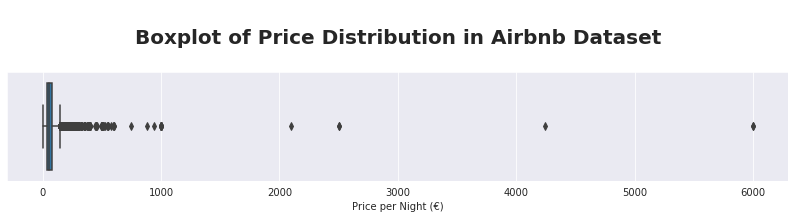

In [56]:
# boxplot of price data
sns.set_style('darkgrid')
plt.figure(figsize=(14,2))
sns.boxplot(x='price',data=airbnb)
plt.title('\nBoxplot of Price Distribution in Airbnb Dataset\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Price per Night (€)')

We use Interquartile Rule to eliminate outliers.

In [57]:
# Computing IQR
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

In [58]:
print(f"{airbnb.shape[0]/airbnb[airbnb['price']<= Q3+1.5*IQR].shape[0]:.2f} percent of data are outliers.")

1.07 percent of data are outliers.


In [59]:
# eliminate outliers
airbnb= airbnb[airbnb['price']<= Q3+1.5*IQR]

Text(0.5, 0, 'Price per Night (€)')

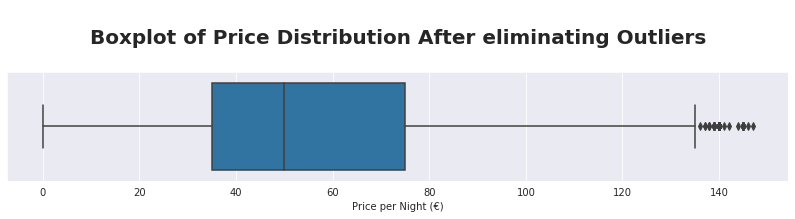

In [60]:
# boxplot of price data after eliminating outliers
plt.figure(figsize=(14,2))
sns.boxplot(x='price',data=airbnb)
plt.title('\nBoxplot of Price Distribution After eliminating Outliers\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Price per Night (€)')

Text(0.5, 0, 'Price per Night (€)')

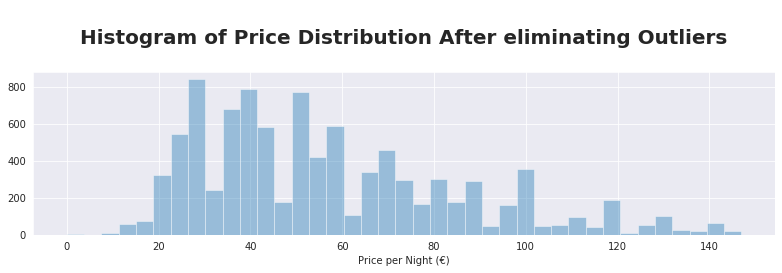

In [61]:
# histogram of price data after eliminating outliers
plt.figure(figsize=(13.3,3))
sns.distplot(a=airbnb['price'],kde=False)
plt.title('\nHistogram of Price Distribution After eliminating Outliers\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Price per Night (€)')

The prices look reasonable and there isn't any unusual entry. Let's continue.

## 1.3. Feature Engineering

#### Feature Engineering 1: Living area

One of the most important features of apartments in predicting their rentak price is their living area. This is not included in the dataset and we need this. *square_feet* column was heavily filled with null values and we droped it. So we use **NLP** to see if we can take something out of *description*, *summary* and *space* columns. They seem to be rich in content

Let's take a look at some columns and try to find a pattern:

In [62]:
# print some space text

for text in airbnb['space'].iloc[51:55]:
    print(text)
    print()

The bright guest room (18 m²) is located above our apartment on the 4th floor of a renovated, historically listed Wilhelminian-style building. It has an independent entrance and can be reached by a stairway whose entrance is located in a charming inner courtyard. A long corridor in common-use with another rental unit leads to the guest room which has been fully renovated and is equipped with a King size bed  (180 x 200 cm), an antique wardrobe, a desk, TV with DVD and Wireless Internet. A private and fully renovated bathroom with bathtub is at your exclusive disposal. You can also use our 25 m² terrace and enjoy a panorama view of Berlin and the park at Gleisdreieck. We intalled a summer kitchen on it with sink, fridge and water boiler to make breakfast possible and convenient.      Our building is located southeast of Potsdamer Platz in a very quiet but urban and central area. The Hornstr. is a traffic-calmed street with a broad esplanade along the middle covered with trees. All the b

We looked at 4 texts. The living area is mentioned in all of them in these ways:
* 40 m²
* 33qm
* 85 sqm
* 90 sqm

So there seems to be a pattern. We extract: **double-digit or three-digit numbers which are followed by *m*, *s*, *q*, with or without a space.**

Note 1: *q* is abreviated form of *Quadratmeter* which is german word for square meters. \
Note 2: If the letter *B* is followed by *M*, it is most probably *internet speed* (Mbit), which I neglect. \
Note 3: If the letter *I* is followed by *M*, it is most probably *Minutes*, which I also neglect.

So our regex pattern looks like this: `\d{2,3}\s?[sqmSMQ][^BbIi]`

We first look at *space* column, if we cant find something or it is null, we look at *description* and *summary*.

In [63]:
# Merging all texts together

all_texts= airbnb[['space','description','summary']].astype(str)
all_texts['merged']= all_texts['space'] + all_texts['description'] + all_texts['summary']

# extract numbers

airbnb['size'] = all_texts['merged'].str.extract('(\d{2,3}\s?[sqmSMQ][^BbIi])', expand=True)

Let's take a look at *size* column:

In [64]:
# check first 5 values in size

airbnb['size'].head()

0    28 m2
1     68m2
2    26 sq
3    63 sq
4    20 sq
Name: size, dtype: object

It looks like we did a pretty good job. Let's see how many values in *size* are null:

In [65]:
print('Number of rows in dataframe:                ', airbnb.shape[0])
print('Number of Not NaNs in size column absolute: ', airbnb['size'].notnull().sum())
print('Number of NaNs in size column absolute:     ', airbnb['size'].isnull().sum())
print('Number of NaNs in size column in percentage:', round(100*airbnb['size'].isnull().sum()/airbnb.shape[0]),'%')

Number of rows in dataframe:                 9538
Number of Not NaNs in size column absolute:  3887
Number of NaNs in size column absolute:      5651
Number of NaNs in size column in percentage: 59.0 %


Almost half of the values are NaNs. We have several options. Replacing the values with mean or median or predicting the size using regression. Both of these methodes don't make a lot of sense in this case. I believe It is the best if we remove all the rows associated with NaNs. Although we lose many valuable information, it looks like we have no other choice. But There are still more than 4000 listings with size information which is not bad at all.

In [66]:
# drop 'space', 'description', 'summary' columns

airbnb.drop(['space','description','summary'], axis=1, inplace=True)

In [67]:
# remove rows with missing size values

airbnb.dropna(inplace=True)

We now have to extract exact size and chage it to a numerical column.

In [68]:
# extract size and change data type

airbnb['size']= airbnb['size'].str.extract('(\d{2,3})', expand=False).astype(int)

In [69]:
airbnb.head()

id  host_is_superhost  host_identity_verified    neighbourhood  \
0  1944                  0                       1          Wedding   
1  3176                  0                       1  Prenzlauer Berg   
2  3309                  0                       0       Schöneberg   
3  6883                  0                       1   Friedrichshain   
4  7071                  1                       1  Prenzlauer Berg   

  neighbourhood_group_cleansed  latitude  longitude  accommodates  bed_type  \
0                        Mitte  52.54425   13.39749             1         1   
1                       Pankow  52.53500   13.41758             4         1   
2       Tempelhof - Schöneberg  52.49885   13.34906             1         0   
3     Friedrichshain-Kreuzberg  52.51171   13.45477             2         1   
4                       Pankow  52.54316   13.41509             2         1   

                                           amenities  price  cleaning_fee  \
0  {"Cable TV",Internet,Wifi,"Free street parking...     21             0   
1  {Internet,Wifi,Kitchen,"Buzzer/wireless interc...     90           100   
2  {Internet,Wifi,"Pets live on this property",Ca...     28            30   
3  {TV,"Cable TV",Internet,Wifi,"Air conditioning...    125            39   
4  {Wifi,Heating,"Family/kid friendly",Essentials...     33             0   

   guests_included  extra_people  review_scores_rating  instant_bookable  \
0                1            10                  82.0                 0   
1                2            20                  93.0                 0   
2                1            18                  89.0                 0   
3                1             0                  99.0                 0   
4                1            25                  96.0                 0   

  cancellation_policy  moderate  strict  private  size  
0            moderate         1       0        0    28  
1              strict         0       1        1    68  
2              strict         0       1        0    26  
3            moderate         1       0        1    63  
4            moderate         1       0        0    20

Let's take a look at sizes:

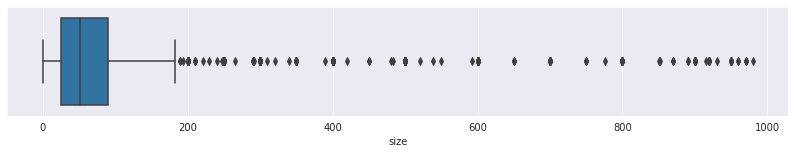

In [70]:
plt.figure(figsize=(14,2))
sns.boxplot(x='size',data=airbnb)

We get rid of outliers and zero values.

In [71]:
airbnb[airbnb['size']==10].shape[0]

51

In [72]:
airbnb= airbnb[airbnb['size']>0]

In [73]:
airbnb[airbnb['size']==0].shape[0]

0

In [74]:
# Computing IQR
Q1 = airbnb['size'].quantile(0.25)
Q3 = airbnb['size'].quantile(0.75)
IQR = Q3 - Q1

In [75]:
print(f"{airbnb.shape[0]/airbnb[airbnb['size']<= Q3+1.5*IQR].shape[0]:.2f} percent of data are outliers.")

1.12 percent of data are outliers.


In [76]:
# eliminate outliers
airbnb= airbnb[airbnb['size']<= Q3+1.5*IQR]

Text(0.5, 0, 'Living Area (m2)')

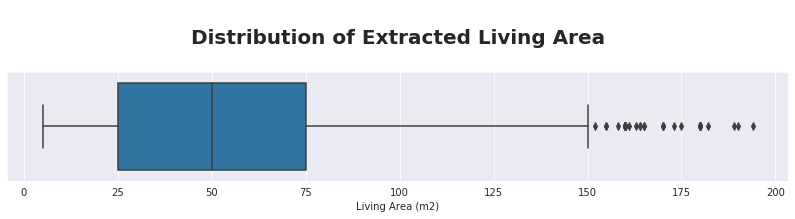

In [77]:
# boxplot of price data after eliminating outliers
plt.figure(figsize=(14,2))
sns.boxplot(x='size',data=airbnb)
plt.title('\nDistribution of Extracted Living Area\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Living Area (m2)')

#### Feature Engineering 2: Amenities

Amenities that hosts offer can be interesting. Let's take a look at them and chose the most meaningful and special ones that distingush between apartments.

First, we write a function to make the long string in *amenities* column into a list. Then we apply it to the dataframe.

In [78]:
# function that makes the string into a list of amenities

def amenities_to_list(text):
    
    pattern= re.compile(r'[^"{}]')
    matches= pattern.findall(text)
    amen_list= ''.join(matches).split(',')
    
    return amen_list

In [79]:
# apply amenities_to_list func to amenities column

airbnb['amenities_list'] = airbnb['amenities'].apply(amenities_to_list)


Most common amenities:

In [80]:
# concat all amenities lists together

am_list=[]

for i in airbnb['amenities_list']:
    am_list=am_list+i

Unique number of amenities:

In [81]:
# len function to find unique number of amenities

print(f'There are {(len(set(am_list)))} unique amenities offered by hosts.')

There are 155 unique amenities offered by hosts.


Looking at 40 most common amenities: 

In [82]:
# import Counter func to count unique values in a list

from collections import Counter

In [83]:
# use Counter func

Counter(am_list).most_common(40)

[('Heating', 3338),
 ('Wifi', 3331),
 ('Essentials', 3239),
 ('Kitchen', 3215),
 ('Hair dryer', 2783),
 ('Washer', 2723),
 ('Hangers', 2638),
 ('Laptop friendly workspace', 2503),
 ('Hot water', 2470),
 ('Iron', 2174),
 ('Shampoo', 2077),
 ('Refrigerator', 1936),
 ('Dishes and silverware', 1884),
 ('TV', 1811),
 ('Stove', 1734),
 ('Cooking basics', 1718),
 ('Bed linens', 1598),
 ('Oven', 1525),
 ('Smoke detector', 1495),
 ('Host greets you', 1434),
 ('Coffee maker', 1414),
 ('Free street parking', 1379),
 ('Internet', 1371),
 ('Family/kid friendly', 1334),
 ('Dishwasher', 1120),
 ('Buzzer/wireless intercom', 1115),
 ('Lock on bedroom door', 962),
 ('Long term stays allowed', 954),
 ('Extra pillows and blankets', 862),
 ('Luggage dropoff allowed', 857),
 ('First aid kit', 833),
 ('No stairs or steps to enter', 817),
 ('Patio or balcony', 804),
 ('Microwave', 796),
 ('Cable TV', 793),
 ('Elevator', 725),
 ('translation missing: en.hosting_amenity_50', 712),
 ('Fire extinguisher', 650),
 

We put this in a new dataframe and visualize it for a better insight:

In [84]:
# creat new dataframe with amenities counts

sub_am= pd.DataFrame(Counter(am_list).most_common(40), columns=['amenity','count'])

# drop a non-sense row

sub_am.drop(index=38, inplace=True)

In [85]:
# check the head of our dataframe

sub_am.head()

amenity  count
0     Heating   3338
1        Wifi   3331
2  Essentials   3239
3     Kitchen   3215
4  Hair dryer   2783

Text(0.5, 1.0, 'Amenities Counts\n')

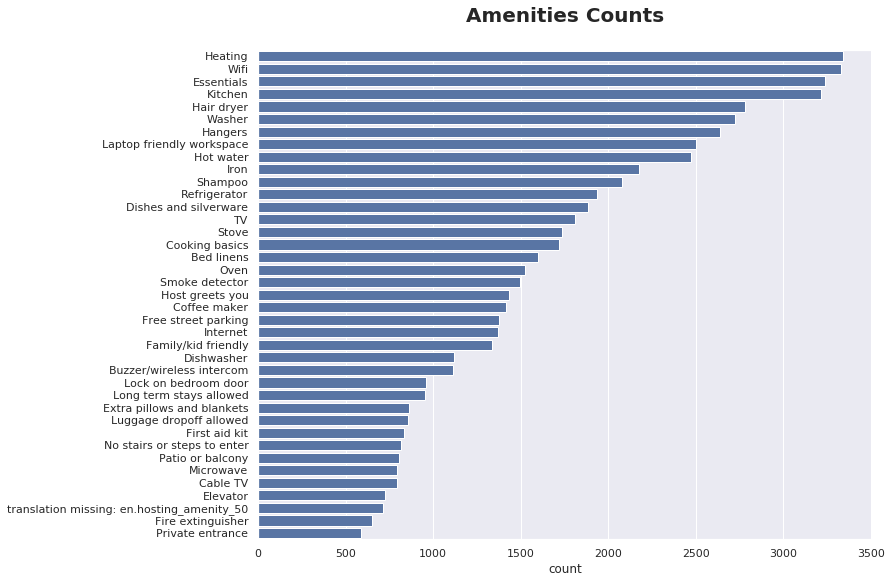

In [86]:
# horizontal barplot of amenities count

sns.set(style="darkgrid")
plt.figure(figsize=(11,9))
sns.barplot(x='count', y='amenity', data=sub_am, color="b")
plt.ylabel(None)
plt.title('Amenities Counts\n', fontsize=20, fontweight='bold')

Well, we can gain useful information out of our barplot. The first ones (most common ones), like *Heating*, *Wifi*, *Essentials*, etc don't add any extra info to the model, because they are offered in almost all of the apartments. Some other amenities are not so common but I believe they are not very important for people staying there. For example, *Dishwasher* or *first aid kit*. In my opinion, the important ones, that can really make a difference are:
* **No stairs or steps to enter**
* **Luggage dropoff allowed**
* **Patio or balcony**
* **Elevator**

We add a column for each of these amenities and use one-hot encoding to show if they are available or not.

In [87]:
# add stair column

airbnb['stairless'] = airbnb['amenities_list'].apply(lambda x: 'No stairs or steps to enter' in x).astype(int)

In [88]:
# add luggage_dropoff column

airbnb['luggage_dropoff'] = airbnb['amenities_list'].apply(lambda x: 'Luggage dropoff allowed' in x).astype(int)

In [89]:
# add balcony column

airbnb['balcony'] = airbnb['amenities_list'].apply(lambda x: 'Patio or balcony' in x).astype(int)

In [90]:
# add elevator column

airbnb['elevator'] = airbnb['amenities_list'].apply(lambda x: 'Elevator' in x).astype(int)

Well, we do not need amenities columns anymore. We can drop them:

In [91]:
airbnb.drop(['amenities','amenities_list'], axis=1, inplace=True)

Let's check the head of our dataframe:

In [92]:
airbnb.head()

id  host_is_superhost  host_identity_verified    neighbourhood  \
0  1944                  0                       1          Wedding   
1  3176                  0                       1  Prenzlauer Berg   
2  3309                  0                       0       Schöneberg   
3  6883                  0                       1   Friedrichshain   
4  7071                  1                       1  Prenzlauer Berg   

  neighbourhood_group_cleansed  latitude  longitude  accommodates  bed_type  \
0                        Mitte  52.54425   13.39749             1         1   
1                       Pankow  52.53500   13.41758             4         1   
2       Tempelhof - Schöneberg  52.49885   13.34906             1         0   
3     Friedrichshain-Kreuzberg  52.51171   13.45477             2         1   
4                       Pankow  52.54316   13.41509             2         1   

   price  cleaning_fee  guests_included  extra_people  review_scores_rating  \
0     21             0                1            10                  82.0   
1     90           100                2            20                  93.0   
2     28            30                1            18                  89.0   
3    125            39                1             0                  99.0   
4     33             0                1            25                  96.0   

   instant_bookable cancellation_policy  moderate  strict  private  size  \
0                 0            moderate         1       0        0    28   
1                 0              strict         0       1        1    68   
2                 0              strict         0       1        0    26   
3                 0            moderate         1       0        1    63   
4                 0            moderate         1       0        0    20   

   stairless  luggage_dropoff  balcony  elevator  
0          0                0        0         0  
1          0                0        0         0  
2          0                1        0         0  
3          0                0        0         1  
4          0                0        0         0

#### Feature Engineering 3: Distance from Berlin Center

The next important columns are *latitude* and *longitude*. But what is the best way to treat longitude/latitude features in a machine learning predictive model? It actually very depends on the context. There are several ways.

One thing we can do here is to calculate distance from each point to the Berlin city center, becuase the apartments tend to have a higher price as they are closer to the center. 

In [93]:
from geopy.distance import great_circle

In [94]:
# function that returns distance between a point and berlin city center using coordinates

def distance_to_mid(lat, lon):
    berlin_centre = (52.50278, 13.40417)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

In [95]:
# new column called 'distance' to store distance values

airbnb['distance'] = airbnb.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

#### Feature Engineering 4: Neighbourhoods

Another way to extract information from location is to put apartments into categories. These categories can be neighbourhoods of berlin. In this case we do not need *lon* and *lat* data, because the information is already given in *neighbourhood_group_cleansed* and *neighbourhood* columns

Berlin is made up of twelve boroughs or districts. In the below picture, you can see the boroughs and neighbourhoods of Berlin. Let's see which ones have the most listings and are more popular.

<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Berlin_Subdivisions.svg' width=700 align="left" />


In [96]:
# count values of boroughs in Berlin

airbnb['neighbourhood_group_cleansed'].value_counts()

Friedrichshain-Kreuzberg    827
Mitte                       730
Pankow                      607
Neukölln                    426
Charlottenburg-Wilm.        247
Tempelhof - Schöneberg      218
Treptow - Köpenick           95
Lichtenberg                  90
Steglitz - Zehlendorf        75
Reinickendorf                50
Marzahn - Hellersdorf        26
Spandau                      20
Name: neighbourhood_group_cleansed, dtype: int64

Text(0.5, 1, '\nNumber of Listings in each Borough in Berlin\n')

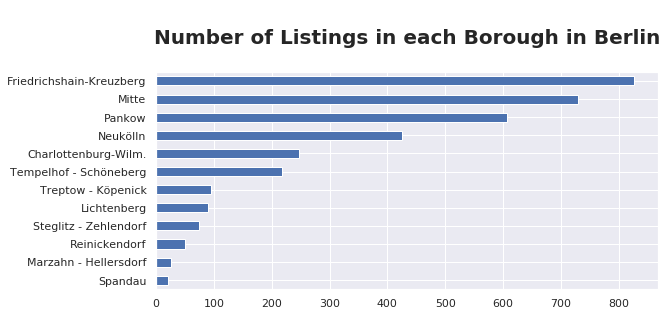

In [97]:
plt.figure(figsize=(9,4))
airbnb['neighbourhood_group_cleansed'].value_counts(ascending=True).plot(kind='barh')
plt.title('\nNumber of Listings in each Borough in Berlin\n',y=1, fontsize=20, fontweight='bold')

In [98]:
# count values of Neighbourhoods in Berlin

airbnb['neighbourhood'].value_counts().head(20)

Prenzlauer Berg    495
Friedrichshain     419
Neukölln           406
Kreuzberg          402
Mitte              355
Wedding            195
Schöneberg         169
Charlottenburg     139
Moabit             134
Wilmersdorf         68
Pankow              51
Rummelsburg         33
Tiergarten          31
Alt-Treptow         30
Weißensee           29
Steglitz            28
Lichtenberg         27
Tempelhof           23
Westend             23
Lichterfelde        18
Name: neighbourhood, dtype: int64

Text(0.5, 0, 'Listings Counts')

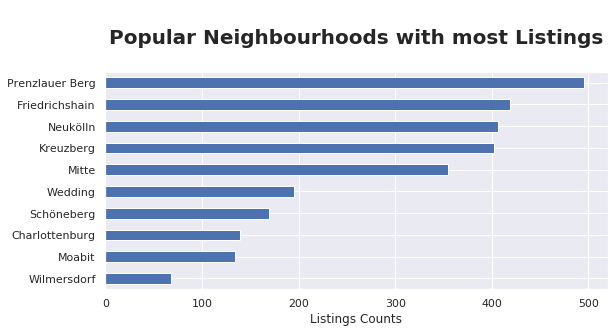

In [99]:
plt.figure(figsize=(9,4))
airbnb['neighbourhood'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('\nPopular Neighbourhoods with most Listings\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Listings Counts')

So we categorize apartments by boroughs. But as there are big differences between central neighbourhoods of berlin, we also divide them into different categories. 

In [100]:
# 10 most popular neighbourhoods in a list called 'neigh'

neigh= airbnb['neighbourhood'].value_counts().head(10).index.values.tolist()

In [101]:
# creat a new column called 'loc'
# if the neighbourhood is in the 'neigh' list, this is equal to neghbourhood, else it is null

airbnb['loc']= airbnb['neighbourhood'].apply(lambda x: x +' (nh)' if x in neigh else np.nan)

In [102]:
# 'loc' column

airbnb['loc'].value_counts()

Prenzlauer Berg (nh)    495
Friedrichshain (nh)     419
Neukölln (nh)           406
Kreuzberg (nh)          402
Mitte (nh)              355
Wedding (nh)            195
Schöneberg (nh)         169
Charlottenburg (nh)     139
Moabit (nh)             134
Wilmersdorf (nh)         68
Name: loc, dtype: int64

In [103]:
# number of null values in 'loc' column

airbnb['loc'].isnull().sum()

629

In [104]:
# fill null values with borough

airbnb['loc'].fillna(airbnb[airbnb['loc'].isnull()]['neighbourhood_group_cleansed'], inplace=True)

In [105]:
# 'loc' column

airbnb['loc'].value_counts()

Prenzlauer Berg (nh)        495
Friedrichshain (nh)         419
Neukölln (nh)               406
Kreuzberg (nh)              402
Mitte (nh)                  355
Wedding (nh)                195
Schöneberg (nh)             169
Charlottenburg (nh)         139
Moabit (nh)                 134
Pankow                      112
Treptow - Köpenick           95
Lichtenberg                  90
Steglitz - Zehlendorf        75
Wilmersdorf (nh)             68
Tempelhof - Schöneberg       50
Reinickendorf                50
Mitte                        46
Charlottenburg-Wilm.         40
Marzahn - Hellersdorf        26
Neukölln                     21
Spandau                      20
Friedrichshain-Kreuzberg      4
Name: loc, dtype: int64

*loc* column looks good. The only problem is *Friedrichshain-Kreuzberg* values. Friedrichshain-Kreuzberg consists of only two neighbourhoods: *Friedrichshain* and *Kreuzberg*. So when we devided it into these two, it had to be eliminated. Let's see what happend:

In [106]:
airbnb[airbnb['loc']=='Friedrichshain-Kreuzberg']

id  host_is_superhost  host_identity_verified    neighbourhood  \
3603    6501830                  0                       1  Potsdamer Platz   
7296   12605374                  0                       1  Potsdamer Platz   
9723   16993974                  0                       1  Potsdamer Platz   
10447  18135638                  0                       1       Tiergarten   

      neighbourhood_group_cleansed  latitude  longitude  accommodates  \
3603      Friedrichshain-Kreuzberg  52.50655   13.37720             2   
7296      Friedrichshain-Kreuzberg  52.50628   13.37711             2   
9723      Friedrichshain-Kreuzberg  52.50610   13.37685             2   
10447     Friedrichshain-Kreuzberg  52.50296   13.37267             2   

       bed_type  price  cleaning_fee  guests_included  extra_people  \
3603          1     45            20                2            25   
7296          1     60            13                1            15   
9723          1     55            15                1            15   
10447         1     77            25                1            15   

       review_scores_rating  instant_bookable cancellation_policy  moderate  \
3603                  100.0                 0            moderate         1   
7296                   94.0                 1              strict         0   
9723                  100.0                 0              strict         0   
10447                  99.0                 0            moderate         1   

       strict  private  size  stairless  luggage_dropoff  balcony  elevator  \
3603        0        0   110          1                1        1         1   
7296        1        0   143          0                0        0         1   
9723        1        0    14          0                1        1         1   
10447       0        1    55          0                0        0         1   

       distance                       loc  
3603   1.872956  Friedrichshain-Kreuzberg  
7296   1.872429  Friedrichshain-Kreuzberg  
9723   1.885630  Friedrichshain-Kreuzberg  
10447  2.132230  Friedrichshain-Kreuzberg

Well, there seems to have been a problem with data entry. *Potsdamer Platz* and *Tiergarten* are in *Mitte*. Let's tale care of it:

In [107]:
# change 'Friedrichshain-Kreuzberg' with 'Mitte'

airbnb['loc']= airbnb['loc'].apply(lambda x: 'Mitte' if x=='Friedrichshain-Kreuzberg' else x)

In [108]:
# Check 'loc'

airbnb['loc'].value_counts()

Prenzlauer Berg (nh)      495
Friedrichshain (nh)       419
Neukölln (nh)             406
Kreuzberg (nh)            402
Mitte (nh)                355
Wedding (nh)              195
Schöneberg (nh)           169
Charlottenburg (nh)       139
Moabit (nh)               134
Pankow                    112
Treptow - Köpenick         95
Lichtenberg                90
Steglitz - Zehlendorf      75
Wilmersdorf (nh)           68
Reinickendorf              50
Tempelhof - Schöneberg     50
Mitte                      50
Charlottenburg-Wilm.       40
Marzahn - Hellersdorf      26
Neukölln                   21
Spandau                    20
Name: loc, dtype: int64

It looks good. We can merge some of these categories together. *Neukölln*, *Spandau*, *Marzahn - Hellersdorf*, *Charlottenburg-Wilm.*, *Reinickendorf*, *Tempelhof - Schöneberg*, *Steglitz - Zehlendorf*, *Treptow - Köpenick* and *Pankow* are very similar. They are all far away from city center, more green, less industrial and without any specific tourist attraction. Besides we extract the popular neghbourhoods of these boroughs.

In [109]:
# Similar boroughs in a list

other= ['Pankow',
        'Treptow - Köpenick',
        'Steglitz - Zehlendorf', 
        'Tempelhof - Schöneberg', 
        'Reinickendorf', 
        'Charlottenburg-Wilm.', 
        'Marzahn - Hellersdorf', 
        'Spandau', 
        'Neukölln']

In [110]:
# change values of similar boroughs to 'other'

airbnb['loc']=  airbnb['loc'].apply(lambda x: 'other' if x in other else x)

In [111]:
# Check 'loc'

airbnb['loc'].value_counts()

Prenzlauer Berg (nh)    495
other                   489
Friedrichshain (nh)     419
Neukölln (nh)           406
Kreuzberg (nh)          402
Mitte (nh)              355
Wedding (nh)            195
Schöneberg (nh)         169
Charlottenburg (nh)     139
Moabit (nh)             134
Lichtenberg              90
Wilmersdorf (nh)         68
Mitte                    50
Name: loc, dtype: int64

Well, It looks perfect. Let's look at our location categories on map:

In [112]:
# create map
ber_coor = (52.51078, 13.38417)
map_berlin= folium.Map(location=ber_coor, zoom_start=12)

# marker colors
markers= ['#e6194b', '#800000', '#3cb44b', '#4363d8', '#f58231', '#46f0f0', '#911eb4',
          '#f032e6', '#bcf60c', '#fabebe', '#008080', '#9a6324', '#a9a9a9']
labels= airbnb['loc'].value_counts().index.values.tolist()

In [113]:
# taking a sample of dataframe to plot
airbnb_subset= airbnb.sample(n=400, random_state=1)


# set markers
for lat, lon, loc in zip(airbnb_subset['latitude'], airbnb_subset['longitude'], airbnb_subset['loc']):
    
    label = folium.Popup(str(loc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers[labels.index(str(loc))],
        fill=True,
        fill_color=markers[labels.index(str(loc))],
        fill_opacity=0.7).add_to(map_berlin)

# plot berlin map
map_berlin

As it can also be seen on below graph, we have done a pretty good job in categorizing the location.

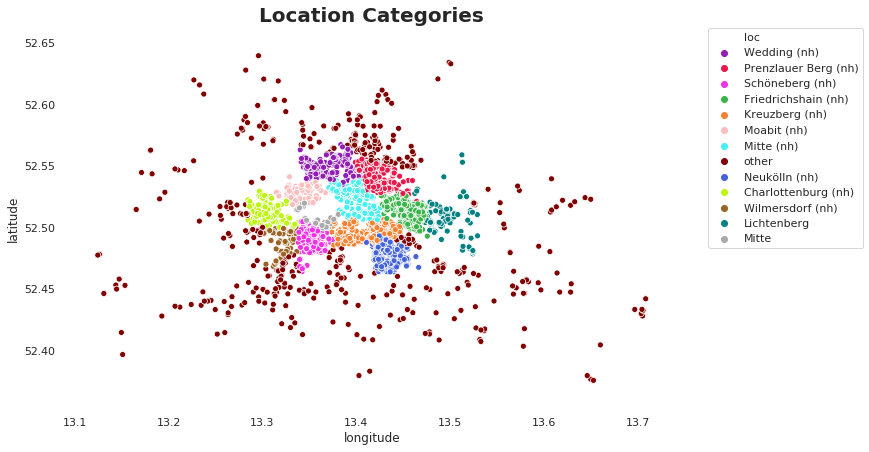

In [114]:
# prepare plot

sns.set_style("white")
fig, ax = plt.subplots(figsize=(11,7))

# draw scatter plot
ax = sns.scatterplot(x="longitude", y="latitude", hue='loc', palette=dict(zip(labels, markers)),  data=airbnb)

ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('Location Categories', fontsize=20, fontweight='bold')

# remove spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

#### Feature Engineering 5: Location Foursquare API

In addition to the last two fatures, I came up with an idea to add more valuable geo information to our dataset. Using Foursquare API, we can download the top 100 venues near each apartment. This can be very helpful as it contains valuable information about the exact location of each individual apartment. For example, many bars, restaurants and shops near an apartment can lead to a higher demand and price rather than an isolated apartment with only blocks of living buldings nearby.

For starters, let's get the top 100 venues that are near a random apartment within a radius of 500 meters.

In [115]:
# Foursquare credential are already saved in a JSON file

with open('foursquare_credentials.json') as f:
    foursquare= json.load(f)

In [116]:
# random pick

airbnb.iloc[314]

id                                     921223
host_is_superhost                           0
host_identity_verified                      1
neighbourhood                        Neukölln
neighbourhood_group_cleansed         Neukölln
latitude                              52.4758
longitude                             13.4415
accommodates                                3
bed_type                                    1
price                                      65
cleaning_fee                               35
guests_included                             2
extra_people                               10
review_scores_rating                       93
instant_bookable                            1
cancellation_policy                    strict
moderate                                    0
strict                                      1
private                                     1
size                                       40
stairless                                   0
luggage_dropoff                   

In [117]:
# set params before sending GET request to Foursquare

CLIENT_ID= foursquare['CLIENT_ID']
CLIENT_SECRET= foursquare['CLIENT_SECRET']

lat= airbnb.loc[796, 'latitude']
lon= airbnb.loc[796, 'longitude']

url= 'https://api.foursquare.com/v2/venues/explore'

params = dict(client_id=CLIENT_ID,
              client_secret=CLIENT_SECRET,
              v='20180605',
              ll=f'{lat},{lon}',
              radius=500,
              limit=100)

In [118]:
# store resualts in a json formatted file

results_rand = requests.get(url=url, params=params).json()

Let's check if there are 100 items found:

In [119]:
len(results_rand['response']['groups'][0]['items'])

36

Print 10 first venues and their category name:

In [120]:
venues_rand= results_rand['response']['groups'][0]['items']

for item in (venues_rand[:10]):
    print(item['venue']['categories'][0]['name'],
          ':',
          (23-len(item['venue']['categories'][0]['name']))*' ', 
          item['venue']['name'])

Indie Theater :            Heimathafen Neukölln
Wine Bar :                 Paulinski Palme
Garden :                   Comenius-Garten
Indie Movie Theater :      Passage Kino
Bar :                      Alter Roter Löwe Rein
Organic Grocery :          Dr. Pogo Veganladen
Gastropub :                Zosse
Cocktail Bar :             Herr Lindemann
Café :                     Café Botanico
Plaza :                    Richardplatz


Let's get relevant part of JSON and transform it into a *pandas* dataframe.

In [121]:
vens_rand= json_normalize(venues_rand)
vens_rand.head(3)

reasons.count                                      reasons.items  \
0              0  [{'summary': 'This spot is popular', 'type': '...   
1              0  [{'summary': 'This spot is popular', 'type': '...   
2              0  [{'summary': 'This spot is popular', 'type': '...   

                       referralId  \
0  e-0-4b0ea86df964a5205f5923e3-0   
1  e-0-5a397f23c6666622a0d7dfb0-1   
2  e-0-4d9712c6a2c654813bdbce53-2   

                                    venue.categories  \
0  [{'id': '4bf58dd8d48988d135941735', 'name': 'I...   
1  [{'id': '4bf58dd8d48988d123941735', 'name': 'W...   
2  [{'id': '4bf58dd8d48988d15a941735', 'name': 'G...   

                   venue.id venue.location.address venue.location.cc  \
0  4b0ea86df964a5205f5923e3     Karl-Marx-Str. 141                DE   
1  5a397f23c6666622a0d7dfb0         Richardstr. 76                DE   
2  4d9712c6a2c654813bdbce53         Richardstr. 35                DE   

  venue.location.city venue.location.country venue.location.crossStreet  \
0              Berlin            Deutschland                        NaN   
1              Berlin            Deutschland                        NaN   
2              Berlin            Deutschland            Karl-Marx-Platz   

   venue.location.distance                    venue.location.formattedAddress  \
0                      175    [Karl-Marx-Str. 141, 12043 Berlin, Deutschland]   
1                      227              [Richardstr. 76, Berlin, Deutschland]   
2                      121  [Richardstr. 35 (Karl-Marx-Platz), 12043 Berli...   

                       venue.location.labeledLatLngs  venue.location.lat  \
0  [{'label': 'display', 'lat': 52.47694577044968...           52.476946   
1  [{'label': 'display', 'lat': 52.47495763935637...           52.474958   
2  [{'label': 'display', 'lat': 52.47504467762332...           52.475045   

   venue.location.lng venue.location.neighborhood venue.location.postalCode  \
0           13.439723                         NaN                     12043   
1           13.444590            Böhmisch-Rixdorf                       NaN   
2           13.442802                         NaN                     12043   

  venue.location.state            venue.name  venue.photos.count  \
0               Berlin  Heimathafen Neukölln                   0   
1               Berlin       Paulinski Palme                   0   
2               Berlin       Comenius-Garten                   0   

  venue.photos.groups venue.venuePage.id  
0                  []                NaN  
1                  []                NaN  
2                  []                NaN

We add category name to the dataframe.

In [122]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        try:
            categories_list = row['venue.categories']
        except:
            return None
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [123]:
# filter the category for each row
vens_rand['categories'] = vens_rand.apply(get_category_type, axis=1)

In [124]:
vens_rand.head(3)

reasons.count                                      reasons.items  \
0              0  [{'summary': 'This spot is popular', 'type': '...   
1              0  [{'summary': 'This spot is popular', 'type': '...   
2              0  [{'summary': 'This spot is popular', 'type': '...   

                       referralId  \
0  e-0-4b0ea86df964a5205f5923e3-0   
1  e-0-5a397f23c6666622a0d7dfb0-1   
2  e-0-4d9712c6a2c654813bdbce53-2   

                                    venue.categories  \
0  [{'id': '4bf58dd8d48988d135941735', 'name': 'I...   
1  [{'id': '4bf58dd8d48988d123941735', 'name': 'W...   
2  [{'id': '4bf58dd8d48988d15a941735', 'name': 'G...   

                   venue.id venue.location.address venue.location.cc  \
0  4b0ea86df964a5205f5923e3     Karl-Marx-Str. 141                DE   
1  5a397f23c6666622a0d7dfb0         Richardstr. 76                DE   
2  4d9712c6a2c654813bdbce53         Richardstr. 35                DE   

  venue.location.city venue.location.country venue.location.crossStreet  \
0              Berlin            Deutschland                        NaN   
1              Berlin            Deutschland                        NaN   
2              Berlin            Deutschland            Karl-Marx-Platz   

   venue.location.distance                    venue.location.formattedAddress  \
0                      175    [Karl-Marx-Str. 141, 12043 Berlin, Deutschland]   
1                      227              [Richardstr. 76, Berlin, Deutschland]   
2                      121  [Richardstr. 35 (Karl-Marx-Platz), 12043 Berli...   

                       venue.location.labeledLatLngs  venue.location.lat  \
0  [{'label': 'display', 'lat': 52.47694577044968...           52.476946   
1  [{'label': 'display', 'lat': 52.47495763935637...           52.474958   
2  [{'label': 'display', 'lat': 52.47504467762332...           52.475045   

   venue.location.lng venue.location.neighborhood venue.location.postalCode  \
0           13.439723                         NaN                     12043   
1           13.444590            Böhmisch-Rixdorf                       NaN   
2           13.442802                         NaN                     12043   

  venue.location.state            venue.name  venue.photos.count  \
0               Berlin  Heimathafen Neukölln                   0   
1               Berlin       Paulinski Palme                   0   
2               Berlin       Comenius-Garten                   0   

  venue.photos.groups venue.venuePage.id     categories  
0                  []                NaN  Indie Theater  
1                  []                NaN       Wine Bar  
2                  []                NaN         Garden

Clean the dataframe and keep only the columns that we need:

In [125]:
# list of selected columns
columns_filtered= ['venue.name','categories','venue.location.address','venue.location.city',
                   'venue.location.country','venue.location.distance',
                   'venue.location.lat','venue.location.lng']

In [126]:
# keep only the selected columns
vens_rand= vens_rand[columns_filtered].copy()

In [127]:
# clean column names by keeping only last term
vens_rand.columns = ([column.split('.')[-1] for column in vens_rand.columns[:-3]] + 
                           vens_rand.columns[-3:].values.tolist())

In [128]:
# check vens_rand dataframe
vens_rand.head()

name           categories             address    city  \
0   Heimathafen Neukölln        Indie Theater  Karl-Marx-Str. 141  Berlin   
1        Paulinski Palme             Wine Bar      Richardstr. 76  Berlin   
2        Comenius-Garten               Garden      Richardstr. 35  Berlin   
3           Passage Kino  Indie Movie Theater  Karl-Marx-Str. 131  Berlin   
4  Alter Roter Löwe Rein                  Bar      Richardstr. 31  Berlin   

       country  venue.location.distance  venue.location.lat  \
0  Deutschland                      175           52.476946   
1  Deutschland                      227           52.474958   
2  Deutschland                      121           52.475045   
3  Deutschland                      251           52.477533   
4  Deutschland                      111           52.475765   

   venue.location.lng  
0           13.439723  
1           13.444590  
2           13.442802  
3           13.439125  
4           13.443178

In [129]:
# top venues near the random apartment
vens_rand['categories'].value_counts().head()

Café                         4
Bar                          3
Plaza                        3
Cocktail Bar                 3
Middle Eastern Restaurant    2
Name: categories, dtype: int64

This random apartment that we picked seems to be located in a fairly good area. There are several coffee shops, restaurants and supermarkets nearby. Now we repeat this process for all of the apartments and store all results in a dataframe.

In [130]:
airbnb.to_csv('airbnb_for_fousquare.csv',index_label='index')

This takes some time to be done. We run the code once and save the csv file for next times.

In [131]:
def get_nearby_venues(df, radius=500, limit=100, log=None):

    """
    This Function uses the lat and lon of apartments in 
    the dataframe to search for nearby venues.
    
    Parameters
    ----------
    df : object, Dataframe with latitude and longitude
        columns
    radius : int, Limit results to venues within this many 
        meters of the specified location, default 500
    limit : int, Limit number of results, default 100
    log: string, possible values: 'all', 'error' or None
        if log is 'all', it will print status of every row of
        dataframe, if log is error, it will print only rows
        that had error and couldn't get any result, if log
        is None, it won't print anything
    
    Returns
    -------
    Dataframe : object, type of pandas.core.frame.DataFrame
        a Dataframe with the nearby venues
    
    """    
    
    ### creat an empty dataframe
    nearby_vens= pd.DataFrame()

    ### Foursquare Credentials
    with open('foursquare_credentials.json') as f:
        foursquare= json.load(f)
    CLIENT_ID= foursquare['CLIENT_ID']
    CLIENT_SECRET= foursquare['CLIENT_SECRET']

    ### FS Rest Api GET URL
    url= 'https://api.foursquare.com/v2/venues/explore'

    ### loop through all of the apartemnts
    for row in range(df.shape[0]):
        ### log
        if log=='all':
            print('========== row:',row,'==========')
        ### get lat and lon of the apartment
        lat= df.iloc[row].latitude
        lon= df.iloc[row].longitude

        ### set parameters for sending the request 
        params = dict(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, 
                      v='20180605',ll=f'{lat},{lon}', radius=radius, limit=limit)

        ### error handling in case of bad request
        try:
            ### send GET request and store data in a json format
            if log=='all':
                print('Sending GET request...')
            res = requests.get(url=url, params=params).json()
            ### keep items
            vens= res['response']['groups'][0]['items']
            ### turn json file into a dataframe
            if log=='all':
                print('JSON into Dataframe...')
            df_vens= json_normalize(vens)
            ### add apartment id to the dataframe
            df_vens['id'] = df.id.iloc[row]
            ### extract category
            if log=='all':
                print('Getting Category Type...')
            df_vens['categories'] = df_vens.apply(get_category_type, axis=1)
            ### keep only 'id' and 'categories' columns
            df_vens= df_vens[['id','categories']]
            if log=='all':
                print('Number of nearby venues: ',df_vens.shape[0],'\n')
            ### concatenate dataframes 
            nearby_vens= pd.concat([nearby_vens,df_vens])
        except:
            if log in ['error','all']:
                print(f'__{row}__ Not Successful!!!!!!!!!!!!!!')
        
    return nearby_vens

In [132]:
# fs= get_nearby_venues(airbnb, log='error')
# fs.to_csv('foursquare_complete.csv',index=False)

Load csv file:

In [133]:
fs= pd.read_csv('foursquare_complete.csv')

In [134]:
# check shape of dataframe
fs.shape

(176258, 2)

In [135]:
# head of daraframe
fs.head()

id   categories
0  1944         Park
1  1944  Karaoke Bar
2  1944    Gastropub
3  1944         Café
4  1944         Café

Let's check number of venues found for apartemnts:

In [136]:
fs.groupby('id').count().head()

categories
id              
1944          19
3176          84
3309          74
6883         100
7071         100

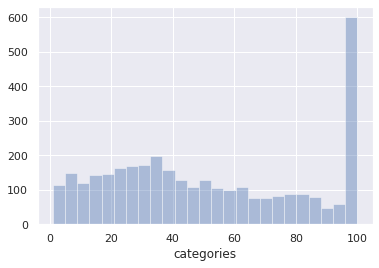

In [137]:
sns.set_style('darkgrid')
sns.distplot(a=fs.groupby('id').count()['categories'],kde=False,bins=25)

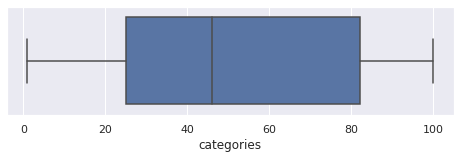

In [138]:
plt.figure(figsize=(8,2))
sns.boxplot(x='categories',data=fs.groupby('id').count())

Everything looks good. Let's sum up some categories. We put all kind of retaurants in one category and repeat the same for bars.

In [139]:
# function to sum categories

def sum_up_cats(cat):
    word=cat.lower()
    if 'restaurant' in word:
        return 'Restaurant'
    elif 'bar' in word:
        return 'Bar'
    else:
        return cat

In [140]:
# apply sum_up_cats func to fs dataframe
fs['cat2']=fs['categories'].apply(sum_up_cats)

In [141]:
# One Hot Encoding the venues
cat_onehot = pd.get_dummies(fs['cat2'])
# concatenate gummies
fs2=pd.concat([fs,cat_onehot],axis=1)

Next, we select most common venue categories and sum their total number for each id.

In [142]:
# select top 80 venues categories
sl= fs2['cat2'].value_counts().head(20).index.values.tolist()

In [143]:
# Foursquare data is ready
fs_final= fs2.groupby('id').sum()[sl]

In [144]:
# Final dataframe
fs_final.head(3)

Restaurant  Bar  Café  Coffee Shop  Bakery  Hotel  Ice Cream Shop  \
id                                                                        
1944           3    1     2            0       2      0               0   
3176          32    8     5            5       3      0               2   
3309          23   13     4            4       2      5               2   

      Supermarket  Pizza Place  Pub  Organic Grocery  Park  Breakfast Spot  \
id                                                                           
1944            1            0    0                0     1               0   
3176            0            0    1                0     2               3   
3309            1            0    0                2     0               1   

      Plaza  Burger Joint  Gym / Fitness Center  Drugstore  Bookstore  Bistro  \
id                                                                              
1944      0             0                     0          0          0       0   
3176      1             1                     2          0          1       2   
3309      1             1                     0          0          1       0   

      Art Gallery  
id                 
1944            0  
3176            0  
3309            1

Before running our prediction model, we can concatenate these to our *airbnb* dataframe.

Out of curiosity, I want to do a clustering on this data and see how much these make sense.

In [145]:
# dataframe for clusteribg
fs_cluster= fs2.groupby('id').sum().reset_index()

In [146]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans

In [147]:
# drop id column
data= fs_cluster.drop(columns=['id'],axis=1)

Text(0, 0.5, 'Within cluster sum of squares')

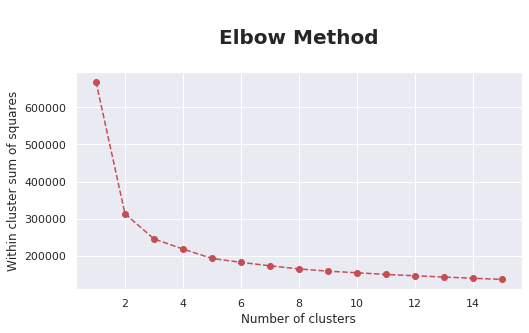

In [149]:
#Elbow methode to find optimum number of clusters
sns.set_style('darkgrid')
wcss=[]
for i in range(1,16):
    kmc= KMeans(n_clusters=i)
    kmc.fit(data)
    wcss.append(kmc.inertia_)
plt.figure(figsize=(8,4))
plt.plot(list(range(1,16)),wcss,'--ro')
plt.title('\nElbow Method\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')

In [150]:
# KMeans
kmc= KMeans(n_clusters=5, random_state=0)
kmc.fit(data)
# Labels
labels= pd.DataFrame({'Cluster Labels':kmc.labels_})
# concatenate labels with dataframe
five_k= pd.concat([labels,fs_cluster['id']],axis=1)

In [151]:
# merge lon and lat 
five_k= five_k.merge(airbnb[['id','latitude','longitude']],on='id')

In [152]:
# mean frequency of top venues in each cluster
a1= fs_cluster
a2= pd.DataFrame({'Cluster Labels':kmc.labels_})
a3= pd.concat([a2,a1],axis=1)
a3= a3.groupby('Cluster Labels').mean()

a3[sl].T.head(10)

Cluster Labels         0          1          2          3          4
Restaurant      3.237417  24.489474  33.010661  20.742775  11.571429
Bar             0.739791  20.884211  10.093817   7.621387   3.557443
Café            1.019943   5.968421   7.692964   5.478324   3.542458
Coffee Shop     0.312441   6.478947   3.513859   2.930636   1.378621
Bakery          0.880342   2.705263   2.221748   2.293353   1.624376
Hotel           0.564103   0.384211   1.492537   2.615607   1.276723
Ice Cream Shop  0.267806   1.142105   2.234542   1.552023   0.994006
Supermarket     1.214625   0.694737   0.362473   1.098266   1.130869
Pizza Place     0.227920   2.921053   1.940299   1.469653   0.725275
Pub             0.152896   1.547368   1.012793   1.027457   0.655345

Text(0.5, 1.0, '\nBerlin Clusters\n')

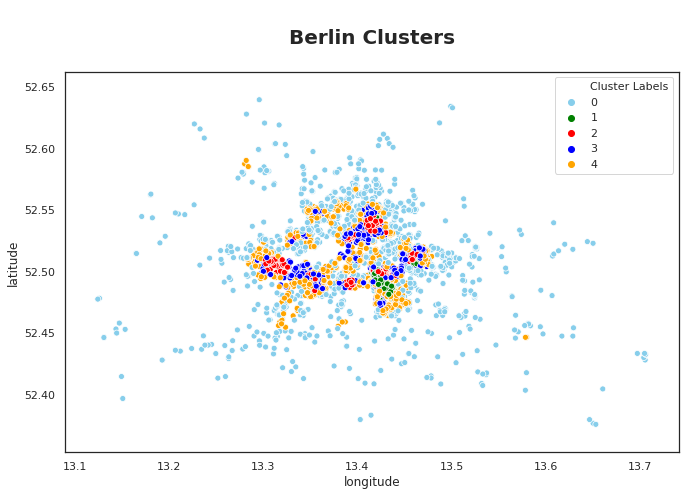

In [153]:
# prepare plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(11,7))
# marker colors
markers= ['skyblue', 'orange', 'blue', 'red', 'green'] 
labels= five_k['Cluster Labels'].value_counts().index.values.tolist()
# draw scatter plot
ax = sns.scatterplot(x="longitude", y="latitude", hue='Cluster Labels' ,data=five_k, 
                     legend='full',palette=dict(zip(labels, markers)))
plt.title('\nBerlin Clusters\n', fontsize=20, fontweight='bold')
# remove spines
# sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)

Well, the clustering looks to make much sense. Apartments with many venues nearby are in a same cluster. In addition, apartments far from city center in residential areas with few venues nearby are in another cluster.

#### Feature Engineering 6: Yearly Income Estimate

In order to calculate yearly income, we need to know how many nights per year the apartment is occupied. Then using price per night and extra guests we can have a pretty good estimate. In this case, instead of using an occupancy model, I guess total number of occupied nights with a business approach . We want to use the apartment as a rental property. That means I calculate the maximum number of nights. An optimum idea is that the house would be empty 1 week each month or better said 12 month per year. Let's calculate total nights:

In [154]:
occupied_days=365-(12*7)

print(f'The apartment can be occupied {occupied_days} days in year.')

The apartment can be occupied 281 days in year.


If the *extra_people* column is **0**, then it is easy to estimate the yearly income. We just multiply number of nights in price per night. But if extra people is not zero, then we use an average of people that the apartment can accomodates.

In [155]:
# creat function to calculate yearly income

def cal_price(x):
    if x.extra_people==0 or x.guests_included>=x.accommodates:
        price= x.price*281
    elif x.extra_people!=0 and x.guests_included<x.accommodates:
        price= (x.price + (x.accommodates-x.guests_included)*x.extra_people )* 281
    else:
        price= 0
    
    return price
        

In [156]:
# selected columns for using cal_price func

price_cols=['accommodates', 'price', 'guests_included', 'extra_people']

In [157]:
# store values in yearly_income column

airbnb['yearly_income']= airbnb[price_cols].apply(cal_price, axis=1)

Let's get a quick look.

In [158]:
airbnb.describe()['yearly_income']

count      3411.000000
mean      21783.884491
std       12315.116969
min        2248.000000
25%       12645.000000
50%       18546.000000
75%       27819.000000
max      123921.000000
Name: yearly_income, dtype: float64

The average of yearly income of Airbnb in berlin is approximately 22000 eur and data are right skewed toward higher incomes, which is reasonable.

Let's look at yearly income distribution.

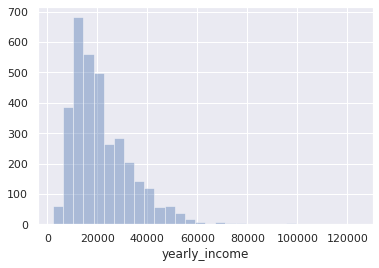

In [159]:
sns.set_style('darkgrid')
sns.distplot(a=airbnb['yearly_income'], bins=30, kde=False)

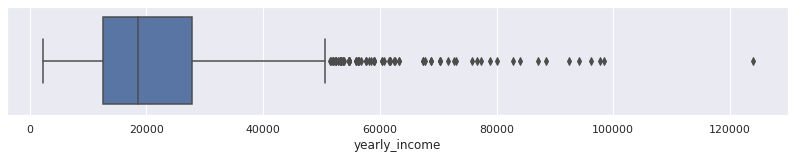

In [160]:
# boxplot of price data after eliminating outliers
plt.figure(figsize=(14,2))
sns.boxplot(x='yearly_income',data=airbnb)

Text(0.5, 1.0, 'Without Outliers')

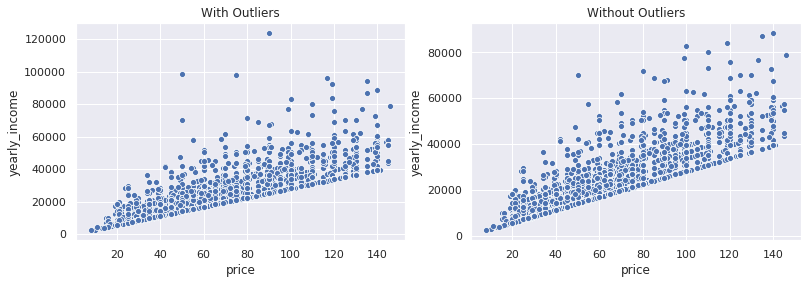

In [161]:
# scatter plot before and after eliminating outliers
fig= plt.figure(figsize=(13, 4))
ax1= plt.subplot(121)
sns.scatterplot(x='price',y='yearly_income',data=airbnb)
plt.title("With Outliers")
ax2= plt.subplot(122)
sns.scatterplot(x='price',y='yearly_income',data=airbnb[airbnb['yearly_income']<90000])
plt.title("Without Outliers")

Let's get rid of outliers.

In [162]:
num= airbnb[airbnb['yearly_income']>=90000].shape[0]
print(f'{num} outliers have been eliminated!')
airbnb= airbnb[airbnb['yearly_income']<90000]

6 outliers have been eliminated!


## 1.4. Exploratory Data Analysis (EDA)

Let's continue by exploring data to extract useful information and have a better insight over the whole airbnb business in Berlin. We look at whole dataset alongside our cleaned version, in order to make sure they do not differ much.

### Yearly Income

The graph below show the distribution of apartments by yearly income. The Distribution is right skewed with a median of approximately 19000.

In [163]:
# set color palette
sns.set_palette('Set1',desat=.7)
# set figures dpi
dpi=None

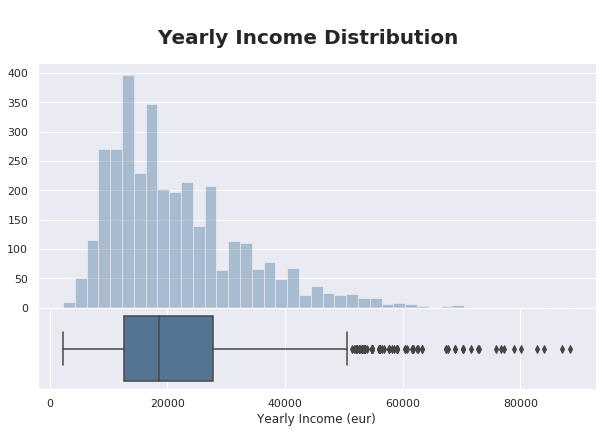

In [164]:
# set seaborn style
sns.set_style('darkgrid')
# import gridspec func for subplots with different sizes
from matplotlib import gridspec
# creat figure
fig = plt.figure(figsize=(10, 6), dpi=dpi) 
fig.suptitle('\nYearly Income Distribution\n',y=1.01, fontsize=20, fontweight='bold')
# creat 2 subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
# creat ax0 and ax1 for two plots
ax0 = plt.subplot(gs[0])
ax0.set_xticks([])
ax1 = plt.subplot(gs[1])
# histogram of size distribution
sns.distplot(a=airbnb['yearly_income'], ax=ax0, kde=False,color='#49759c')
ax0.set_xlabel(None)
# boxplot of size distribution
sns.boxplot(x='yearly_income', data=airbnb, ax=ax1,color='#49759c')
ax1.set_xlabel('Yearly Income (eur)')
plt.show()

### Room Types

Room types are basically divided into two major categories: *Entire Home/Apt* and *Private Room*. The number of these two groups are approximately equal.

In [165]:
# original dataset with all datapoints
berlin= df[selected_cols].copy()

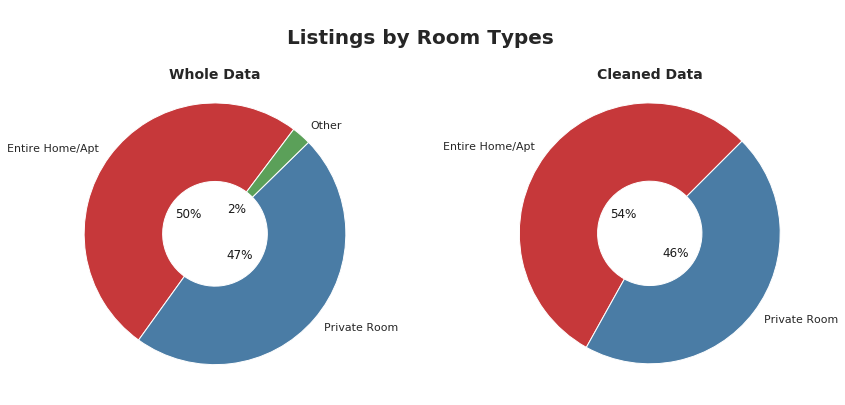

In [166]:
# creat a figure
fig= plt.figure(figsize=(13, 6), dpi=dpi)
# add suptitle above all subplots and position it
fig.suptitle("\nListings by Room Types", fontsize=20, fontweight='bold', y=1.03)

# left ax
ax1= plt.subplot(121)
# creat list of labels
labels = ['Entire Home/Apt','Private Room','Other']
# size of each piece in pie chart
size = berlin['room_type'].value_counts().values.tolist()
sizes = size[:2]+ [size[2]+size[3]]
# plot left pie chart
wedges, texts, autotexts = ax1.pie(sizes,wedgeprops=dict(width=0.6), labels=labels, labeldistance=1.1,
                                   pctdistance=0.25, autopct='%.0f%%', shadow=False, startangle=53)
# pie charts work best if they have equal aspect ratio
ax1.axis('equal')
# auto generated percent labels format
plt.setp(autotexts,size=12, color='k')
# left chart title
ax1.set_title("Whole Data".title(), fontsize=14, fontweight='bold')
# title position
ax1.title.set_position([.5, 0.96])


# right ax
ax2= plt.subplot(122)
# creat list of labels
labels = ['Entire Home/Apt','Private Room']
# size of each piece in pie chart
sizes = airbnb['private'].value_counts().values.tolist()
# plot left pie chart
wedges, texts, autotexts = ax2.pie(sizes,wedgeprops=dict(width=0.6), labels=labels, labeldistance=1.1,
                                   pctdistance=0.25, autopct='%.0f%%', shadow=False, startangle=45)
# pie charts work best if they have equal aspect ratio
ax2.axis('equal')
# auto generated percent labels format
plt.setp(autotexts,size=12, color='k')
# right chart title
ax2.set_title("Cleaned Data".title(), fontsize=14, fontweight='bold')
# title position
ax2.title.set_position([.5, 0.96])

# adjust space between subplots
fig.subplots_adjust(hspace=0, wspace=0.5)

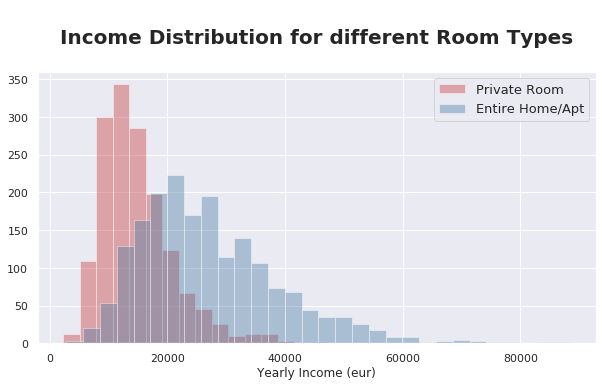

In [167]:
# set seaborn style
sns.set_style('darkgrid')
# creat figrue
fig= plt.figure(figsize=(10, 5), dpi=dpi)
# title
plt.title('\nIncome Distribution for different Room Types\n', fontsize=20, fontweight='bold')
# histogram for income
sns.distplot(a=airbnb[airbnb['private']==0]['yearly_income'], bins=20, kde=False)
sns.distplot(a=airbnb[airbnb['private']==1]['yearly_income'], bins=30, kde=False)
# set xlabel
plt.xlabel('Yearly Income (eur)')
# creat legend
plt.legend(['Private Room','Entire Home/Apt'], prop={'size': 13}, loc=0)

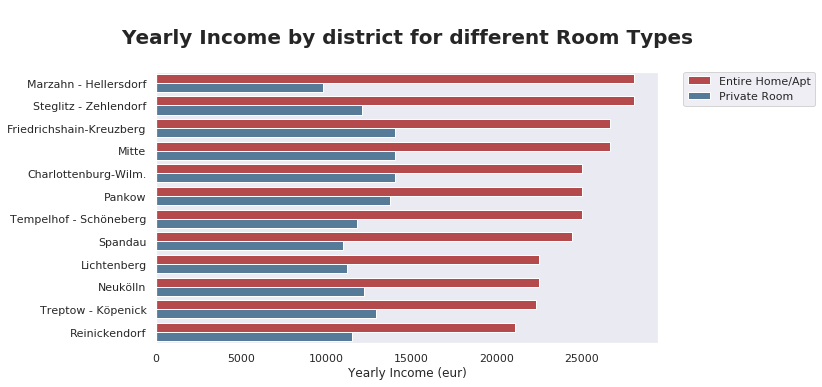

In [168]:
# creat dataframe with meadian price of each district for Private Rooms
a=airbnb[airbnb['private']==0].groupby(['neighbourhood_group_cleansed'])['yearly_income'].agg(np.median).to_frame().reset_index()
# add a column to distinguish between private and entire 
a['Dataset']='Private Room'
# creat dataframe with meadian price of each district for Entire Home
b=airbnb[airbnb['private']==1].groupby(['neighbourhood_group_cleansed'])['yearly_income'].agg(np.median).to_frame().reset_index()
# add a column to distinguish between private and entire
b['Dataset']='Entire Home/Apt'
# sort values by prices
b.sort_values(by='yearly_income',ascending=False,inplace=True)
# merge dataframes
c= pd.merge(b,a,how='outer')

# creat a figure
plt.figure(figsize=(9,5),dpi=dpi)
# set seaborn style to dark
sns.set_style('dark')
# horizontal barplot
sns.barplot(y='neighbourhood_group_cleansed',x='yearly_income',data=c, hue='Dataset')
# titles, labels and legend
plt.title('\nYearly Income by district for different Room Types\n', fontsize=20, fontweight='bold')
plt.xlabel('Yearly Income (eur)', fontsize=12)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

It is obvious that median yearly incomes for Entire Home/Apt are greater than that of Private Room.

### Rental Price by District

The median rental price of each district is shown below. As can be expected, the central districts tend to have a higher median rental price.

In [169]:
# change price column format to float
berlin['price']= berlin['price'].apply(get_price).astype(float)

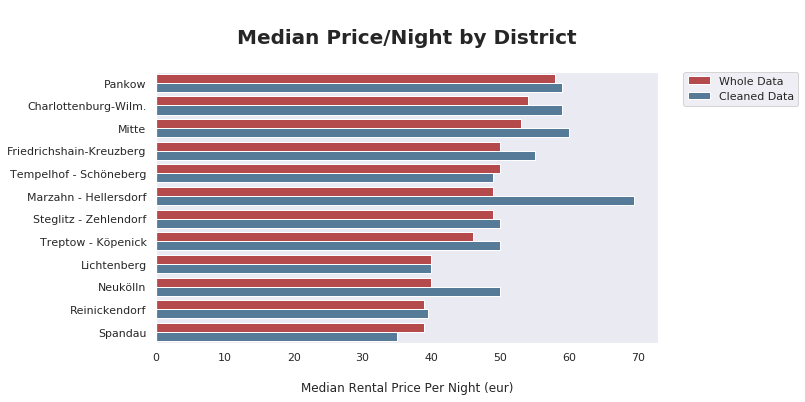

In [170]:
# creat dataframe with meadian price of each district for whole dataset
a=berlin.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median).to_frame().reset_index()
# add a column to distinguish between whole and cleaned data
a['Dataset']='Whole Data'
# sort values by prices
a.sort_values(by='price',ascending=False,inplace=True)
# creat dataframe with meadian price of each district for cleaned dataset
b=airbnb.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median).to_frame().reset_index()
# add a column to distinguish between whole and cleaned data
b['Dataset']='Cleaned Data'
# merge dataframes
c= pd.merge(a,b,how='outer')

# creat a figure
plt.figure(figsize=(9,5),dpi=dpi)
# set seaborn style to dark
sns.set_style('dark')
# horizontal barplot
sns.barplot(y='neighbourhood_group_cleansed',x='price',data=c, hue='Dataset')
# titles, labels and legend
plt.title('\nMedian Price/Night by District\n', fontsize=20, fontweight='bold')
plt.xlabel('\nMedian Rental Price Per Night (eur)', fontsize=12)
plt.ylabel(None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Number of Listings

Once again central districts have more listings, which is reasonable. Althogh we eliminate many sample, the relation between number of listings in different districs stays the same which is a positive point.

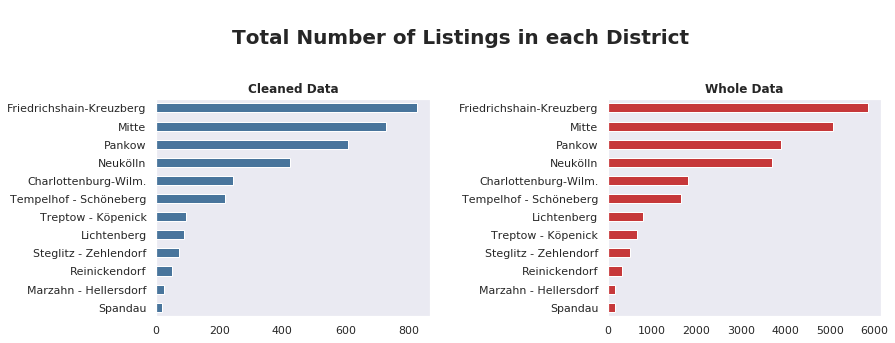

In [171]:
# creat figure
fig= plt.figure(figsize=(13, 4), dpi=dpi)
# add suptitle above all subplots and position it
fig.suptitle("\nTotal Number of Listings in each District", fontsize=20, fontweight='bold',x=0.45, y=1.2)

# left ax clean data
ax1= plt.subplot(121)
# barplot
airbnb['neighbourhood_group_cleansed'].value_counts(ascending=True).plot(kind='barh',color='#49759c')
plt.title("Cleaned Data", fontsize=12, fontweight='bold')

# right ax whole data
ax2= plt.subplot(122)
# barplot
berlin['neighbourhood_group_cleansed'].value_counts(ascending=True).plot(kind='barh')
plt.title("Whole Data", fontsize=12, fontweight='bold')

# adjust space between subplots
fig.subplots_adjust(hspace=0, wspace=0.65)

### Reviews Rating Scores

Graph belowe shows the distribution of reviews rating scores. Our sample has fairly the same distrubution in comparision to whole dataset.  

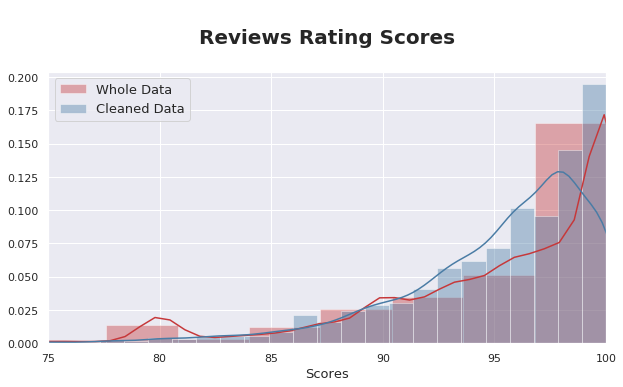

In [172]:
# set seaborn style
sns.set_style('darkgrid')
# creat figrue
fig= plt.figure(figsize=(10, 5), dpi=dpi)
# title
plt.title('\nReviews Rating Scores\n', fontsize=20, fontweight='bold')
# histogram whole data
g1=sns.distplot(a=berlin['review_scores_rating'].dropna(),kde=True,bins=25)
# histogram cleaned data
sns.distplot(a=airbnb['review_scores_rating'],kde=True,bins=25)
# set xlimit
g1.set(xlim=(75,100))
# set xlabel
plt.xlabel('Scores', fontsize=13)
# creat legend
plt.legend(['Whole Data', 'Cleaned Data'], prop={'size': 13}, loc=2)
# show plot
plt.show()

According to regression plots below, rating has almost no relation with price per night and a very weak negative relation with yearly income. This is somehow odd. Because higher score should imply that the apartment is better and mayber more expensive. But appearently it doesn't work that way. One explaination could be that, peaple give better rating score to apartemnts that are cheaper. They look at it as a single factor instead of thinking about value for money. 

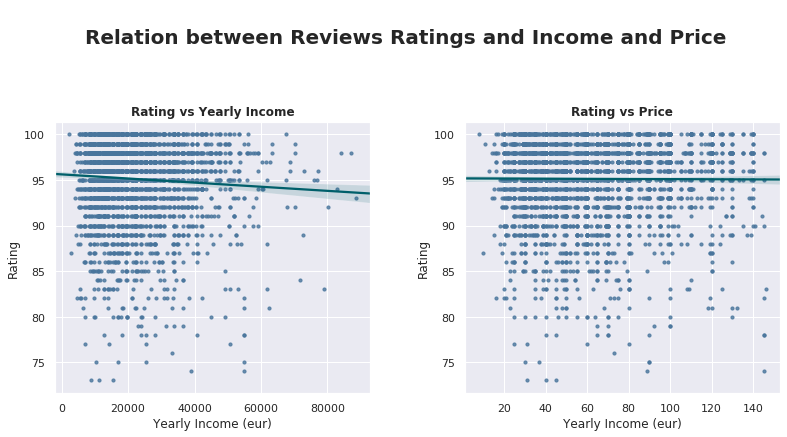

In [173]:
# creat figure
fig= plt.figure(figsize=(13, 5), dpi=dpi)
# add suptitle above all subplots and position it
fig.suptitle("\nRelation between Reviews Ratings and Income and Price", fontsize=20, fontweight='bold',y=1.2)

# left ax
ax1= plt.subplot(121)
# regplot
sns.regplot(x='yearly_income',y='review_scores_rating',data=airbnb,
            line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
plt.title("Rating vs Yearly Income", fontsize=12, fontweight='bold')
ax1.set_xlabel('Yearly Income (eur)')
ax1.set_ylabel('Rating')

# right ax
ax2= plt.subplot(122)
# regplot
sns.regplot(x='price',y='review_scores_rating',data=airbnb,
           line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
plt.title("Rating vs Price", fontsize=12, fontweight='bold')
ax2.set_xlabel('Yearly Income (eur)')
ax2.set_ylabel('Rating')

# adjust space between subplots
fig.subplots_adjust(hspace=0, wspace=0.3)

In [174]:
from scipy import stats

In [175]:
pearson_coef_0, p_value_0 = stats.pearsonr(airbnb['yearly_income'], airbnb['review_scores_rating'])
pearson_coef_1, p_value_1 = stats.pearsonr(airbnb['price'], airbnb['review_scores_rating'])

print('\n')
print(f'Rating vs Income :    Correlation Coefficient= {pearson_coef_0:0.2f}, p-value= {p_value_0}')
print(f'Rating vs Price  :    Correlation Coefficient= {pearson_coef_1:0.2f}, p-value= {p_value_1}')



Rating vs Income :    Correlation Coefficient= -0.06, p-value= 0.00037283692295609895
Rating vs Price  :    Correlation Coefficient= -0.01, p-value= 0.7556385045214709


It may make more sense to drop this column before building our model, as there isn't any strong explaination for this.

### Living Area

The graph below show the distribution of apartments by living area. The Distribution is right skewed with a median of 50m.

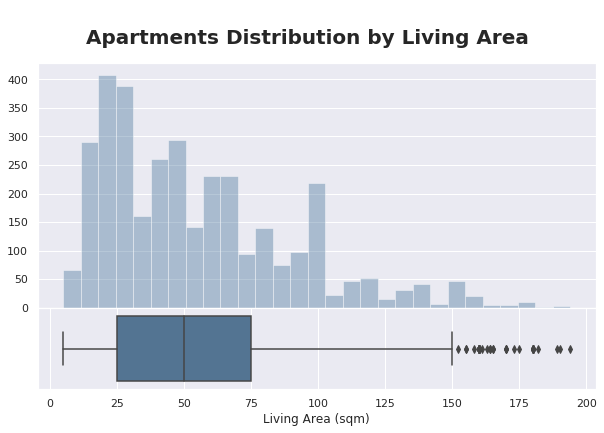

In [176]:
# set seaborn style
sns.set_style('darkgrid')
# import gridspec func for subplots with different sizes
from matplotlib import gridspec
# creat figure
fig = plt.figure(figsize=(10, 6), dpi=dpi) 
fig.suptitle('\nApartments Distribution by Living Area',y=1.01, fontsize=20, fontweight='bold')
# creat 2 subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
# creat ax0 and ax1 for two plots
ax0 = plt.subplot(gs[0])
ax0.set_xticks([])
ax1 = plt.subplot(gs[1])
# histogram of size distribution
sns.distplot(a=airbnb['size'], ax=ax0, kde=False,color='#49759c')
ax0.set_xlabel(None)
# boxplot of size distribution
sns.boxplot(x='size', data=airbnb, ax=ax1,color='#49759c')
ax1.set_xlabel('Living Area (sqm)')
plt.show()

As can be seen on the regression plots below, when it comes to entire apartments, the relation gets stronger between yearly income and living area. Let's dig this deeper and see how they differ.

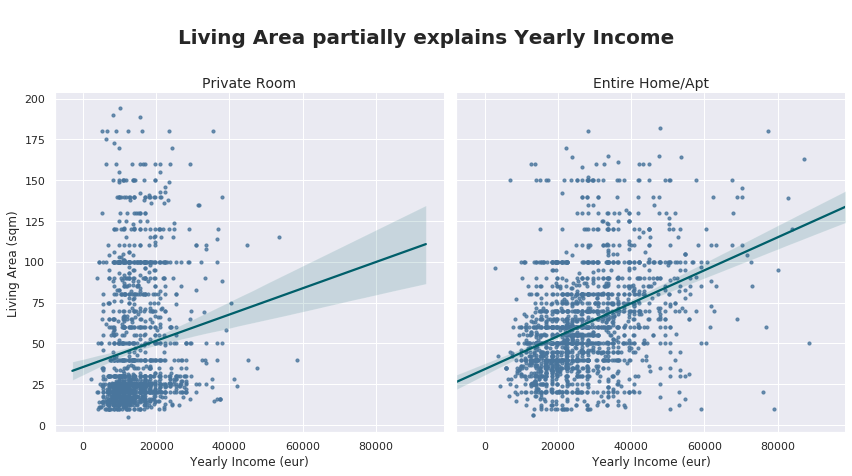

In [177]:
# set seaborn style
sns.set_style('darkgrid')

lm= sns.lmplot(x='yearly_income',y='size',data=airbnb, col='private',aspect=1,height=6 ,
               line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
# marker='s', markersize=8, markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green"

axes = lm.axes
axes[0,0].set_title('Private Room', fontsize=14)
axes[0,0].set_xlabel('Yearly Income (eur)')
axes[0,0].set_ylabel('Living Area (sqm)')
axes[0,1].set_title('Entire Home/Apt', fontsize=14)
axes[0,1].set_xlabel('Yearly Income (eur)')


plt.subplots_adjust(top=0.9)
lm.fig.suptitle('\nLiving Area partially explains Yearly Income',y=1.1, fontsize=20, fontweight='bold')
# lm.fig.dpi= dpi
plt.show()

In [178]:
a=airbnb[airbnb['private']==0]
b=airbnb[airbnb['private']==1]

pearson_coef_0, p_value_0 = stats.pearsonr(a['yearly_income'], a['size'])
pearson_coef_1, p_value_1 = stats.pearsonr(b['yearly_income'], b['size'])

print('\n')
print(f'Private Room    :    Correlation Coefficient= {pearson_coef_0:0.2f}, p-value= {p_value_0}')
print(f'Entire Home/Apt :    Correlation Coefficient= {pearson_coef_1:0.2f}, p-value= {p_value_1}')



Private Room    :    Correlation Coefficient= 0.13, p-value= 1.283903618363759e-07
Entire Home/Apt :    Correlation Coefficient= 0.39, p-value= 7.849302153229071e-70


We calculated the *Correlation Coefficient* and *p-value* for living area and yearly income for different room types. The results show that the relation is much stronger and p-value is much lower in case of entire home/apt. As we want to put our property as entire home/apt on airbnb, it may make more sense to make a model only considering entire home/apt.

### Distance from Berlin City Center

Regression plots below show the relation between yearly income and distance from berlin city center for different room types. There is not actually a great difference recognizable between them. 

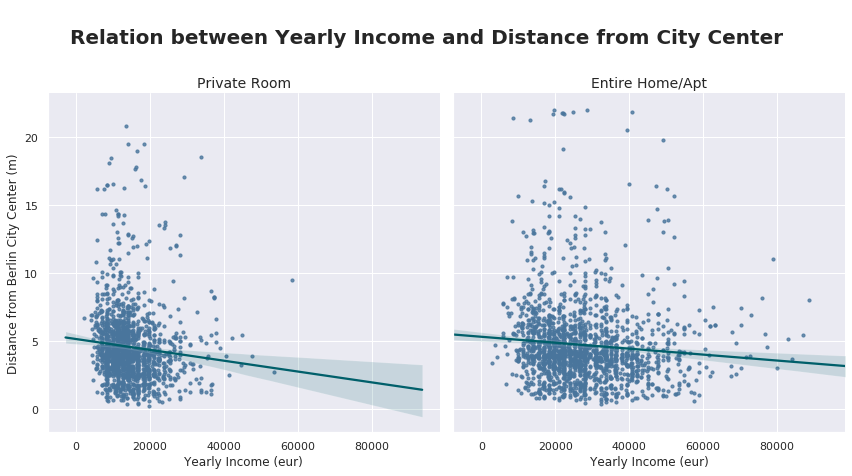

In [179]:
# set seaborn style
sns.set_style('darkgrid')

lm= sns.lmplot(x='yearly_income',y='distance',data=airbnb, col='private',aspect=1,height=6,
                line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
axes = lm.axes
axes[0,0].set_title('Private Room', fontsize=14)
axes[0,0].set_xlabel('Yearly Income (eur)')
axes[0,0].set_ylabel('Distance from Berlin City Center (m)')
axes[0,1].set_title('Entire Home/Apt', fontsize=14)
axes[0,1].set_xlabel('Yearly Income (eur)')


plt.subplots_adjust(top=0.9)
lm.fig.suptitle('\nRelation between Yearly Income and Distance from City Center',
                y=1.1, fontsize=20, fontweight='bold')
# lm.fig.dpi= dpi
plt.show()

In [180]:
a=airbnb[airbnb['private']==0]
b=airbnb[airbnb['private']==1]

pearson_coef_0, p_value_0 = stats.pearsonr(a['yearly_income'], a['distance'])
pearson_coef_1, p_value_1 = stats.pearsonr(b['yearly_income'], b['distance'])

print('\n')
print(f'Private Room    :    Correlation Coefficient= {pearson_coef_0:0.3f}, p-value= {p_value_0}')
print(f'Entire Home/Apt :    Correlation Coefficient= {pearson_coef_1:0.3f}, p-value= {p_value_1}')



Private Room    :    Correlation Coefficient= -0.095, p-value= 0.00018884780463367375
Entire Home/Apt :    Correlation Coefficient= -0.090, p-value= 9.834503699928156e-05


We calculated the Correlation Coefficient and p-value for living area and yearly income for different room types. They are fairly equal.

### Cancellation Policy

Let's explore yearly income by cancellation policy.

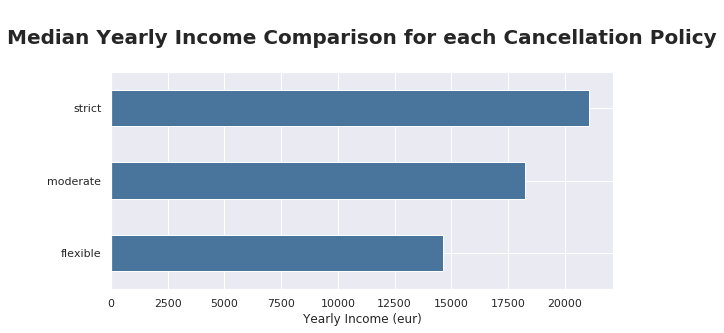

In [181]:
airbnb.groupby(['cancellation_policy'])['yearly_income'].agg(np.median).plot(kind='barh', figsize=(9,4), color='#49759c')
plt.title('\nMedian Yearly Income Comparison for each Cancellation Policy\n', fontsize=20, fontweight='bold')
plt.xlabel('Yearly Income (eur)')
plt.ylabel('')
plt.show()

Having a strict cancellation policy can guarantee you won't lose money by last minute cancellation which couldn't be filled again.

### Host

Being a verfied superhost and offering instant booking can lead to a higher demand of the apartment. Let's look at median prices.

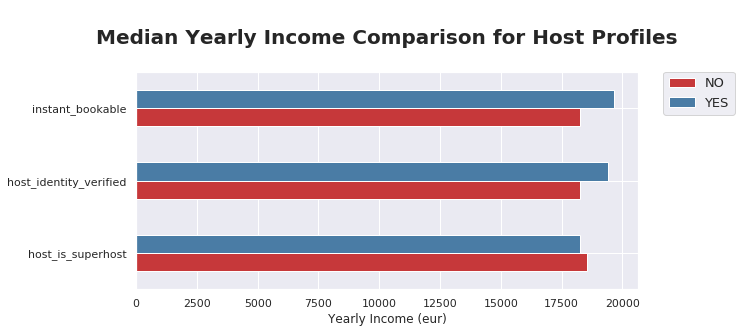

In [182]:
mylist=[]
labels=['host_is_superhost','host_identity_verified','instant_bookable']

for i in labels:
    mylist.append(airbnb.groupby([i])['yearly_income'].agg(np.median).to_frame().reset_index(drop=True).rename(columns=dict(yearly_income=i)))

a= pd.concat(mylist, axis=1)


a.T.plot(kind='barh', figsize=(9,4))
plt.title('\nMedian Yearly Income Comparison for Host Profiles\n', fontsize=20, fontweight='bold')
plt.xlabel('Yearly Income (eur)')
plt.legend(['NO','YES'], prop={'size': 13}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

There is a small difference in yearly income for instant booking and verified hosts but not for supehosts. Let's see the histogramm of the distribution.

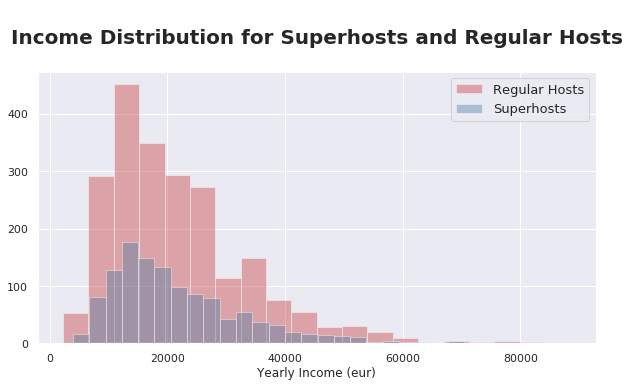

In [183]:
# set seaborn style
sns.set_style('darkgrid')
# creat figrue
fig= plt.figure(figsize=(10, 5), dpi=dpi)
# title
plt.title('\nIncome Distribution for Superhosts and Regular Hosts\n', fontsize=20, fontweight='bold')
# histogram for income
sns.distplot(a=airbnb[airbnb['host_is_superhost']==0]['yearly_income'], bins=20, kde=False)
sns.distplot(a=airbnb[airbnb['host_is_superhost']==1]['yearly_income'], bins=30, kde=False)
# set xlabel
plt.xlabel('Yearly Income (eur)')
# creat legend
plt.legend(['Regular Hosts','Superhosts'], prop={'size': 13}, loc=0)

In [184]:
num= airbnb['host_is_superhost'].value_counts()
print(f'Number of Regular Hosts : {num[0]}')
print(f'Number of Superhosts    : {num[1]}')

Number of Regular Hosts : 2204
Number of Superhosts    : 1201


Total number of Superhost are much lower than regular hosts. So maybe we cannot conclude anything from this feature.

### Amenities

The chosen amenities look to make a big difference, which will be good for our model.

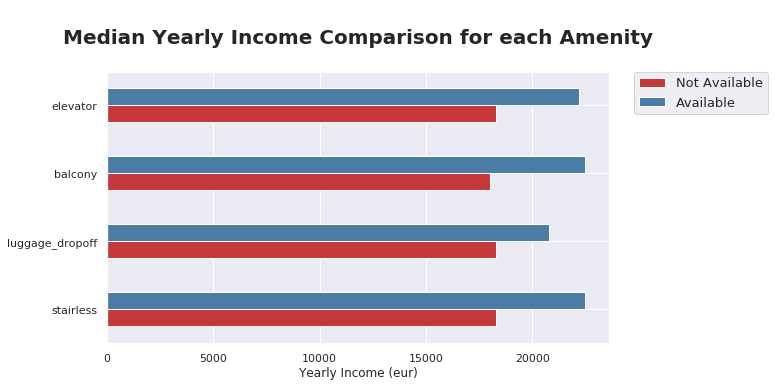

In [185]:
mylist=[]
labels=['stairless','luggage_dropoff','balcony','elevator']

for i in labels:
    mylist.append(airbnb.groupby([i])['yearly_income'].agg(np.median).to_frame().reset_index(drop=True).rename(columns=dict(yearly_income=i)))

a= pd.concat(mylist, axis=1)


a.T.plot(kind='barh', figsize=(9,5))
plt.title('\nMedian Yearly Income Comparison for each Amenity\n', fontsize=20, fontweight='bold')
plt.xlabel('Yearly Income (eur)')
plt.legend(['Not Available','Available'], prop={'size': 13}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## 1.5. Building the Prediction model

We start by building a simple linear regression model without Foursquare data.

In [186]:
# import all regression models we need
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# import functions for test models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict

# import functions for model evaluating
from sklearn import metrics

# import preprocessing functions
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures

# Import pipeline to make life easier
from sklearn.pipeline import Pipeline

In [187]:
# Set color palette
mycolors = ["#4A7CA4","#C53839", "#5B9F59", "#8E5A96", "#D87F26", "#E0E051", "#935B3A", "#E592BE", "#999999"]
sns.set_palette(mycolors)

In [188]:
# dictionary to store results
results= dict()

### Linear Regression Model

In [189]:
# select features that are used in model
features= airbnb[['size','distance','host_identity_verified','bed_type','instant_bookable','moderate', 
                  'strict', 'private',  'stairless', 'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Linear Regression']=[score,rmse]

r2 Score : 0.35260564875744094
RMSE     : 9396.517491525807


In [352]:
def plot_results(y_real, y_hat):
    """
    This function plots predicted values, real values and
    Residuals versus each other in four different plots
    """
    fig= plt.figure(figsize=(12, 8))
    plt.suptitle('Predicted Values and Residuals', y=1.07, fontsize=20, fontweight='bold')
    ax1= plt.subplot(221)
    sns.scatterplot(y_real,y_hat).set_title("Predicted vs Real Values")
    ax1.set_ylabel('Predicted')
    ax1.set_xlabel('Real Values')
    ax2= plt.subplot(222)
    sns.distplot(y_real-y_hat).set_title('Residuals Distribution')
    ax2.set_xlabel('Difference')
    ax2.set_ylabel('Frequency')
    ax3= plt.subplot(223)
    sns.scatterplot(y_real,y_hat-y_real).set_title('Residuals vs Real Values')
    ax3.set_ylabel('Difference')
    ax3.set_xlabel('Real Values')
    ax4= plt.subplot(224)
    sns.scatterplot(y_hat,y_hat-y_real).set_title('Residuals vs Predicted Values')
    ax4.set_ylabel('Difference')
    ax4.set_xlabel('Predicted Values')
    fig.tight_layout()

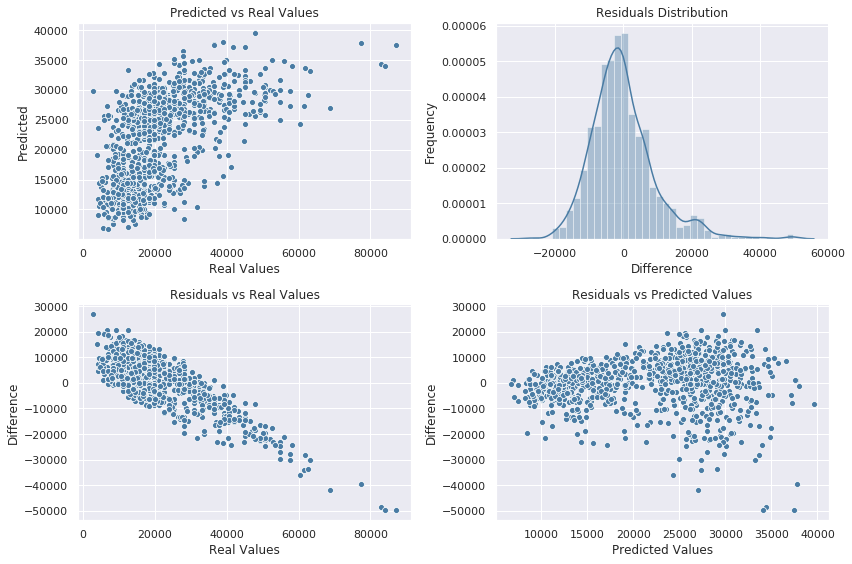

In [191]:
plot_results(y_test, y_hat)

In [192]:
# cross validation with 5 folds
y_hat= cross_val_predict(lm, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Linear Regression CV']=[score,rmse]

r2 Score : 0.3753253641785451
RMSE     : 9376.980219092271


It looks good. Let's do standard scaling to features and see if the results get better.

### Linear Regression Model with Standard Scaler

In [193]:
# scale features
ss= StandardScaler()
ss.fit(features)
scaled= ss.transform(features)

# Set X and Y to split the data
X= scaled
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('Score: ',score)
print('RMSE : ',rmse)

# store data to results dicttionary
results['Linear Regression Standard Scaler']=[score,rmse]

Score:  0.35260564875744116
RMSE :  9396.517491525805


Standard scaling has no impact in this case.

### Linear Regression Model for Entire Home/Apt

Make a regression model just for *Entire Home/apt* Room types and see if the model is stronger.

In [194]:
# select features that are used in model
features= airbnb[airbnb['private']==1]
features= features[['size','distance','host_identity_verified','bed_type','instant_bookable','moderate', 
                  'strict', 'private',  'stairless', 'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb[airbnb['private']==1]['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Linear Regression Entire Place']=[score,rmse]

r2 Score : 0.20139620676230618
RMSE     : 11065.947288012872


It didn't work very good. Our first model is still better.

### Ridge Regression

Make a Ridge Regression and try to reduce impact of features that do not make a great contribution to the model.

In [195]:
# select features that are used in model
features= airbnb[['size','distance','host_identity_verified','bed_type','instant_bookable','moderate', 
                  'strict', 'private',  'stairless', 'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
y_hat= rr.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Ridge Regression']=[score,rmse]

r2 Score : 0.3526124829186894
RMSE     : 9396.467894641724


The results are the same as Linear Regression model. We use a grid search to see if we can make it any better. Otherwise we stick to the regression model for now.

In [196]:
# setting parameters grid dict
param_grid={'alpha':[0.0001,0.001,0.1,1,10,100], 'normalize':[True, False]}
# Grid Search
gs= GridSearchCV(estimator=Ridge(),param_grid=param_grid,cv=5)
# fit models
gs.fit(X_train,y_train)
y_hat= gs.predict(X_test)
# evaluations
score= gs.best_score_
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
par= gs.best_params_
est= gs.best_estimator_
# print results
print('Score          : ',score)
print('RMSE           : ',rmse)
print('Best Parameters: ',par)
print('Best Estimator : ',par)

# store data to results dicttionary
results['Ridge Regression CV']=[score,rmse]

Score          :  0.3825827873486247
RMSE           :  9372.339243667666
Best Parameters:  {'alpha': 10, 'normalize': False}
Best Estimator :  {'alpha': 10, 'normalize': False}


Well, it didn't bring much. So we leave it for now.

### Linear Regression based on Living Area

Since total income is mainly explaied by living area in our data, let's explore it more.

In [197]:
# Set X and Y to split the data
X= airbnb[['size']]
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)


r2 Score : 0.12533375236382105
RMSE     : 10922.037357222376


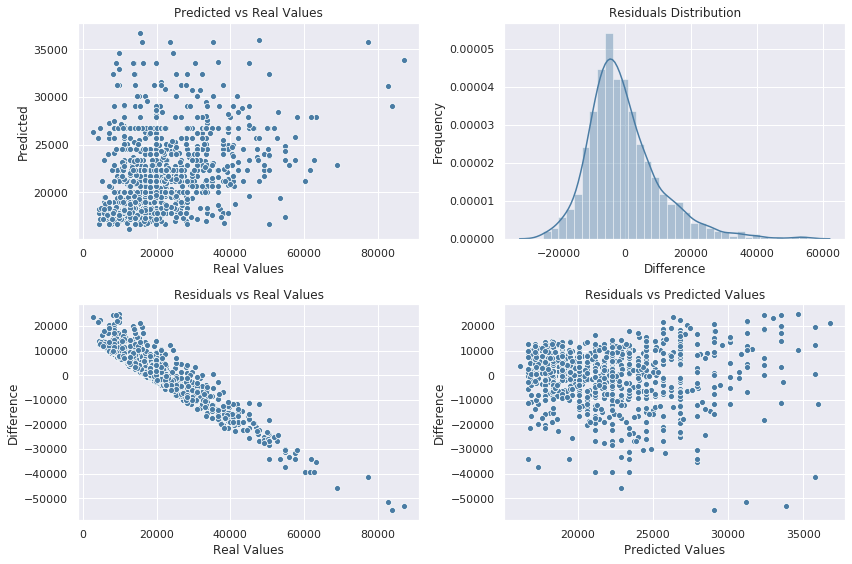

In [198]:
plot_results(y_test, y_hat)

By looking at Residuals, it seems like we can use a polynomial regression on living area.

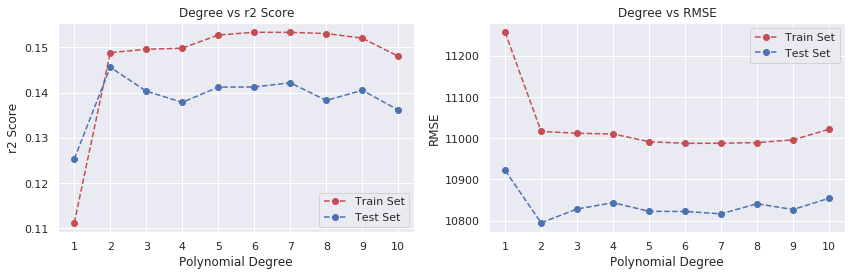

In [199]:
X= airbnb[['size']].values
y= airbnb['yearly_income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# simple visualisation to avoid overfitting
r2_train=[]
r2_test=[]
error_train=[]
error_test=[]
for i in range(1,11):
    pf= PolynomialFeatures(degree=i)
    X_poly= pf.fit_transform(X_train.reshape(-1,1))
    lm=LinearRegression()
    lm.fit(X_poly,y_train)
    y_hat= lm.predict(X_poly)
    X_poly_test= pf.fit_transform(X_test.reshape(-1,1))
    y_hat_test= lm.predict(X_poly_test)
    r2_train.append(metrics.r2_score(y_train,y_hat))
    r2_test.append(metrics.r2_score(y_test,y_hat_test))
    error_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_hat)))
    error_test.append(np.sqrt(metrics.mean_squared_error(y_test,y_hat_test)))
    
fig= plt.figure(figsize=(12, 4))

ax1= plt.subplot(121)
plt.plot(range(1,11),r2_train,'--ro')
plt.plot(range(1,11),r2_test,'--bo')
plt.xlabel('Polynomial Degree')
plt.xticks(list(range(1,11)))
plt.ylabel('r2 Score')
plt.title('Degree vs r2 Score')
plt.legend(['Train Set','Test Set'])

ax2= plt.subplot(122)
plt.plot(range(1,11),error_train,'--ro')
plt.plot(range(1,11),error_test,'--bo')
plt.xlabel('Polynomial Degree')
plt.xticks(list(range(1,11)))
plt.ylabel('RMSE')
plt.title('Degree vs RMSE')
plt.legend(['Train Set','Test Set'])

plt.tight_layout()

As can be seen on above graph, a polynomial transformation of second degree for living are can improve the model.

In [200]:
# Set X and Y to split the data
X= airbnb[['size']]
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run the pipeline
pl= Pipeline([('pr',PolynomialFeatures(degree=2)),
              ('lm',LinearRegression())])
pl.fit(X_train,y_train)

y_hat= pl.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('Score: ',score)
print('RMSE : ',rmse)

Score:  0.1455885365820252
RMSE :  10794.834961690194


### Polynomial Regression

Build a polynomial regression model.

In [201]:
# select features that are used in model
features= airbnb[['size','distance','host_identity_verified','bed_type','instant_bookable','moderate', 
                  'strict', 'private',  'stairless', 'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run the pipeline
pl= Pipeline([('pr',PolynomialFeatures(degree=2)),
              ('lm',LinearRegression())])
pl.fit(X_train,y_train)

y_hat= pl.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('Score: ',score)
print('RMSE : ',rmse)

# store data to results dicttionary
results['Polynomial Regression']=[score,rmse]

Score:  0.34035660252364375
RMSE :  9484.99450453659


With Cross Validation:

In [202]:
# cross validation with 5 folds
y_hat= cross_val_predict(pl, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Polynomial Regression CV']=[score,rmse]

r2 Score : 0.3657956223619152
RMSE     : 9448.234886094482


We can only apply polynomial transformation to living area and see what happens.

In [203]:
airbnb_poly= airbnb.reset_index(drop=True)
pf= PolynomialFeatures(degree=2)
size_poly= pf.fit_transform(airbnb_poly[['size']])
airbnb_poly= pd.concat([pd.DataFrame(size_poly,columns=['size0','size1','size2']),airbnb_poly],axis=1)

# select features that are used in model
features= airbnb_poly[['size0','size1','size2','distance','host_identity_verified','bed_type',
                       'instant_bookable','moderate', 'strict', 'private',  'stairless', 
                       'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb_poly['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

r2 Score : 0.3518567340800266
RMSE     : 9401.950930857893


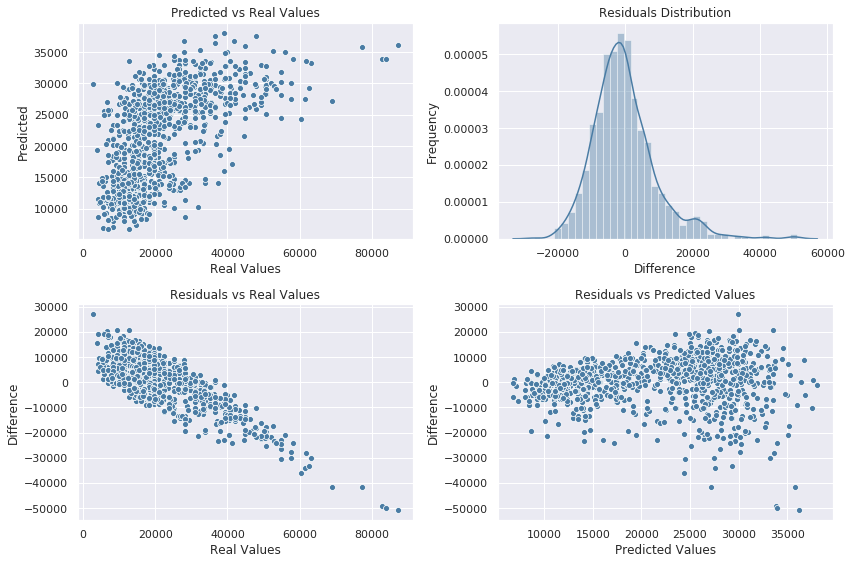

In [204]:
plot_results(y_test, y_hat)

In [205]:
# cross validation with 5 folds
y_hat= cross_val_predict(lm, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Polynomial Regression (Area Transformed) CV']=[score,rmse]

r2 Score : 0.3751560423012116
RMSE     : 9378.2509768813


The model is improved. Let's also use **Random Forest Regressor** and **Support Vector Machine** and compare them to our results.

### Random Forest Regerssor

In [206]:
airbnb_poly= airbnb.reset_index(drop=True)
pf= PolynomialFeatures(degree=2)
size_poly= pf.fit_transform(airbnb_poly[['size']])
airbnb_poly= pd.concat([pd.DataFrame(size_poly,columns=['size0','size1','size2']),airbnb_poly],axis=1)

# select features that are used in model
features= airbnb_poly[['size0','size1','size2','distance','host_identity_verified','bed_type',
                       'instant_bookable','moderate', 'strict', 'private',  'stairless', 
                       'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb_poly['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
# Use the forest's predict method on the test data
y_hat = rf.predict(X_test)

# print score and RMSE
score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Random Forest Regression']=[score,rmse]

r2 Score : 0.3682957882436382
RMSE     : 9281.95289135663


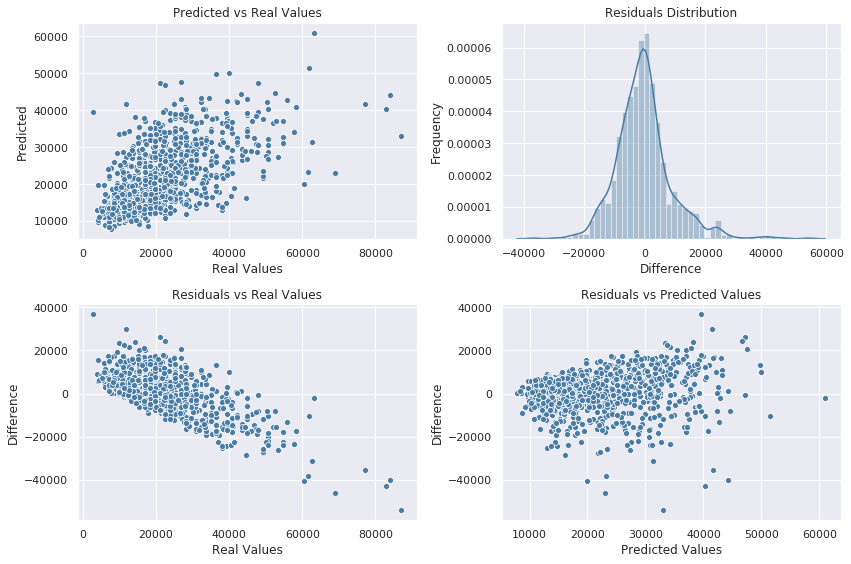

In [207]:
plot_results(y_test, y_hat)

In [208]:
# cross validation with 5 folds
y_hat= cross_val_predict(rf, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Random Forest Regression CV']=[score,rmse]

r2 Score : 0.3763013904311092
RMSE     : 9369.65179874192


### Support Vector Machine

We use a non-linear kernel for our model.

In [209]:
# select features that are used in model
features= airbnb[['size','distance','host_identity_verified','bed_type','instant_bookable','moderate', 
                  'strict', 'private',  'stairless', 'luggage_dropoff','balcony', 'elevator', 'loc']]

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb['yearly_income']

#Grid Search
param_grid={'C':[100,1000,10000],'gamma':[0.1,0.001,0.0001]}

gs= GridSearchCV(estimator=SVR(kernel='rbf',gamma='scale'),param_grid=param_grid,cv=5)

gs.fit(X_train,y_train)
y_hat= gs.predict(X_test)

score= metrics.r2_score(y_test,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
par= gs.best_params_
est= gs.best_estimator_

print('r2 Score       : ',score)
print('RMSE           : ',rmse)
print('Best Parameters: ',par)
print('Best Estimator : ',par)

# store data to results dicttionary
results['Support Vector Machine CV']=[score,rmse]

r2 Score       :  0.22355412916394213
RMSE           :  10290.537651942497
Best Parameters:  {'C': 10000, 'gamma': 0.1}
Best Estimator :  {'C': 10000, 'gamma': 0.1}


### Comparison

Let's look at the results and find out which model performs the best. Please note that because models have different features, **r2 score** is not a good measure to compare. The best measure to compare all of the models here is **Root Mean Squared Error**. The model with the lowest **RMSE** brings the best performance among all.

In [210]:
results_df= pd.DataFrame(data=results,index=['r2 Score','RMSE']).T
results_df.sort_values(by='RMSE')

r2 Score          RMSE
Random Forest Regression                     0.368296   9281.952891
Random Forest Regression CV                  0.376301   9369.651799
Ridge Regression CV                          0.382583   9372.339244
Linear Regression CV                         0.375325   9376.980219
Polynomial Regression (Area Transformed) CV  0.375156   9378.250977
Ridge Regression                             0.352612   9396.467895
Linear Regression Standard Scaler            0.352606   9396.517492
Linear Regression                            0.352606   9396.517492
Polynomial Regression CV                     0.365796   9448.234886
Polynomial Regression                        0.340357   9484.994505
Support Vector Machine CV                    0.223554  10290.537652
Linear Regression Entire Place               0.201396  11065.947288

A fair comparison would be between models evaluated with cross validation. On the Below graph, **RMSE** can be seen for all the models. There seems to be actually not a great difference between them. We add the Foursquare data to our model and look if they get any better. 

Text(0.5, 0, 'Root Mean Squared Error')

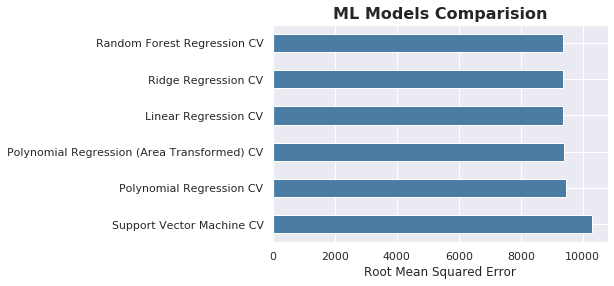

In [211]:
results_df.loc[[i for i in results_df.index.tolist() if 'CV' in i]]['RMSE'].sort_values(ascending=False).plot(kind='barh')
plt.title('ML Models Comparision', fontsize=16, fontweight='bold')
plt.xlabel('Root Mean Squared Error')

### Linear Regression with Foursquare Data

We add number of top 40 venue categories near each apartment to airbnb dataframe.

In [212]:
airbnb_fs= airbnb.merge(fs_final.reset_index(),on='id',how='inner')

In [213]:
features= airbnb_fs.drop(columns=['id','neighbourhood','neighbourhood_group_cleansed', 'latitude',
                                  'host_is_superhost', 'longitude', 'accommodates','price', 'cleaning_fee', 
                                  'guests_included', 'extra_people','review_scores_rating', 
                                  'cancellation_policy', 'yearly_income'], axis=1)

# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb_fs['yearly_income']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# build and run a regression model
lm= LinearRegression()
lm.fit(X_train, y_train)
y_hat= lm.predict(X_test)

# print score and RMSE
score= lm.score(X_train,y_train)
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
print('Score: ',score)
print('RMSE : ',rmse)

Score:  0.40609022671047446
RMSE :  9224.524006193737


In [214]:
# cross validation with 5 folds
y_hat= cross_val_predict(lm, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Linear Regression Foursquare CV']=[score,rmse]

r2 Score : 0.3743780509025274
RMSE     : 9391.133442794597


### Random Forest Regression with Foursquare Data

In [215]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# cross validation with 5 folds
y_hat= cross_val_predict(rf, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['Random Forest Regression Foursquare CV']=[score,rmse]

r2 Score : 0.3919011872206798
RMSE     : 9258.680570448585


Well, this is the lowest RMSE so far. It looks like Foursquare Data really improve the model.

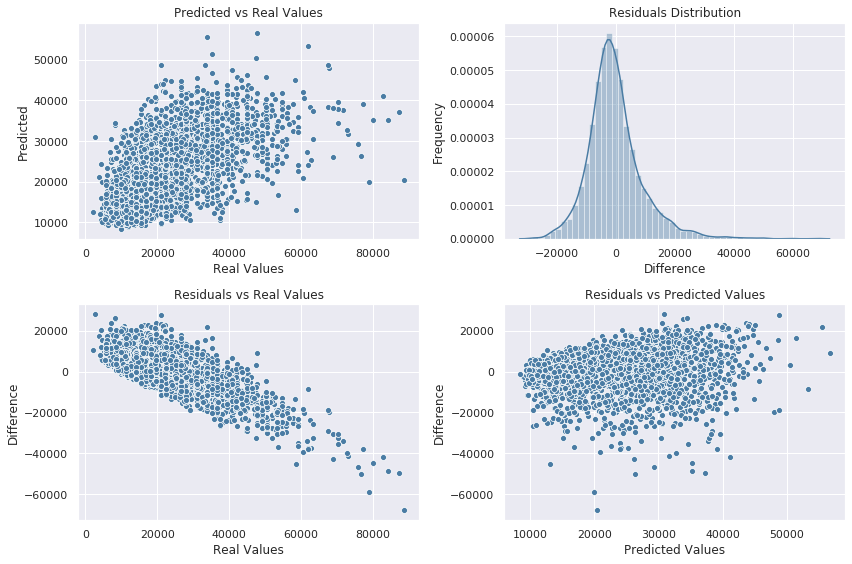

In [216]:
plot_results(y, y_hat)

### SVM with Foursquare Data

In [217]:
# Support Vector Machine
svm = SVR(kernel='poly',gamma=0.001, C=10_000, degree=2)

# cross validation with 5 folds
y_hat= cross_val_predict(svm, X,y, cv=5)

# print score and RMSE
score= metrics.r2_score(y,y_hat)
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('r2 Score :',score)
print('RMSE     :',rmse)

# store data to results dicttionary
results['SVR Foursquare CV']=[score,rmse]

r2 Score : 0.37625003729476847
RMSE     : 9377.072839160954


Random Forest Regressor still has the best efficiency.

### ML Models Results and Final Evaluation

In [218]:
results_df= pd.DataFrame(data=results,index=['r2 Score','RMSE']).T
results_df.sort_values(by='RMSE')

r2 Score          RMSE
Random Forest Regression Foursquare CV       0.391901   9258.680570
Random Forest Regression                     0.368296   9281.952891
Random Forest Regression CV                  0.376301   9369.651799
Ridge Regression CV                          0.382583   9372.339244
Linear Regression CV                         0.375325   9376.980219
SVR Foursquare CV                            0.376250   9377.072839
Polynomial Regression (Area Transformed) CV  0.375156   9378.250977
Linear Regression Foursquare CV              0.374378   9391.133443
Ridge Regression                             0.352612   9396.467895
Linear Regression Standard Scaler            0.352606   9396.517492
Linear Regression                            0.352606   9396.517492
Polynomial Regression CV                     0.365796   9448.234886
Polynomial Regression                        0.340357   9484.994505
Support Vector Machine CV                    0.223554  10290.537652
Linear Regression Entire Place               0.201396  11065.947288

(9250, 9450)

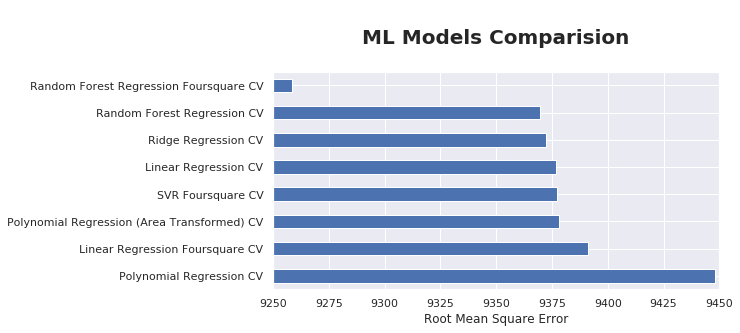

In [334]:
plt.figure(figsize=(8,4))
results_df.loc[[i for i in results_df.index.tolist() if 'CV' in i]]['RMSE'].sort_values(ascending=False).iloc[1:].plot(kind='barh')
plt.title('\nML Models Comparision\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Root Mean Square Error')
plt.xlim([9250,9450])

Clearly, the best model for predicting yearly income is **Random Forest Regressor** with Foursquare data. Let's see what would be optimum number of venue categories to extract from Foursquare dataframe.

In [336]:
# make an empty dict for storing rmse
errors=dict()
# biuld models with different number of venue categories extracted from foursquare dataframe 
for i in range(1,fs2['cat2'].value_counts().shape[0],10):
    # select a list of top venue categories
    sl= fs2['cat2'].value_counts().head(i).index.tolist()
    # merge airbnb dataframe with foursquare data
    airbnb_fs= airbnb.merge(fs2.groupby('id').sum()[sl].reset_index(),on='id',how='inner')
    # keep features that we need
    features= airbnb_fs.drop(columns=['id','neighbourhood','neighbourhood_group_cleansed', 'latitude', 
                                      'longitude', 'accommodates','price', 'cleaning_fee', 'guests_included', 
                                      'extra_people','review_scores_rating', 'cancellation_policy',
                                      'yearly_income','host_is_superhost'], axis=1)
    # Making dummy variable
    cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
    features=pd.concat([features,cat_dummy],axis=1)
    features.drop('loc',axis=1,inplace=True)
    # Set X and Y to split the data
    X= features
    y= airbnb_fs['yearly_income']
    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
    # Instantiate model with 100 decision trees
    rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train);
    # Use the forest's predict method on the test data
    y_hat = rf.predict(X_test)
    # RMSE
    rmse= np.sqrt(metrics.mean_squared_error(y_test,y_hat))
    # store rmse in errors dict
    errors[i]=rmse
# turn errors dict into dataframe
errors_df=pd.DataFrame(data=list(errors.values()),index=list(errors.keys()),columns=['RMSE'])

In [337]:
errors_df.sort_values(by='RMSE').head()

RMSE
41   9038.865352
11   9046.140225
31   9091.486951
261  9137.788318
241  9142.186720

(9000, 9300)

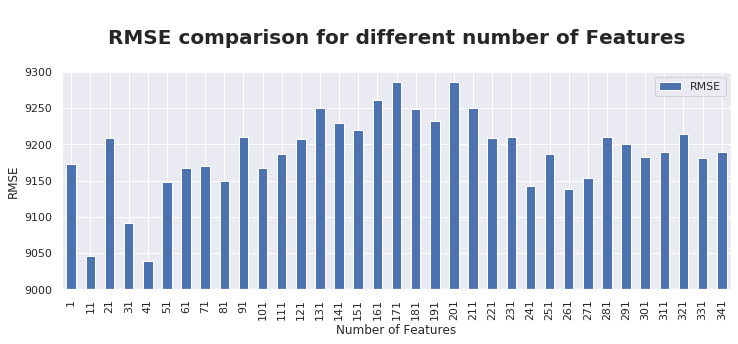

In [340]:
errors_df.plot(kind='bar',figsize=(12,4))
plt.title('\nRMSE comparison for different number of Features\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.ylim([9000,9300])

It looks like too many features add variance error to model. We repeat the same process for up to 40 categories and store each error. This time with cross validation to get the best comparison.

In [342]:
# make an empty dict for storing rmse
errors2=dict()
# biuld models with different number of venue categories extracted from foursquare dataframe 
for i in range(1,40):
    # select a list of top venue categories
    sl= fs2['cat2'].value_counts().head(i).index.tolist()
    # merge airbnb dataframe with foursquare data
    airbnb_fs= airbnb.merge(fs2.groupby('id').sum()[sl].reset_index(),on='id',how='inner')
    # keep features that we need
    features= airbnb_fs.drop(columns=['id','neighbourhood','neighbourhood_group_cleansed', 'latitude', 
                                      'longitude', 'accommodates','price', 'cleaning_fee', 'guests_included', 
                                      'extra_people','review_scores_rating', 'cancellation_policy',
                                      'yearly_income','host_is_superhost'], axis=1)
    # Making dummy variable
    cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
    features=pd.concat([features,cat_dummy],axis=1)
    features.drop('loc',axis=1,inplace=True)
    # Set X and Y to split the data
    X= features
    y= airbnb_fs['yearly_income']
    # Instantiate model with 100 decision trees
    rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    # cross validation with 5 folds
    y_hat= cross_val_predict(rf, X,y, cv=5)
    # RMSE
    rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
    # store rmse in errors dict
    errors2[i]=rmse
# turn errors dict into dataframe
errors_df2=pd.DataFrame(data=list(errors2.values()),index=list(errors2.keys()),columns=['RMSE'])

In [343]:
errors_df2.sort_values(by='RMSE').head(10)

RMSE
29  9233.728292
8   9233.947250
13  9238.697635
23  9239.697002
4   9241.271844
28  9242.660376
10  9243.834505
12  9243.995216
19  9245.193459
1   9248.395771

(9200, 9300)

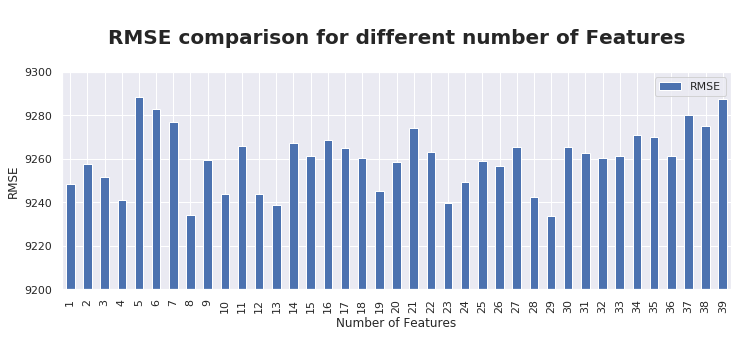

In [344]:
errors_df2.plot(kind='bar',figsize=(12,4))
plt.title('\nRMSE comparison for different number of Features\n',y=1, fontsize=20, fontweight='bold')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.ylim([9200,9300])

I believe top 10 common venue categories are the optimum number. Let's check it for last time:

In [345]:
# select a list of 10 top venue categories
sl= fs2['cat2'].value_counts().head(10).index.tolist()
# merge airbnb dataframe with foursquare data
airbnb_fs= airbnb.merge(fs2.groupby('id').sum()[sl].reset_index(),on='id',how='inner')
# keep features that we need
features= airbnb_fs.drop(columns=['id','neighbourhood','neighbourhood_group_cleansed', 'latitude',
                                  'host_is_superhost', 'longitude', 'accommodates','price', 'cleaning_fee', 
                                  'guests_included', 'extra_people','review_scores_rating', 
                                  'cancellation_policy', 'yearly_income'], axis=1)
# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'],drop_first=True)
features=pd.concat([features,cat_dummy],axis=1)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb_fs['yearly_income']

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# cross validation with 5 folds
y_hat= cross_val_predict(rf, X,y, cv=5)

# print RMSE
rmse= np.sqrt(metrics.mean_squared_error(y,y_hat))
print('RMSE     :',rmse)

RMSE     : 9215.927912749452


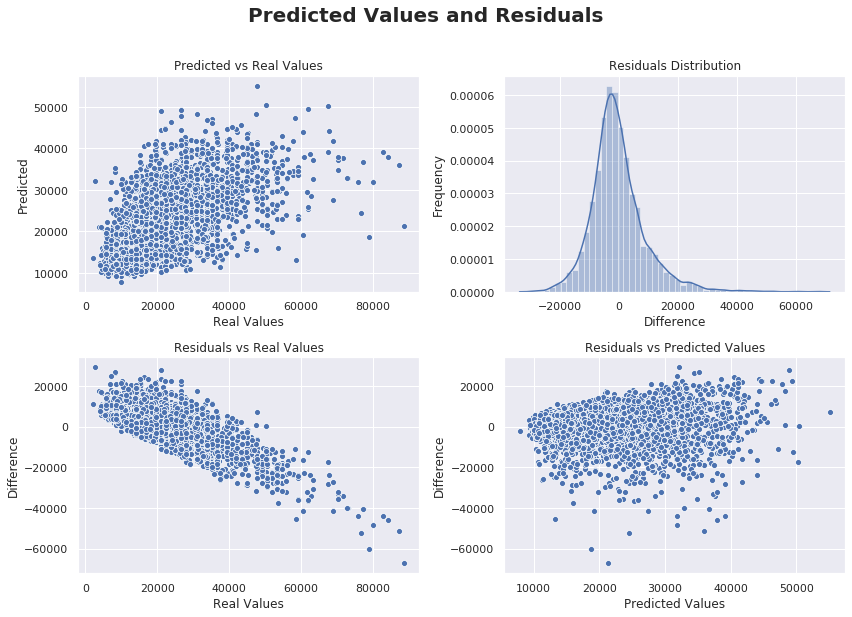

In [351]:
fig= plt.figure(figsize=(12, 8))

plt.suptitle('Predicted Values and Residuals', y=1.07, fontsize=20, fontweight='bold')

ax1= plt.subplot(221)
sns.scatterplot(y,y_hat,).set_title("Predicted vs Real Values")
ax1.set_ylabel('Predicted')
ax1.set_xlabel('Real Values')
ax2= plt.subplot(222)
sns.distplot(y-y_hat).set_title('Residuals Distribution')
ax2.set_xlabel('Difference')
ax2.set_ylabel('Frequency')
ax3= plt.subplot(223)
sns.scatterplot(y,y_hat-y,).set_title('Residuals vs Real Values')
ax3.set_ylabel('Difference')
ax3.set_xlabel('Real Values')
ax4= plt.subplot(224)
sns.scatterplot(y_hat,y_hat-y,).set_title('Residuals vs Predicted Values')
ax4.set_ylabel('Difference')
ax4.set_xlabel('Predicted Values')
fig.tight_layout()

We found the best model: **Random Forest Regressor**

# 2. Obtaining and Viewing the ImmobilienScout Data

## 2.1. Data Scraping from ImmobilienScout24

ImmobilienScout24 is the leading online marketplace for private and commercial real estate in Germany. Every month, more than twelve million people use the portal (unique visitors, according to comScore Media Metrix). One can simply search for apartments in every city in Germany. [Here](https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?pagenumber=1) is the page, where you can in particular search for apartemetns to buy in Berlin. There are a total number of 282 pages of results and 20 ads can be found on each page. Extra information including in the ad are: *Address*, *Living Area*, *Number of Rooms*, *Amenities* if available and most importantly *Price*. We write a function to scrape all of these information.

In [353]:
def scrape_immowelt(page_numbers=282, log=False, wait=True):
    
    """
    This Function scrapes data from immobilienscout24.de website.
    In particular, this is to scrape apartemetns that are available
    to buy in berlin and details about their size, number of rooms
    and some amenities if available.
    
    Parameters
    ----------
    page_numbers : Number of pages for results which appear in 
        immoscout when it is searched for apartments to buy
        in berlin, default 282
    log : if log is True, it prints the status of scraping and
        number of scraped items from each page, default False
    sleep: if sleep is True, it will wait 1 second after each request
        and 10 seconds after 10 requests in order to not get blocked
        by immobilienscout server
    
    Returns
    -------
    Dataframe : object, type of pandas.core.frame.DataFrame
        a Dataframe with available apartments to buy in berlin
    """

    # creating an empty dataframe
    df=pd.DataFrame(columns=['address','area','rooms','criteria','price'])

    # looping through pages
    for page_num in range(1,page_numbers):

        # building the URL of each web page
        url='https://www.immobilienscout24.de/Suche/de/berlin/berlin/wohnung-kaufen?pagenumber='+str(page_num)
        # making log
        if log:
            print(f'===== Page Number: {page_num} =====')
        # make the request
        source= requests.get(url).text
        # making log
        if log:
            print('Making the request...')
        # creating lxml script using BeautifulSoup package
        soup= BeautifulSoup(source, 'lxml')
        
        #looping through all the listings in the webpage
        for apartment in soup.find_all('div', class_='result-list-entry__data'):
            
            # get address
            try:
                address= apartment.find('div', class_="result-list-entry__address").text
            except:
                address= np.nan
            # get criteria
            try:
                cri_list= apartment.find('ul', class_="result-list-entry__secondary-criteria").find_all('li')
                criteria= [i.text for i in cri_list]
            except:
                criteria= np.nan
            # get living area, price, rooms
            try:
                detail= apartment.find('div', class_="grid grid-flex gutter-horizontal-l gutter-vertical-s")
                try:
                    price= detail.find_all('dl')[0].dd.text
                except:
                    price= np.nan
                try:
                    area= detail.find_all('dl')[1].dd.text
                except:
                    area= np.nan
                try:
                    rooms= detail.find_all('dl')[2].dd.text
                except:
                    rooms=np.nan
            except:
                price= np.nan
                area= np.nan
                rooms=np.nan
                
            # putting the result in a dictionary
            mydic= {'address':[address],'area':[area],'rooms':[rooms],'criteria':[criteria],'price':[price]}
            # turning the dic into dataframe
            # concatenating the dic with already existing data
            df= pd.concat([df, pd.DataFrame(data=mydic)])
            
        # keeping track scraped items on each page
        scraped= len(soup.find_all('div', class_='result-list-entry__data'))
        if log:
            print(f'Number of scraped items: {scraped}','\n')
            
        # waiting 1 second after each request and 10 second after 10 requests
        if wait:
            if page_num%10==0:
                print('Waiting 10 Seconds...\n')
                sleep(10)
            else:
                sleep(1)
                
    return df

In [354]:
# immo = scrape_immowelt()
# immo.to_csv('immo_listings.csv',index=False)

Web scraping is done! Let's look at what we got.

In [355]:
immo = pd.read_csv('immo_listings.csv')

In [356]:
rows= immo.shape[0]
print(f'Dataframe has {rows} rows.')

Dataframe has 5543 rows.


In [357]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 5 columns):
address     5543 non-null object
area        5543 non-null object
rooms       5543 non-null object
criteria    4899 non-null object
price       5543 non-null object
dtypes: object(5)
memory usage: 216.6+ KB


In [358]:
immo.head()

address               area  \
0            Charlottenburg (Charlottenburg), Berlin  30,10 - 125,70 m²   
1  Bayerische Straße 3, Wilmersdorf (Wilmersdorf)...              75 m²   
2      Suderoder Straße 15, Britz (Neukölln), Berlin          101,18 m²   
3      Böckhstraße 26, Kreuzberg (Kreuzberg), Berlin             174 m²   
4  Eisenacher Straße 18, Schöneberg (Schöneberg),...           59,41 m²   

               rooms                                      criteria  \
0  nach Vereinbarung                                           NaN   
1             2 Zi.2  ['Provisionsfrei*', 'Balkon/Terrasse', '+2']   
2         3,5 Zi.3,5  ['Provisionsfrei*', 'Balkon/Terrasse', '+1']   
3             3 Zi.3                 ['Provisionsfrei*', 'Aufzug']   
4             2 Zi.2  ['Provisionsfrei*', 'Balkon/Terrasse', '+2']   

                   price  
0  249.000 - 1.375.000 €  
1              665.000 €  
2              553.000 €  
3            1.596.000 €  
4              389.000 €

Because we save the dataframe to a csv file and load it back, the lists in *criteria* column are converted into strings.

In [359]:
immo['criteria'].iloc[2]

"['Provisionsfrei*', 'Balkon/Terrasse', '+1']"

We convert it back to list.

In [360]:
import ast
immo['criteria']= immo['criteria'].apply(lambda x: ast.literal_eval(x) if x==x else x)

In [361]:
criteria_list=[]
for i in immo['criteria'][immo['criteria'].notnull()]:
    criteria_list= criteria_list+ i
criteria_list=list(set(criteria_list))
criteria_list

['Balkon/Terrasse',
 'Einbauküche',
 '+3',
 'Aufzug',
 '+2',
 'Provisionsfrei*',
 'Garten',
 '+4',
 '+5',
 'Keller',
 'Gäste-WC',
 'Stufenlos',
 '+1']

Among these we will keep *stairless* (Stufenlos), *elevator* (Aufzug) and *balcony* (Balkon/Terrasse) which are used in our prediction model.

We have successfuly scraped the data. This dataframe consists of more than 5000 ads for apartments to sell in Berlin. Each apartment has adress, living area, number of rooms, amenities and price. Although there are also some NaN values. So far so good. Let's clean the data.

## 2.2. Cleaning the Data

The first important thing is that there are generally two types of ads on the website. An ad is either specificly one single apartment or it is a buidling with many apartments which can be still unfinished. The data for these two types of ads are different. In the first case it has exact living area, price, number of rooms and some amenities. But for buildings, we have a range of areas and prices, and no info about number of rooms and amenities.

Ads for single apartments have *Zi* (abbreviated for *Zimmer*) in their *rooms* column. So we can filter these two types of Ads. Let's take a look at buildings:

In [362]:
# Buildings
buildings= immo[immo['rooms'].apply(lambda x:'Zi' not in x)].copy()
buildings.head()

address               area  \
0             Charlottenburg (Charlottenburg), Berlin  30,10 - 125,70 m²   
10           Voltairestraße 11, Mitte (Mitte), Berlin  53,50 - 101,63 m²   
14  Regenerstraße 59, Karlshorst (Lichtenberg), Be...  74,00 - 129,00 m²   
23  Hönower Straße 4-7, Karlshorst (Lichtenberg), ...  56,00 - 129,00 m²   
24  Konstanzer Straße 58, Wilmersdorf (Wilmersdorf...  58,00 - 137,00 m²   

                rooms criteria                  price  
0   nach Vereinbarung      NaN  249.000 - 1.375.000 €  
10       Oktober 2020      NaN  399.500 - 1.149.500 €  
14               2021      NaN    319.950 - 689.950 €  
23         30.11.2021      NaN    290.000 - 575.000 €  
24         Juli  2020      NaN  361.000 - 1.280.000 €

In [363]:
buildings.shape

(158, 5)

In [364]:
buildings['criteria'].isna().sum()

158

One thing we can do is that to seperate the items. We can specify the lowest price to lowest size, highest price to highest size and build an average for buildings.

In [365]:
# creating an empty dataframe
buildings_modified=pd.DataFrame(columns=buildings.columns.tolist())

for i in range(buildings.shape[0]):
    
    row= buildings.iloc[i]
    price= [int(''.join(row['price'].split()[0].split('.'))), int(''.join(row['price'].split()[2].split('.')))]
    price.append((price[0]+price[1])/2)
    area= [int(row['area'].split()[0].split(',')[0]), int(row['area'].split()[2].split(',')[0])]
    area.append((area[0]+area[1])/2)
    address= 3*[row['address']]
    criteria=np.nan
    rooms=np.nan
    # putting the result in a dictionary
    mydic= {'address':address,'area':area,'rooms':rooms,'criteria':criteria,'price':price}
    # turning the dic into dataframe
    # concatenating the dic with already existing data
    buildings_modified= pd.concat([buildings_modified, pd.DataFrame(data=mydic)])
    
buildings_modified= buildings_modified.reset_index(drop=True)

In [366]:
# shape 
buildings_modified.shape

(474, 5)

In [367]:
# 5 random samples
buildings_modified.sample(5)

address   area  rooms  \
43   Warschauer Straße 65, Friedrichshain (Friedric...  193.0    NaN   
148            Charlottenburg (Charlottenburg), Berlin  147.0    NaN   
93       Am Hamburger Bahnhof 2, Mitte (Mitte), Berlin   56.0    NaN   
185     Am Köllnischen Park 6/7, Mitte (Mitte), Berlin   98.5    NaN   
388                    Lichterfelde (Steglitz), Berlin  191.0    NaN   

     criteria      price  
43        NaN  1599000.0  
148       NaN  2029160.0  
93        NaN   399000.0  
185       NaN   869250.0  
388       NaN  1305788.0

It looks good. Now, we clean *apartments* dataframe. 

In [368]:
# apartments
apartments= immo[immo['rooms'].apply(lambda x:'Zi' in x)].copy()
apartments.head()

address       area       rooms  \
1  Bayerische Straße 3, Wilmersdorf (Wilmersdorf)...      75 m²      2 Zi.2   
2      Suderoder Straße 15, Britz (Neukölln), Berlin  101,18 m²  3,5 Zi.3,5   
3      Böckhstraße 26, Kreuzberg (Kreuzberg), Berlin     174 m²      3 Zi.3   
4  Eisenacher Straße 18, Schöneberg (Schöneberg),...   59,41 m²      2 Zi.2   
5  Schönhauser Allee 55, Prenzlauer Berg (Prenzla...  384,11 m²      5 Zi.5   

                                 criteria        price  
1  [Provisionsfrei*, Balkon/Terrasse, +2]    665.000 €  
2  [Provisionsfrei*, Balkon/Terrasse, +1]    553.000 €  
3               [Provisionsfrei*, Aufzug]  1.596.000 €  
4  [Provisionsfrei*, Balkon/Terrasse, +2]    389.000 €  
5      [Balkon/Terrasse, Einbauküche, +1]  2.999.900 €

In [369]:
# function that extract area
def get_area_price(text):
    pattern= re.compile(r'\d,?')
    matches= pattern.findall(text)
    value= ''.join(matches)
    if ',' in value:
        value= value.split(',')[0]
    return value

In [370]:
# apply get area func to apartments df
apartments['area']= apartments['area'].apply(get_area_price).astype(int)

In [371]:
# apply get area func to apartments df
apartments['price']= apartments['price'].apply(get_area_price).astype(int)

In [372]:
# function that extract room numbers
def get_rooms(text):
    rooms=text.split()[0]
    if ',' in rooms:
        rooms= '.'.join(rooms.split(','))
    return rooms

In [373]:
# apply get area func to apartments df
apartments['rooms']= apartments['rooms'].apply(get_rooms).astype(float)

In [374]:
# check dataframe
apartments.head()

address  area  rooms  \
1  Bayerische Straße 3, Wilmersdorf (Wilmersdorf)...    75    2.0   
2      Suderoder Straße 15, Britz (Neukölln), Berlin   101    3.5   
3      Böckhstraße 26, Kreuzberg (Kreuzberg), Berlin   174    3.0   
4  Eisenacher Straße 18, Schöneberg (Schöneberg),...    59    2.0   
5  Schönhauser Allee 55, Prenzlauer Berg (Prenzla...   384    5.0   

                                 criteria    price  
1  [Provisionsfrei*, Balkon/Terrasse, +2]   665000  
2  [Provisionsfrei*, Balkon/Terrasse, +1]   553000  
3               [Provisionsfrei*, Aufzug]  1596000  
4  [Provisionsfrei*, Balkon/Terrasse, +2]   389000  
5      [Balkon/Terrasse, Einbauküche, +1]  2999900

Let's take care of NaN values.

In [375]:
# info, check mumber of NaN values
buildings_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 5 columns):
address     474 non-null object
area        474 non-null float64
rooms       0 non-null float64
criteria    0 non-null float64
price       474 non-null float64
dtypes: float64(4), object(1)
memory usage: 18.6+ KB


We can add *stairless*, *elevator* and *balcony* to all of the rows. Because these buildings are all modern and built new, and have all the standards and everything.

In [376]:
# add stairless, elevator and balcony to all of the apartments in buildings
buildings_modified['criteria']=[['Stufenlos','Balkon/Terrasse','Aufzug']]* len(buildings_modified)

To fill *rooms* column, we can run a regression on room numbers versus area in apartments column, and use it to predict *rooms* values for buildings_modified.

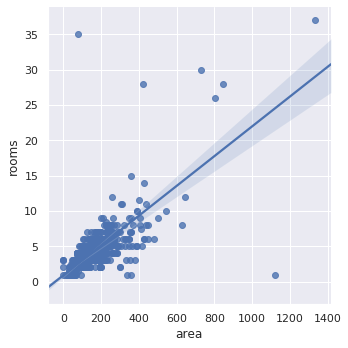

In [377]:
# Regression line on number of rooms vs living area
sns.lmplot(x='area', y='rooms', data=apartments)

As anticipated, there seems to be a strong relation between rooms numbers and living area.

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
# instantiate a LinearRegression model
lm= LinearRegression()
# train model
lm.fit(apartments[['area']], apartments[['rooms']])
# predict values
rooms_pred= lm.predict(buildings_modified[['area']])

In [380]:
# fill NaN values with predicted data
buildings_modified['rooms']= np.round(rooms_pred)

In [381]:
# check dataframe
buildings_modified.head()

address   area  rooms  \
0   Charlottenburg (Charlottenburg), Berlin   30.0    2.0   
1   Charlottenburg (Charlottenburg), Berlin  125.0    4.0   
2   Charlottenburg (Charlottenburg), Berlin   77.5    3.0   
3  Voltairestraße 11, Mitte (Mitte), Berlin   53.0    2.0   
4  Voltairestraße 11, Mitte (Mitte), Berlin  101.0    3.0   

                               criteria      price  
0  [Stufenlos, Balkon/Terrasse, Aufzug]   249000.0  
1  [Stufenlos, Balkon/Terrasse, Aufzug]  1375000.0  
2  [Stufenlos, Balkon/Terrasse, Aufzug]   812000.0  
3  [Stufenlos, Balkon/Terrasse, Aufzug]   399500.0  
4  [Stufenlos, Balkon/Terrasse, Aufzug]  1149500.0

Concatenate apartments and buildings_modified back to immo dataframe.

In [382]:
# concat two dataframes: apartments and buildings_modified
immo= pd.concat([apartments, buildings_modified])

In [383]:
# check df shape
immo.shape

(5859, 5)

Extract *Neighbourhood* from address.

In [384]:
# extract neighbourhood from address
immo['Neighbourhood'] =immo['address'].apply(lambda x: (x.split('(')[1]).split(')')[0])

In [385]:
# neighbourhoods with most apartments available
immo['Neighbourhood'].value_counts()

Charlottenburg      633
Schöneberg          534
Wilmersdorf         509
Friedrichshain      499
Steglitz            462
Tiergarten          374
Neukölln            315
Prenzlauer Berg     308
Pankow              286
Mitte               262
Kreuzberg           235
Reinickendorf       215
Wedding             190
Zehlendorf          176
Köpenick            163
Treptow             137
Spandau             137
Lichtenberg         135
Tempelhof           130
Weißensee            86
Hohenschönhausen     32
Hellersdorf          26
Marzahn              14
Innenhof              1
Name: Neighbourhood, dtype: int64

Let's get rid of outliers.

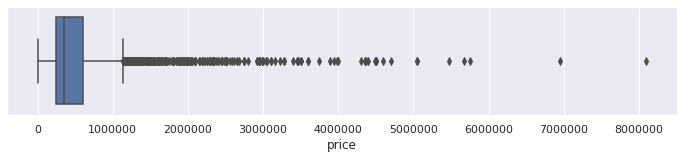

In [386]:
# boxplot price
fig= plt.figure(figsize=(12,2))
sns.boxplot(x='price',data=immo)

In [387]:
# 10 cheapest apartemetns
immo.sort_values(by='price').head(10)

address   area  rooms  \
381  Holländerstraße 36-36A, Reinickendorf (Reinick...   40.0    2.0   
383  Holländerstraße 36-36A, Reinickendorf (Reinick...   83.5    3.0   
366                         Rosenthal (Pankow), Berlin   40.0    2.0   
382  Holländerstraße 36-36A, Reinickendorf (Reinick...  127.0    4.0   
312  Rue Nungesser et Coli 6-12, Reinickendorf (Rei...   48.0    2.0   
314  Rue Nungesser et Coli 6-12, Reinickendorf (Rei...   89.0    3.0   
313  Rue Nungesser et Coli 6-12, Reinickendorf (Rei...  130.0    4.0   
432  Alt-Reinickendorf 54, Reinickendorf (Reinicken...   28.0    1.0   
434  Alt-Reinickendorf 54, Reinickendorf (Reinicken...   60.5    2.0   
433  Alt-Reinickendorf 54, Reinickendorf (Reinicken...   93.0    3.0   

                                 criteria   price  Neighbourhood  
381  [Stufenlos, Balkon/Terrasse, Aufzug]    56.0  Reinickendorf  
383  [Stufenlos, Balkon/Terrasse, Aufzug]   121.0  Reinickendorf  
366  [Stufenlos, Balkon/Terrasse, Aufzug]   185.0         Pankow  
382  [Stufenlos, Balkon/Terrasse, Aufzug]   186.0  Reinickendorf  
312  [Stufenlos, Balkon/Terrasse, Aufzug]   274.0  Reinickendorf  
314  [Stufenlos, Balkon/Terrasse, Aufzug]   486.5  Reinickendorf  
313  [Stufenlos, Balkon/Terrasse, Aufzug]   699.0  Reinickendorf  
432  [Stufenlos, Balkon/Terrasse, Aufzug]  5050.0  Reinickendorf  
434  [Stufenlos, Balkon/Terrasse, Aufzug]  6187.5  Reinickendorf  
433  [Stufenlos, Balkon/Terrasse, Aufzug]  7325.0  Reinickendorf

We keep only apartemetns that cost between 60,000 eur and 1,000,000 euro.

In [388]:
# del outliers
immo= immo[(immo['price']>60_000) & (immo['price']<1_000_000)]

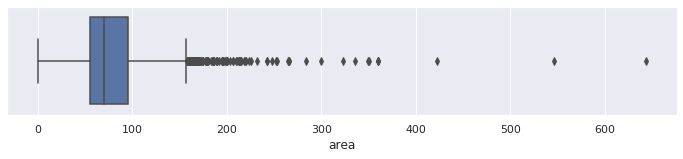

In [389]:
# boxplot area
fig= plt.figure(figsize=(12,2))
sns.boxplot(x='area',data=immo)

In [390]:
# 10 smallest apartments
immo.sort_values(by='area').head(10)

address  area  rooms  \
4695            Charlottenburg (Charlottenburg), Berlin   0.0    1.0   
3784  Orber Straße 23, Schmargendorf (Wilmersdorf), ...   0.0    2.0   
3697  Hubertusstr. 0, Lichtenberg (Lichtenberg), Berlin   0.0    3.0   
3785       Belßstraße 28 B, Lankwitz (Steglitz), Berlin   0.0    3.0   
3787  Sonnenscheinpfad 6, Marienfelde (Tempelhof), B...   0.0    3.0   
2884   Riemannstrasse 16, Kreuzberg (Kreuzberg), Berlin  10.0    1.0   
336          Kiefholzstr. 22, Treptow (Treptow), Berlin  20.0    1.0   
5280                  Lichtenberg (Lichtenberg), Berlin  20.0    1.0   
2339                    Zehlendorf (Zehlendorf), Berlin  22.0    1.0   
467             Friedrichshain (Friedrichshain), Berlin  22.0    1.0   

                                            criteria     price   Neighbourhood  
4695                                        [Aufzug]  149000.0  Charlottenburg  
3784                       [Provisionsfrei*, Keller]  213300.0     Wilmersdorf  
3697          [Balkon/Terrasse, Einbauküche, Keller]  490000.0     Lichtenberg  
3785  [Provisionsfrei*, Balkon/Terrasse, Garten, +1]  270900.0        Steglitz  
3787  [Provisionsfrei*, Balkon/Terrasse, Garten, +1]  237900.0       Tempelhof  
2884                  [Provisionsfrei*, Einbauküche]  149000.0       Kreuzberg  
336             [Stufenlos, Balkon/Terrasse, Aufzug]  149240.0         Treptow  
5280      [Provisionsfrei*, Einbauküche, Aufzug, +1]  143000.0     Lichtenberg  
2339          [Balkon/Terrasse, Einbauküche, Keller]  165000.0      Zehlendorf  
467                                              NaN  119000.0  Friedrichshain

We keep only apartemnts with living areas between 22 sqm and 200 sqm.

In [391]:
# del area outliers
immo= immo[(immo['area']>20) & (immo['area']<200)]

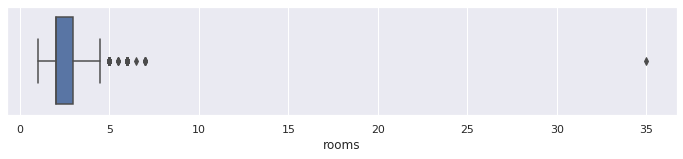

In [392]:
# boxplot rooms
fig= plt.figure(figsize=(12,2))
sns.boxplot(x='rooms',data=immo)

We have only apartments with equal or less than 7 rooms.

In [393]:
immo= immo[immo['rooms']<10]

Let's plot all of these boxplots together and check them for one last time.

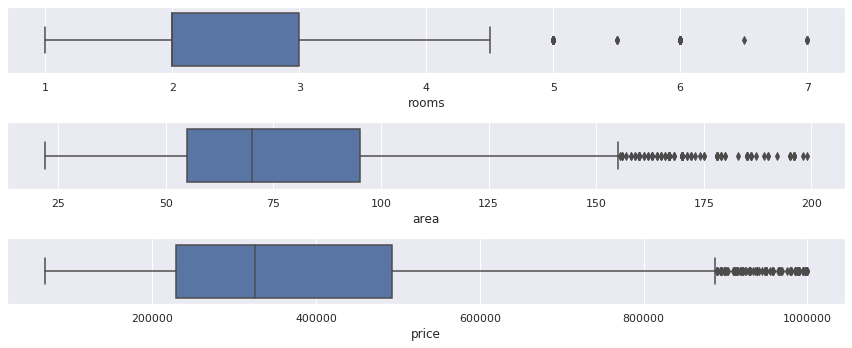

In [394]:
sns.set_style('darkgrid')
fig= plt.figure(figsize=(12,5))
ax1=plt.subplot(311)
sns.boxplot(x='rooms',data=immo)
ax2=plt.subplot(312)
sns.boxplot(x='area',data=immo)
ax3=plt.subplot(313)
sns.boxplot(x='price',data=immo)
plt.tight_layout()

Everything looks good.

## 2.3. Geocoding Using HERE Rest API

In order to download Foursquare data for each apartment, we need a geocoder to convert addresses into longitude and latitude ccordinates. In this projectm we use **HERE Location Services**. The Rest API is free to use and can be found [here](https://www.here.com/).

In [395]:
# geocoder
# function that download longitude and latitude for a given address
def get_lon_lat(df):
    
    """
    This Function takes a dataframe with a column named 'address'
    It adds two columns for longitude and latitude to dataframe
    and store lon and lat values for each address in those columns
    """
    
    # creat columns for lon and lat
    df['longitude']=0
    df['latitude']=0    
    
    # HERE credentials are already saved in a json file 
    with open('HERE_credentials.json') as f:
        here= json.load(f)
    API_KEY= here['API_KEY']

    # looping through all the rows 
    for i in range(len(df)):
        # error handling in case nothing is found
        try:
            address= df['address'].iloc[i]+ ', Deutschland'
            address= address.replace(', ','+').replace(' ','+')
            url= f'https://geocoder.ls.hereapi.com/6.2/geocode.json?apiKey={API_KEY}&searchtext={address}'
            res = requests.get(url=url).json()
            df['longitude'].iloc[i]= res['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Longitude']
            df['latitude'].iloc[i]= res['Response']['View'][0]['Result'][0]['Location']['DisplayPosition']['Latitude']
        except:    
            pass
        
    return df

In [396]:
# ## run the function
# immo= get_lon_lat(immo)
# ## save dataframe as a csv file
# immo.to_csv('immo_lonlat.csv',index=False)

Becasue this process takes too much time, we ran it once and save the results in a csv file.

In [397]:
# read csv file
immo = pd.read_csv('immo_lonlat.csv')
# correct criteria column format
immo['criteria']= immo['criteria'].apply(lambda x: ast.literal_eval(x) if x==x else x)

In [398]:
# check daraframe
immo.head()

address   area  rooms  \
0  Bayerische Straße 3, Wilmersdorf (Wilmersdorf)...   75.0    2.0   
1      Suderoder Straße 15, Britz (Neukölln), Berlin  101.0    3.5   
2  Eisenacher Straße 18, Schöneberg (Schöneberg),...   59.0    2.0   
3         Binzstr. 53, 53 A, Pankow (Pankow), Berlin  130.0    3.5   
4            Charlottenburg (Charlottenburg), Berlin  100.0    3.0   

                                 criteria     price   Neighbourhood  \
0  [Provisionsfrei*, Balkon/Terrasse, +2]  665000.0     Wilmersdorf   
1  [Provisionsfrei*, Balkon/Terrasse, +1]  553000.0        Neukölln   
2  [Provisionsfrei*, Balkon/Terrasse, +2]  389000.0      Schöneberg   
3                       [Balkon/Terrasse]  539500.0          Pankow   
4                                     NaN  859000.0  Charlottenburg   

   longitude  latitude  
0   13.31415  52.49844  
1   13.43299  52.46085  
2   13.34948  52.49573  
3   13.41894  52.56375  
4   13.29005  52.53300

Longitudes and latitudes are successfuly downloaded. As next step, we get rid of outliers.

In [399]:
# keep only values with lon and lat which are within Berlin
immo = immo[(52<immo['latitude']) &\
            (immo['latitude']<53) &\
            (13.1<immo['longitude']) &\
            (immo['longitude']<13.7)]

In [400]:
immo.Neighbourhood.nunique()

23

In [401]:
# create map
ber_coor = (52.51078, 13.38417)
map_berlin= folium.Map(location=ber_coor, zoom_start=12)

# marker colors
markers= ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6',
 '#bfef45', '#fabebe', '#469990', '#e6beff', '#9A6324', '#fffac8', '#800000', '#aaffc3',
 '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000', '#e6194B', '#3cb44b',
 '#ffe119', '#4363d8']

labels= immo['Neighbourhood'].value_counts().index.tolist()
# taking a sample of dataframe to plot
immo_subset= immo.sample(n=500, random_state=1)


# set markers
for lat, lon, loc in zip(immo_subset['latitude'], immo_subset['longitude'], immo_subset['Neighbourhood']):
    
    label = folium.Popup(str(loc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers[labels.index(str(loc))],
        fill=True,
        fill_color=markers[labels.index(str(loc))],
        fill_opacity=0.7).add_to(map_berlin)

# plot berlin map
map_berlin

Let's check if values for Longitude and Latitude are correct.

Text(0.5, 1.0, 'Berlin Neighborhoods')

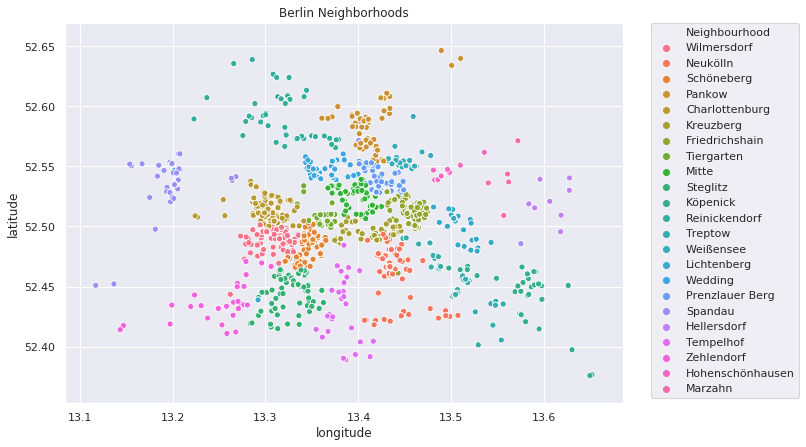

In [402]:
# check lon and lat
plt.figure(figsize=(10,7))
sns.scatterplot(x='longitude',y='latitude',hue='Neighbourhood',data=immo)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Berlin Neighborhoods')

Everything is good with lon and lat. Now we can add a column for distance to Berlin city center and calculate it for each point. We use our function *distance_to_mid*.

In [403]:
# new column called 'distance' to store distance values
immo['distance'] = immo.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

## 2.4. KNN Model for predicting districts and neighborhoods

One of the features in our prediction model is neighborhood. We could extarct some information from addresses in *ImmobilienScout* dataframe. But the problem is, they are not accurate. They are a combination of neighborhoods and districts and vary from the real data we built our model on. So somehow we need the real values for neighborhoods and then we can categorize them in the exact same way which we did to our *Airbnb* data. 

One way to find neighborhood of each apartment is to built a ML classifier model, to classify apartments based on their longitude and latitude. We have more than 20000 rows of data, on which we can build a strong reliable model.

We use **K-Nearest-Neighbors** algorithm to predict neighborhoods. First, we can visualize the model and test it on districts.

In [404]:
# columns we need
df[['latitude','longitude','neighbourhood_group_cleansed']].head()

latitude  longitude neighbourhood_group_cleansed
0  52.54425   13.39749                        Mitte
1  52.53500   13.41758                       Pankow
2  52.49885   13.34906       Tempelhof - Schöneberg
3  52.51171   13.45477     Friedrichshain-Kreuzberg
4  52.54316   13.41509                       Pankow

In [405]:
from sklearn.model_selection import train_test_split

In [406]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df[['latitude','longitude']], 
                                                    df['neighbourhood_group_cleansed'], 
                                                    test_size=0.3, random_state=42)

In [407]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier
# import evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [408]:
# run KNN
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_hat= knn.predict(X_test)

In [409]:
print('Accuracy Score: ',accuracy_score(y_test,y_hat))

Accuracy Score:  0.9910520607375272


In [410]:
print('Confusion Matrix: \n\n',confusion_matrix(y_test,y_hat))

Confusion Matrix: 

 [[ 529    0    0    0    1    0    0    0    1    0    5    0]
 [   0 1694    1    0    4    4    1    0    0    0    2    0]
 [   0    0  227    1    0    0    0    0    0    0    0    0]
 [   0    0    0   41    0    0    0    0    0    0    0    0]
 [   0    3    0    0 1575    0    1    4    0    0    1    0]
 [   0    8    0    0    0 1133    0    0    0    0    2    5]
 [   0    6    0    0    6    0 1180    0    0    0    0    0]
 [   0    0    0    0    0    0    0   82    1    0    0    0]
 [   3    0    0    0    0    0    0    0   46    0    0    0]
 [   1    0    0    0    0    0    0    0    0  131    1    0]
 [   0    2    0    0    1    0    0    0    0    1  487    0]
 [   0    0    0    0    0    0    0    0    0    0    0  185]]


In [411]:
print('Classification Report: \n\n',classification_report(y_test,y_hat))

Classification Report: 

                           precision    recall  f1-score   support

    Charlottenburg-Wilm.       0.99      0.99      0.99       536
Friedrichshain-Kreuzberg       0.99      0.99      0.99      1706
             Lichtenberg       1.00      1.00      1.00       228
   Marzahn - Hellersdorf       0.98      1.00      0.99        41
                   Mitte       0.99      0.99      0.99      1584
                Neukölln       1.00      0.99      0.99      1148
                  Pankow       1.00      0.99      0.99      1192
           Reinickendorf       0.95      0.99      0.97        83
                 Spandau       0.96      0.94      0.95        49
   Steglitz - Zehlendorf       0.99      0.98      0.99       133
  Tempelhof - Schöneberg       0.98      0.99      0.98       491
      Treptow - Köpenick       0.97      1.00      0.99       185

                accuracy                           0.99      7376
               macro avg       0.98      0.99   

Results are very good. Our model is strong with an accuracy score greater than 99%. Let's find the optimum number of neighbors to use in model.

Text(0, 0.5, 'Error Rate')

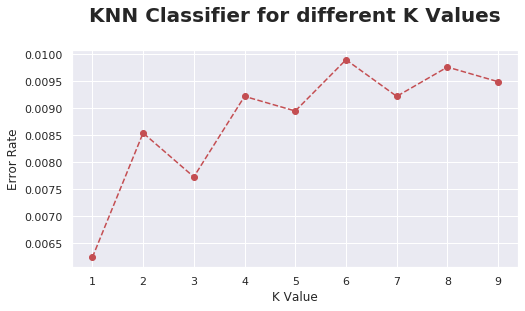

In [412]:
# emoty list to store errors for each k
err=[]

# test model with k values between 1 and 10
for i in range(1,10):
    knn_i= KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    y_hat_i= knn_i.predict(X_test)
    err.append(np.mean(y_hat_i != y_test))

# plot error rate vs k value
plt.figure(figsize=(8,4))
plt.plot(range(1,10),err,'--ro')
plt.title('KNN Classifier for different K Values\n', fontsize=20, fontweight='bold')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

The best value to use is 1.

We can also visualize our model boundries and compare it to a real Berlin map.

In [413]:
# Set features
X=df[['longitude','latitude']]

# label encoder for neighborhoods
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df['neighbourhood_group_cleansed'].values)
y=le.transform(df['neighbourhood_group_cleansed'].values)

# knn model
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

# creat a mesh
x2= np.linspace(X.longitude.min(),X.longitude.max(),500)
y2= np.linspace(X.latitude.min(),X.latitude.max(),500)
xx, yy = np.meshgrid(x2, y2)

# predict mesh values
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

Text(13.43, 52.43, 'Neu-\nKölln')

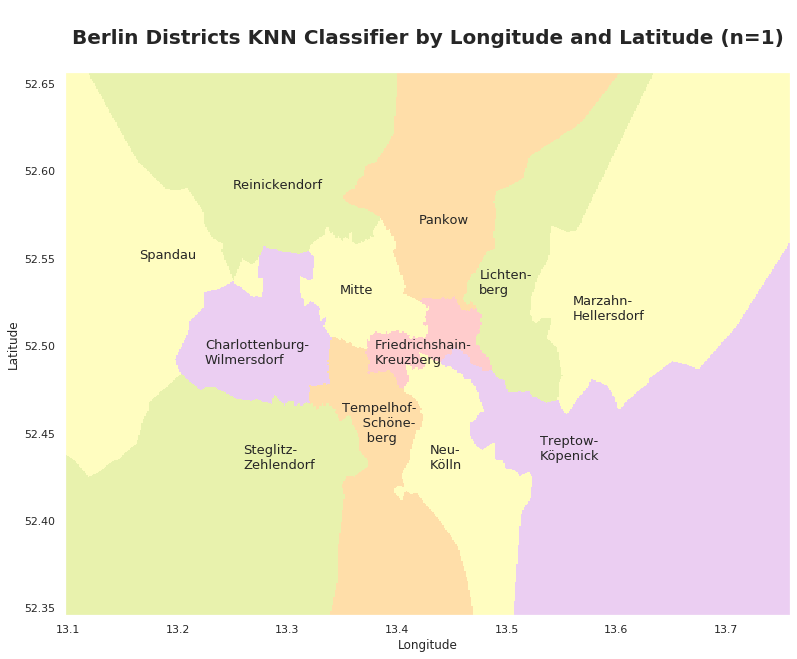

In [414]:
# function to build a color map
from matplotlib.colors import ListedColormap
# chosen colors
markers= ['#EBCEF2', '#FFCCCC', '#E8F2AD', '#FFFDC0', '#FFFDC0', '#FFFDC0', 
          '#FFDEA9', '#E8F2AD', '#FFFDC0', '#E8F2AD', '#FFDEA9', '#EBCEF2']
# Create color maps
cmap = ListedColormap(markers)

# creat figure and ax
fig, ax = plt.subplots(figsize=(13, 10))

# plot color mesh
plt.pcolormesh(xx, yy, Z, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('\nBerlin Districts KNN Classifier by Longitude and Latitude (n=1)\n', fontsize=20, fontweight='bold')
ax.text(13.348, 52.53, 'Mitte', fontsize=13)
ax.text(13.42, 52.57, 'Pankow', fontsize=13)
ax.text(13.25, 52.59, 'Reinickendorf', fontsize=13)
ax.text(13.225, 52.49, 'Charlottenburg-\nWilmersdorf', fontsize=13)
ax.text(13.165, 52.55, 'Spandau', fontsize=13)
ax.text(13.26, 52.43, 'Steglitz-\nZehlendorf', fontsize=13)
ax.text(13.35, 52.445, 'Tempelhof-\n     Schöne-\n      berg', fontsize=13)
ax.text(13.38, 52.49, 'Friedrichshain-\nKreuzberg', fontsize=13)
ax.text(13.475, 52.53, 'Lichten-\nberg', fontsize=13)
ax.text(13.56, 52.515, 'Marzahn-\nHellersdorf', fontsize=13)
ax.text(13.53, 52.435, 'Treptow-\nKöpenick', fontsize=13)
ax.text(13.43, 52.43, 'Neu-\nKölln', fontsize=13)

**The Districts of Berlin**

<img src='https://upload.wikimedia.org/wikipedia/commons/e/ea/Berlin%2C_administrative_divisions_%28%2Bdistricts_-boroughs_-pop%29_-_de_-_colored.svg' width=700 align="left" />

When we compare knn plot with the Berlin Districts map, it is clear that the model works very good and it is indeed very reliable. Let's predict districts for our *ImmobilienScout* dataframe. 

In [415]:
# knn model
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(df[['latitude','longitude']],df['neighbourhood_group_cleansed'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [416]:
# use model to predict districts
immo['district']= knn.predict(immo[['latitude','longitude']])

In the same way we can build a model to predict neighborhoods.

In [417]:
# creat a df
neigh_class=df[['latitude','longitude','neighbourhood']].dropna()
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(neigh_class[['latitude','longitude']], 
                                                    neigh_class['neighbourhood'], 
                                                    test_size=0.3)
# knn model
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_hat= knn.predict(X_test)

# score
print('Accuracy Score: ',accuracy_score(y_test,y_hat))

Accuracy Score:  0.9864038069340585


This works also great. Let's build a model with the whole data and use it to predict *ImmobilienScout* apartments.

In [418]:
# knn model
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(neigh_class[['latitude','longitude']],neigh_class['neighbourhood'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [419]:
# use model to predict districts
immo['neighborhood']= knn.predict(immo[['latitude','longitude']])

In [420]:
immo.head()

address   area  rooms  \
0  Bayerische Straße 3, Wilmersdorf (Wilmersdorf)...   75.0    2.0   
1      Suderoder Straße 15, Britz (Neukölln), Berlin  101.0    3.5   
2  Eisenacher Straße 18, Schöneberg (Schöneberg),...   59.0    2.0   
3         Binzstr. 53, 53 A, Pankow (Pankow), Berlin  130.0    3.5   
4            Charlottenburg (Charlottenburg), Berlin  100.0    3.0   

                                 criteria     price   Neighbourhood  \
0  [Provisionsfrei*, Balkon/Terrasse, +2]  665000.0     Wilmersdorf   
1  [Provisionsfrei*, Balkon/Terrasse, +1]  553000.0        Neukölln   
2  [Provisionsfrei*, Balkon/Terrasse, +2]  389000.0      Schöneberg   
3                       [Balkon/Terrasse]  539500.0          Pankow   
4                                     NaN  859000.0  Charlottenburg   

   longitude  latitude  distance                district         neighborhood  
0   13.31415  52.49844  6.112564    Charlottenburg-Wilm.          Wilmersdorf  
1   13.43299  52.46085  5.054412                Neukölln                Britz  
2   13.34948  52.49573  3.784187  Tempelhof - Schöneberg           Schöneberg  
3   13.41894  52.56375  6.852779                  Pankow               Pankow  
4   13.29005  52.53300  8.421262    Charlottenburg-Wilm.  Charlottenburg-Nord

We can now drop the old *Neighbourhood* column.

In [421]:
immo.drop('Neighbourhood', axis=1, inplace=True)

## 2.5. Exploratory Data Analysis (EDA)

We continue by doing Exploratory Data Analysis (EDA) to our *ImmobilienScout* dataframe to gain a better insight about apartments in berlin, which are available to buy.

### Most Common Amenities

Let's look at most common amenities.

In [422]:
# concat all amenities lists together
cr_list=[]
for i in immo['criteria'].dropna():
    if i!='+1':
        cr_list=cr_list+i

# remove 1+ 2+ 3+ 4+ 5+
for i in cr_list:
    for n in range(1,6):
        if i=='+'+str(n):
            cr_list.remove(i)
    
# import Counter func to count unique values in a list
from collections import Counter
# use Counter func
Counter(cr_list).most_common()


[('Balkon/Terrasse', 3407),
 ('Keller', 2516),
 ('Einbauküche', 1628),
 ('Provisionsfrei*', 1104),
 ('Aufzug', 1003),
 ('Garten', 555),
 ('Stufenlos', 390),
 ('Gäste-WC', 261)]

The most common one is balcony. I write a translation of all these words. So if you don't speek german, you can still know what is going on.

* Balkon/Terrasse: balcony
* Keller: basement
* Einbauküche: Equipped kitchen
* Provisionsfrei*: No commission
* Aufzug: elevator
* Garten: garden
* Stufenlos: stairless
* Gäste-WC: guest bathroom

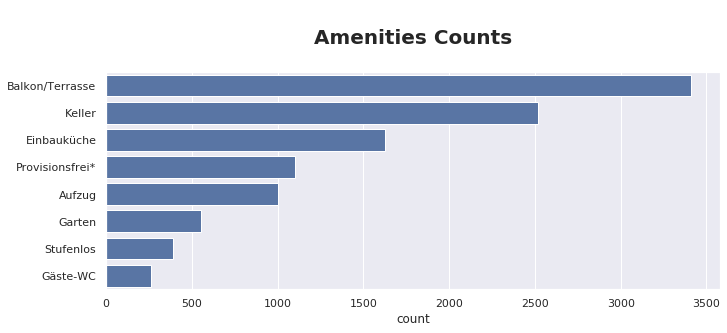

In [423]:
# creat new dataframe with amenities counts
sub_cr= pd.DataFrame(Counter(cr_list).most_common(), columns=['amenity','count'])
# horizontal barplot of amenities count
sns.set(style="darkgrid")
plt.figure(figsize=(11,4))
sns.barplot(x='count', y='amenity', data=sub_cr, color="b")
plt.ylabel(None)
plt.title('\nAmenities Counts\n',y=1, fontsize=20, fontweight='bold')
plt.show()

### Price, Size and Room Numbers

In [424]:
immo[['price','area','rooms']].describe()

price         area        rooms
count    5112.000000  5112.000000  5112.000000
mean   385069.181631    77.513595     2.563948
std    206286.927060    32.084273     1.018120
min     69000.000000    22.000000     1.000000
25%    229000.000000    55.000000     2.000000
50%    326450.000000    70.000000     2.000000
75%    493000.000000    95.000000     3.000000
max    999999.000000   199.000000     7.000000

The median Price for an apartment is about 330,000 eur, the median living area is 70 sqm and the median number of rooms is 2.

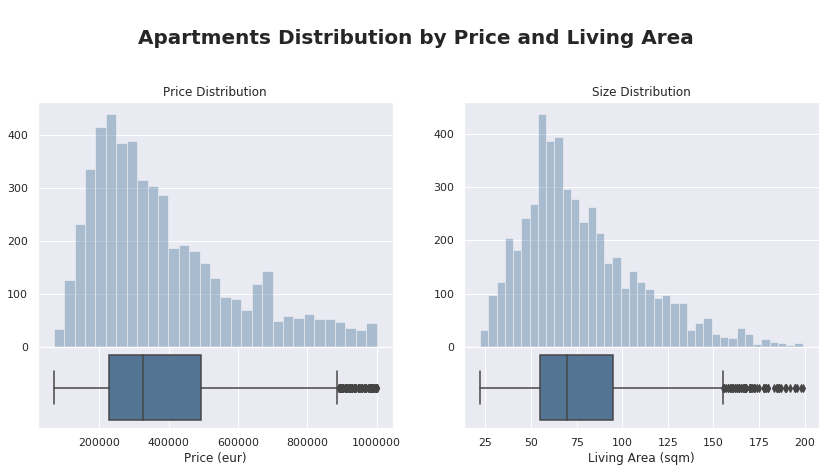

In [425]:
# import gridspec func for subplots with different sizes
from matplotlib import gridspec
# creat figure
fig = plt.figure(figsize=(14, 6)) 
fig.suptitle('\nApartments Distribution by Price and Living Area',y=1.1, fontsize=20, fontweight='bold')

gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], hspace=0)

# creat ax
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

ax0.set_xticks([])
ax1.set_xticks([])
ax0.set_xlabel(None)
ax1.set_xlabel(None)

# histogram of price distribution
sns.distplot(a=immo['price'], ax=ax0, kde=False,color='#49759c').set_title('Price Distribution')
# histogram of size distribution
sns.distplot(a=immo['area'], ax=ax1, kde=False,color='#49759c').set_title('Size Distribution')
# boxplot of price distribution
sns.boxplot(x='price', data=immo, ax=ax2,color='#49759c')
ax2.set_xlabel('Price (eur)')
# boxplot of size distribution
sns.boxplot(x='area', data=immo, ax=ax3,color='#49759c')
ax3.set_xlabel('Living Area (sqm)')

plt.show()

Let's look at relation between Price, Size and number of rooms in a scatterplot.

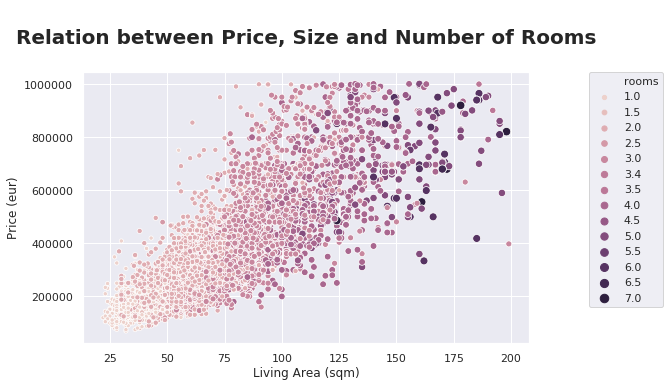

In [426]:
# scatterplot area price
plt.figure(figsize=(8,5))
ax= sns.scatterplot(x='area',y='price',data=immo, hue='rooms',size='rooms',legend='full')
# put legend out of plot
ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('\nRelation between Price, Size and Number of Rooms\n',y=1, fontsize=20, fontweight='bold')
plt.ylabel('Price (eur)')
plt.xlabel('Living Area (sqm)')
plt.show()

There is clearly a strong realation between these three. Let's plot a regression line for Price and Size and calculate their Correlation Coefficient and p-value.

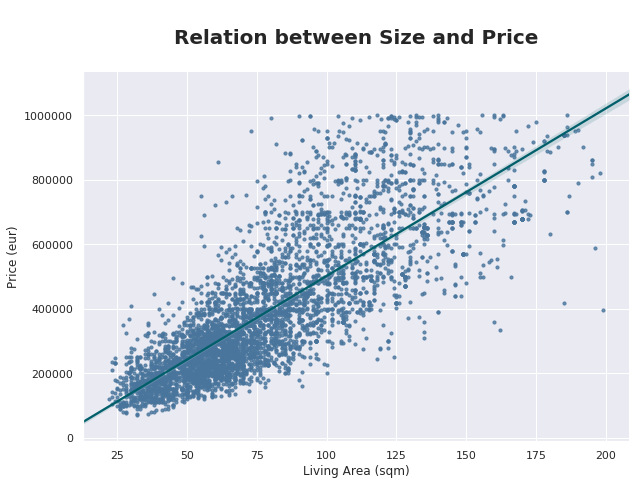

In [427]:
# set seaborn style
sns.set_style('darkgrid')
# plot regression line
lm= sns.lmplot(x='area',y='price',data=immo,aspect=1.5,height=6 ,
               line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
# x and y labels
axes = lm.axes
axes[0,0].set_xlabel('Living Area (sqm)')
axes[0,0].set_ylabel('Price (eur)')
# title
plt.title('\nRelation between Size and Price\n',y=1, fontsize=20, fontweight='bold')
plt.show()

In [428]:
# import functions to calculate lm coef and p value
from scipy import stats
pearson_coef_0, p_value_0 = stats.pearsonr(immo['area'], immo['price'])
print(f'Price vs Size :    Correlation Coefficient= {pearson_coef_0:0.2f}, p-value= {p_value_0}')

Price vs Size :    Correlation Coefficient= 0.81, p-value= 0.0


As can be seen on the regression plot and correlation coef, there is a strong relation between size and price, which is totally reasonable. Bigger apartments sell more expensive.

Let's look at Berlin distrcits and find which ones are the most and least expensive. In addition, we can find out which areas have the biggest and smalllest apartments.

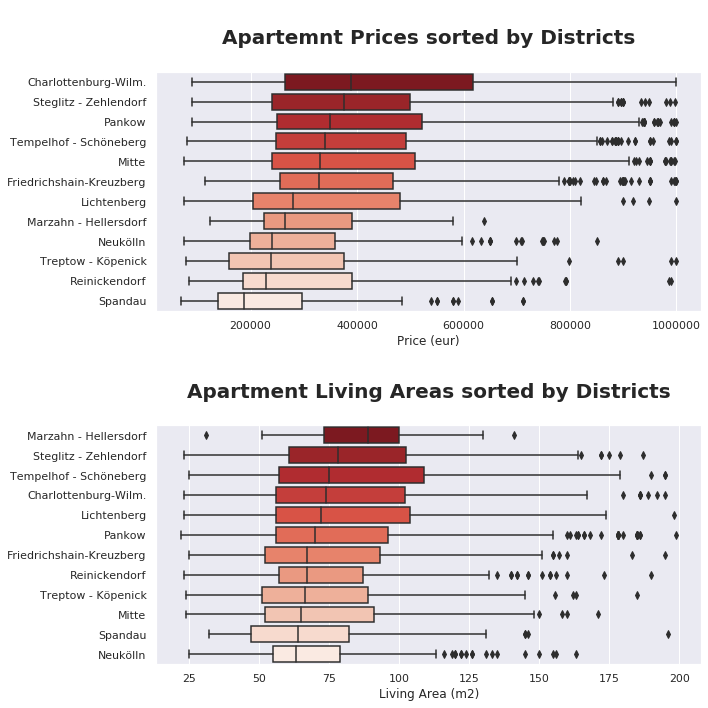

In [429]:
# fig size
plt.figure(figsize=(10,10))

# ax 1 for price
ax1=plt.subplot(211)
plt.title('\nApartemnt Prices sorted by Districts\n',y=1, fontsize=20, fontweight='bold')
# order by highest price
order= immo.groupby('district').median().sort_values('price',ascending=False).index
sns.boxplot(y="district", x="price", data=immo,order=order, palette='Reds_r')
plt.xlabel('Price (eur)')
plt.ylabel(None)

# ax2 for area
ax2=plt.subplot(212)
plt.title('\nApartment Living Areas sorted by Districts\n',y=1, fontsize=20, fontweight='bold')
# order by biggest apt
order= immo.groupby('district').median().sort_values('area',ascending=False).index
sns.boxplot(y="district", x="area", data=immo,order=order, palette='Reds_r')
plt.xlabel('Living Area (m2)')
plt.ylabel(None)

plt.tight_layout()

Based on these boxplots, the most expensive district with the highest median price is **Charlottenburg-Willmersdorf** and the least expensive district is **Spandau**. Moreover, **Marzahn-Hellersdorf** tend to have bigger apartments and **Neukölln** has the smallest apartments.

More specificly, we can analyze normalized house prices. The bar chart below shows apartment prices per square meter for Berlin districts.

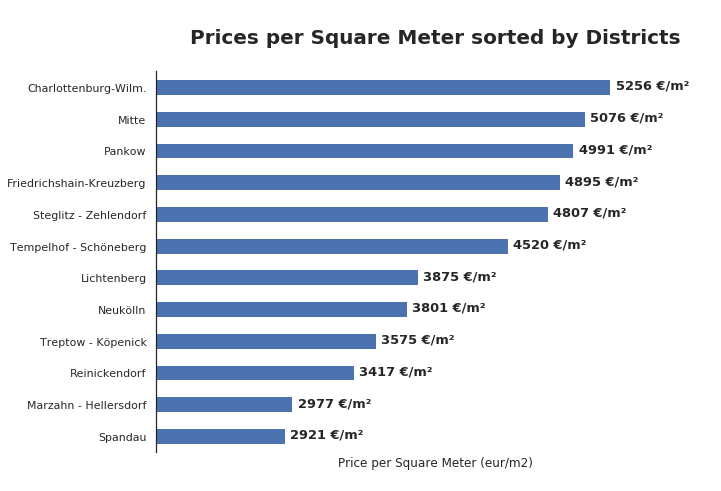

In [430]:
# set background to white
sns.set_style('white')

# bar plot
fig,ax = plt.subplots(nrows=1,ncols=1)
plt.title('\nPrices per Square Meter sorted by Districts\n',y=1, fontsize=20, fontweight='bold')
g= immo.groupby('district').median().apply(lambda x: x.price/x.area, axis=1).sort_values().plot(kind='barh',
                                                                                             figsize=((10,7)))
# function to write each bar value in front of it
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its value."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} €/m\u00b2'.format(int(rect.get_width())),
                    xy=(rect.get_width()+300, rect.get_y()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",size=13, fontweight='bold',
                    ha='center', va='bottom')
# apply autolabel func to the bars
autolabel(g.containers[0])
# hide spines
sns.despine(ax=ax, top=True, right=True, left=False, bottom=True)
# x,y labels, tickes and limits
plt.xticks([])
plt.xlim(2000,6000)
plt.xlabel('Price per Square Meter (eur/m2)\n')
plt.ylabel(None)
plt.show()

Furthermore, we can see the most and least expensive neighborhoods in Berlin.

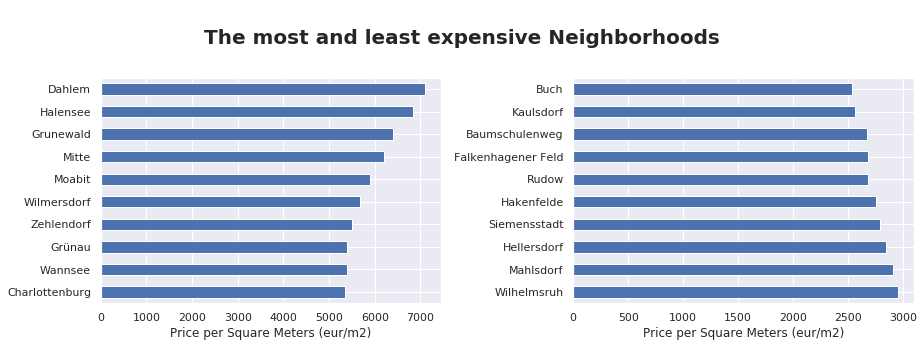

In [431]:
# creat figure
plt.figure(figsize=(13,4))
# set background back to darkgrid
sns.set_style('darkgrid')
# set title
plt.suptitle('\nThe most and least expensive Neighborhoods',y=1.2, fontsize=20, fontweight='bold')

# ax1 to plot the most expensive neighborhoods
ax1=plt.subplot(121)
immo.groupby('neighborhood').median().apply(lambda x: x.price/x.area, axis=1).\
sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Price per Square Meters (eur/m2)')
plt.ylabel(None)

# ax2 to plot the least expensive neighborhoods
ax2=plt.subplot(122)
immo.groupby('neighborhood').median().apply(lambda x: x.price/x.area, axis=1).\
sort_values(ascending=True).head(10).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Price per Square Meters (eur/m2)')
plt.ylabel(None)

plt.tight_layout()
plt.show()

### Areas with most available apartments

On the graph below, the hotspots with most available apartments can be seen.

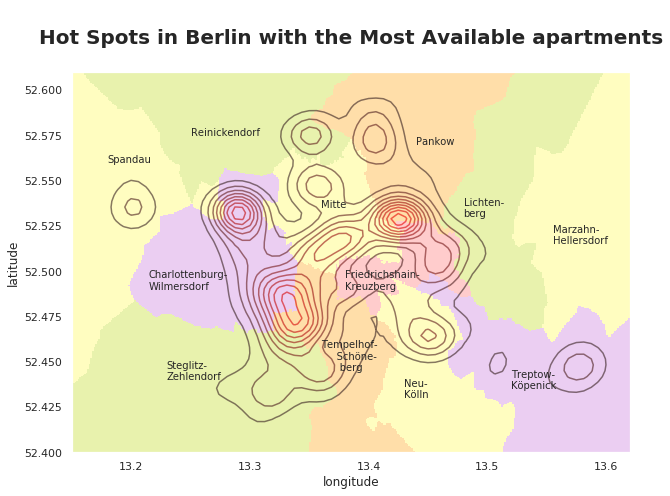

In [432]:
# creat figure and ax
fig, ax = plt.subplots(figsize=(10, 7))
# plot color mesh
plt.pcolormesh(xx, yy, Z, cmap=cmap)
# kde plot, apartment counts
sns.kdeplot(immo.longitude,immo.latitude,shade=False,shade_lowest=False, alpha=0.6, color='red')
plt.xlim(13.15,13.62)
plt.ylim(52.4,52.61)
# Label neighborhoods on map
ax.text(13.36, 52.535, 'Mitte', fontsize=10)
ax.text(13.44, 52.57, 'Pankow', fontsize=10)
ax.text(13.25, 52.575, 'Reinickendorf', fontsize=10)
ax.text(13.215, 52.49, 'Charlottenburg-\nWilmersdorf', fontsize=10)
ax.text(13.18, 52.56, 'Spandau', fontsize=10)
ax.text(13.23, 52.44, 'Steglitz-\nZehlendorf', fontsize=10)
ax.text(13.36, 52.445, 'Tempelhof-\n     Schöne-\n      berg', fontsize=10)
ax.text(13.38, 52.49, 'Friedrichshain-\nKreuzberg', fontsize=10)
ax.text(13.48, 52.53, 'Lichten-\nberg', fontsize=10)
ax.text(13.555, 52.515, 'Marzahn-\nHellersdorf', fontsize=10)
ax.text(13.52, 52.435, 'Treptow-\nKöpenick', fontsize=10)
ax.text(13.43, 52.43, 'Neu-\nKölln', fontsize=10)
# title
plt.title('\nHot Spots in Berlin with the Most Available apartments\n',y=1, fontsize=20, fontweight='bold')
plt.show()

### Prices and Distance to City Center

As anticipated, apartments near city center tend to sell more expensive.

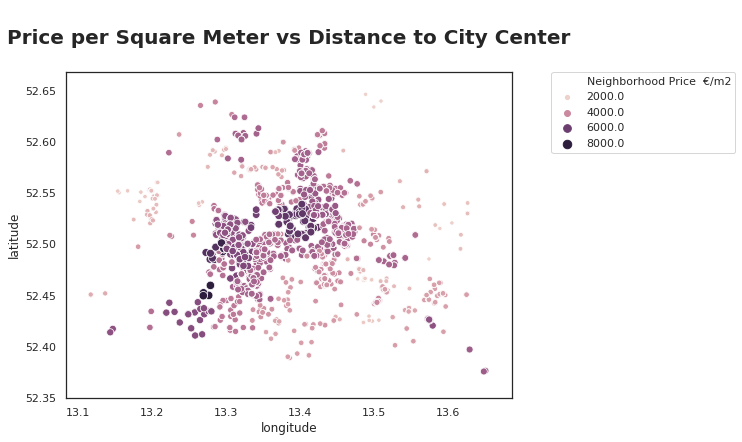

In [433]:
distance_df= immo.copy()
neigh_price= immo.groupby('neighborhood').median().apply(lambda x: x.price/x.area, axis=1)
distance_df['Neighborhood Price  €/m2']=distance_df['neighborhood'].apply(lambda x: neigh_price.loc[x])

sns.set_style('white')
plt.figure(figsize=(8,6))
ax= sns.scatterplot(x='longitude',y='latitude',data=distance_df, 
                    hue='Neighborhood Price  €/m2',size='Neighborhood Price  €/m2')
plt.title('\nPrice per Square Meter vs Distance to City Center\n',y=1, fontsize=20, fontweight='bold')
# hide spines
# sns.despine(ax=ax, top=True, right=True, left=True, bottom=True)
ax.legend(bbox_to_anchor=(1.5, 1), borderaxespad=0.)

# 2.6. Getting Foursquare Data

It is time to get Foursquare data for apartments in *ImmobilienScout* DataFrame. We already have the function *get_naerby_venues*. Using this function, we download the data and save it to a csv file. Because it takes some time to run it, we run it just once and comment out this block of code and read the saved csv data next times we run the notebook.

In [434]:
### add an  id column
immo.reset_index(drop=True, inplace=True)
immo['id']=immo.index

In [435]:
# ### get FS info
# fs_buy= get_nearby_venues(immo, log='all')

# ### save CSV file
# fs_buy.to_csv('fs_buy.csv', index=False)

In [436]:
# read csv file
fs_buy= pd.read_csv('fs_buy.csv')

In [437]:
# check shape of dataframe
fs_buy.shape

(161489, 2)

In [438]:
# head of daraframe
fs_buy.head()

id               categories
0   0                   Bakery
1   0    Portuguese Restaurant
2   0       Spanish Restaurant
3   0  Health & Beauty Service
4   0                 Boutique

In [439]:
# apply sum_up_cats func to fs dataframe
fs_buy['cat2']=fs_buy['categories'].apply(sum_up_cats)

In [440]:
# One Hot Encoding the venues
cat_onehot = pd.get_dummies(fs_buy['cat2'])
# concatenate gummies
fs_buy2=pd.concat([fs_buy,cat_onehot],axis=1)

In [441]:
# Foursquare data is ready
fs_buy2_final= fs_buy2.groupby('id').sum()[sl]

In [442]:
fs_buy2_final.head()

Restaurant  Bar  Café  Coffee Shop  Bakery  Hotel  Ice Cream Shop  \
id                                                                      
0           25    4     2            1       4     14               0   
1            3    0     0            0       1      1               0   
2           31   15     9            4       1      3               2   
3            2    0     0            0       2      0               0   
4            0    0     0            0       0      0               0   

    Supermarket  Pizza Place  Pub  
id                                 
0             1            0    1  
1             2            0    0  
2             0            1    0  
3             4            0    0  
4             0            0    0

# 3. Predicting Yearly Incomes and Fincancial Analysis

## 3.1. Processing ImmobilienScout Data

Before we can predict yearly incomes with our model, we have to process all the required features in the immo dataframe. We start to fill the missing ones.

### Host Profiles

*host_identity_verified* and *instant_bookable* will be set to one. Because we are gonna have a verified account and offer instant booking.

In [443]:
immo_final= immo.copy()

In [444]:
immo_final['host_identity_verified']=1
immo_final['instant_bookable']=1

### Amenities

*bed_type*, *private* and *luggage_dropoff* will be set to one. We will provide real beds and luggage dropoff option. Also the entire apartment will be rented out.

In [445]:
immo_final['bed_type']=1
immo_final['private']=1
immo_final['luggage_dropoff']=1

*stairless*, *elevator* and *balcony* can be read from the amenities list.

In [446]:
immo_final['criteria'].fillna('empty', inplace=True)

In [447]:
immo_final['stairless']=immo_final['criteria'].apply(lambda x: 1 if 'Stufenlos' in x else 0)
immo_final['balcony']=immo_final['criteria'].apply(lambda x: 1 if 'Balkon/Terrasse' in x else 0)
immo_final['elevator']=immo_final['criteria'].apply(lambda x: 1 if 'Aufzug' in x else 0)

### Cancellation

We set cancellation policy to *strict*.

In [448]:
immo_final['moderate']=0
immo_final['strict']=1


### Area

In [449]:
immo_final.rename(columns={'area':'size'}, inplace=True)

### Neighborhoods

We should now take care of neighborhoods the same way we categorize them in our model.

In [450]:
immo_final['loc']= immo_final['neighborhood'].apply(lambda x: x +' (nh)' if x in neigh else np.nan)

In [451]:
immo_final['loc'].isnull().sum()

2524

In [452]:
immo_final['loc'].fillna(immo_final[immo_final['loc'].isnull()]['district'], inplace=True)

In [453]:
immo_final['loc']=  immo_final['loc'].apply(lambda x: 'other' if x in other else x)

In [454]:
immo_final['loc'].value_counts()

other                   2217
Prenzlauer Berg (nh)     440
Schöneberg (nh)          352
Wilmersdorf (nh)         315
Mitte (nh)               300
Friedrichshain (nh)      280
Neukölln (nh)            260
Charlottenburg (nh)      225
Kreuzberg (nh)           204
Mitte                    198
Wedding (nh)             186
Lichtenberg              109
Moabit (nh)               26
Name: loc, dtype: int64

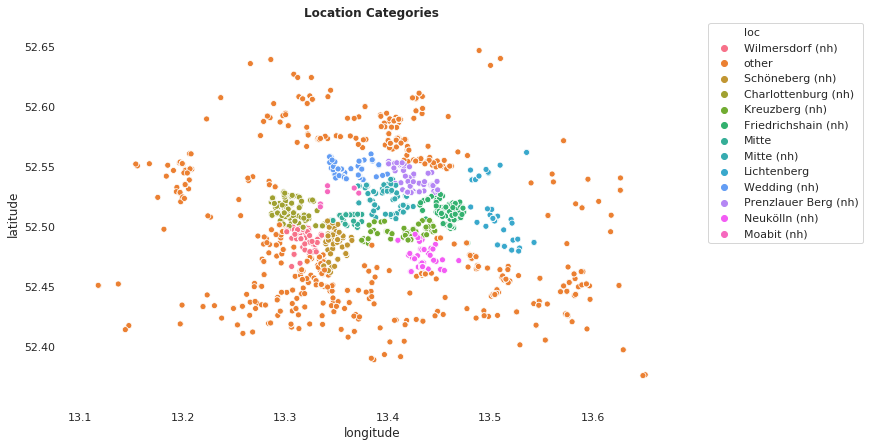

In [455]:
# prepare plot

sns.set_style("white")
fig, ax = plt.subplots(figsize=(11,7))

# draw scatter plot
ax = sns.scatterplot(x="longitude", y="latitude", hue='loc',  data=immo_final)

ax.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.title('Location Categories', fontsize=12, fontweight='bold')

# remove spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

The ImmobilienScout dataframe has all the features and is ready for our model.

## 3.1. Predicting Yearly Incomes 

We build a model with all of the data in airbnb dataframe.

In [456]:
# select a list of 10 top venue categories
sl= fs2['cat2'].value_counts().head(10).index.tolist()
# merge airbnb dataframe with foursquare data
airbnb_fs= airbnb.merge(fs2.groupby('id').sum()[sl].reset_index(),on='id',how='inner')
# keep features that we need
features= airbnb_fs.drop(columns=['id','neighbourhood','neighbourhood_group_cleansed', 'latitude',
                                  'host_is_superhost', 'longitude', 'accommodates','price', 'cleaning_fee', 
                                  'guests_included', 'extra_people','review_scores_rating', 
                                  'cancellation_policy', 'yearly_income'], axis=1)
# Making dummy variable
cat_dummy = pd.get_dummies(features['loc'])
features=pd.concat([features,cat_dummy],axis=1)
features.drop('other', axis=1, inplace=True)
features.drop('loc',axis=1,inplace=True)

# Set X and Y to split the data
X= features
y= airbnb_fs['yearly_income']

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

It is time to apply the model to immo data and predict incomes.

In [457]:
# merge airbnb dataframe with foursquare data
immo_predicted= immo_final.merge(fs_buy2_final.reset_index(),on='id',how='inner')

In [458]:
# keep features that we need
immo_features= immo_predicted.drop(columns=['address', 'rooms', 'criteria', 'price', 'longitude','latitude',
                             'district', 'neighborhood', 'id'], axis=1)

In [459]:
# Making dummy variable
cat_dummy2 = pd.get_dummies(immo_features['loc'])
immo_features=pd.concat([immo_features,cat_dummy2],axis=1)
immo_features.drop('other', axis=1, inplace=True)
immo_features.drop('loc',axis=1,inplace=True)

In [460]:
# right order
immo_features= immo_features[features.columns]

In [461]:
# yearly incomes predictions
immo_predicted['yearly_incomes_predicted']=rf.predict(immo_features)

In [462]:
immo_predicted.yearly_incomes_predicted.head()

0    33134.677
1    34133.913
2    27159.212
3    43207.965
4    25749.154
Name: yearly_incomes_predicted, dtype: float64

Well, it worked very well. Let's discuss the results in next chapter.

## 3.2. Results Evaluation

First of all, let's look at the predicted values.

### Yearly Incomes Distribution

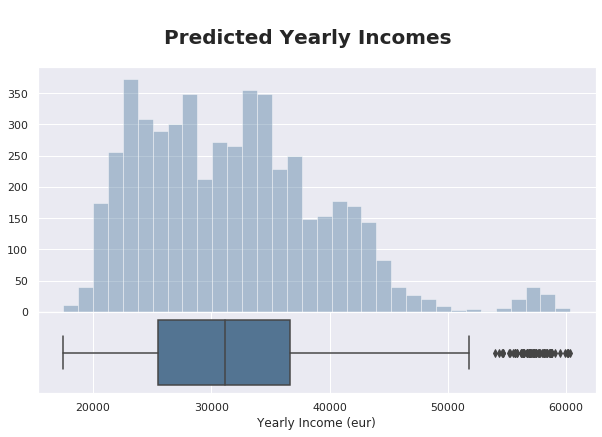

In [463]:
# set seaborn style
sns.set_style('darkgrid')
# import gridspec func for subplots with different sizes
from matplotlib import gridspec
# creat figure
fig = plt.figure(figsize=(10, 6)) 
fig.suptitle('\nPredicted Yearly Incomes',y=1.02, fontsize=20, fontweight='bold')
# creat 2 subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
# creat ax0 and ax1 for two plots
ax0 = plt.subplot(gs[0])
ax0.set_xticks([])
ax1 = plt.subplot(gs[1])
# histogram of size distribution
sns.distplot(a=immo_predicted['yearly_incomes_predicted'], ax=ax0, kde=False,color='#49759c')
ax0.set_xlabel(None)
# boxplot of size distribution
sns.boxplot(x='yearly_incomes_predicted', data=immo_predicted, ax=ax1,color='#49759c')
ax1.set_xlabel('Yearly Income (eur)')
plt.show()

In [464]:
print('Median Yearly Income: ' ,np.median(immo_predicted.yearly_incomes_predicted))

Median Yearly Income:  31151.941


The distribution looks fine, and the median yearly income is reasonable.

### Rooms, Size and Distance

In the graphs below, we can how the number of rooms, living area and distance from city center relate to yearly income. 

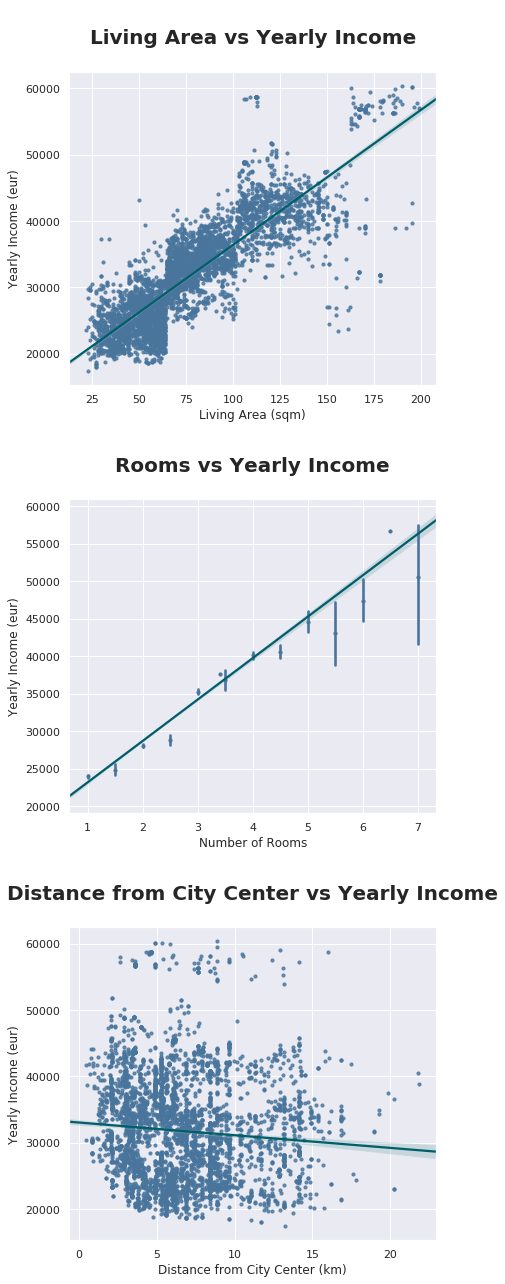

In [465]:
plt.figure(figsize=(7,18))

ax1=plt.subplot(311)
sns.regplot(x='size', y='yearly_incomes_predicted', data=immo_predicted, ax=ax1,
                line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
# x and y labels
ax1.set_xlabel('Living Area (sqm)')
ax1.set_ylabel('Yearly Income (eur)')
# title
plt.title('\nLiving Area vs Yearly Income\n',y=1, fontsize=20, fontweight='bold')

ax2=plt.subplot(312)
sns.regplot(x='rooms', y='yearly_incomes_predicted', data=immo_predicted, ax=ax2, x_estimator=np.mean,
                line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
# x and y labels
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Yearly Income (eur)')
# title
plt.title('\nRooms vs Yearly Income\n',y=1, fontsize=20, fontweight='bold')

ax3=plt.subplot(313)
sns.regplot(x='distance', y='yearly_incomes_predicted', data=immo_predicted, ax=ax3,
                line_kws={'color': '#005f6a'},scatter_kws={'color': '#49759c','s':10})
# x and y labels
ax3.set_xlabel('Distance from City Center (km)')
ax3.set_ylabel('Yearly Income (eur)')
# title
plt.title('\nDistance from City Center vs Yearly Income\n',y=1, fontsize=20, fontweight='bold')

plt.tight_layout()

All of the relations look resonable.

### Price

Now Let's look at the most important factor. Relation between apartment prices and yearly incomes.

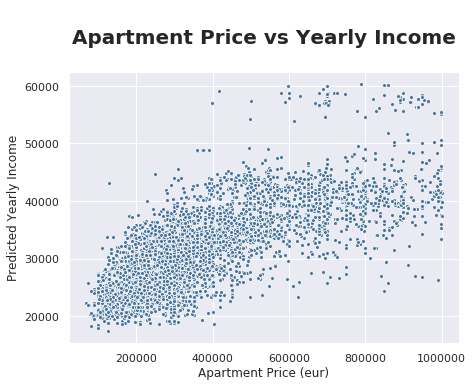

In [466]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='price', y='yearly_incomes_predicted', data=immo_predicted, color='#49759c', s=15)
plt.xlabel('Apartment Price (eur)')
plt.ylabel('Predicted Yearly Income')
plt.title('\nApartment Price vs Yearly Income\n', fontsize=20, fontweight='bold')
plt.show()

Scatterplot shows that there is a positive relation between apartment prices and their yearly income on Airbnb. The more you pay for the house, the higher is your income. That makes sense. But this holds true to a certain amount. It is observed that income will not get much higher as apartments start to cost more than 600 k€. 

In [467]:
immo_predicted.to_pickle('immo_predicted.pkl')
immo_predicted.to_csv('immo_predicted.csv', index=False)

In [468]:
immo_predicted= pd.read_pickle('immo_predicted.pkl')

## 3.3. Financial Analysis

Buying an investment property requires much more than just finding a property and making a purchase. The goal is to make the best real estate investments. One of the most important things is the investment property analysis. 


This project calculates **Return On Investment (ROI)** for the rental properties, as a measure to determine  profitability. Return on Investment (ROI) is a performance measure used to evaluate the efficiency of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost. To calculate ROI, we have to calculate *Annual Gain on Invesment*, *Cost of Investment* and *Total Cost of Investment*.

### Annual Gain on Invesment

Annu Gain on Investment is the Income. That is what we built our machine learning model for.

$$Annual\ Gain\ on\ Investment = Predicted\ Yearly\ Income$$

### Cost of Investment

Cost of Investment is simply the Expenses of the apartment. The main expenses that we take into accounts are:

* Utilities (Electricity, Hot Water, Heat, ...)
* Repairs
* Mortage

Let's discuss each one in detail.

#### Utilities:

Energy Consumption accounts for a major part of expemses. We assume that it mainly consists of electricity, hot water and heat costs. To make this calculation easy, we assume a 30 sqm apartment and a 150 sqm amartment consume respectivly about 2000 kWh and 6000 kWh. With an average energy price in Germany in 2019 equal to 31,94 eur, we have:

$$Annual\ Utilities\ Cost = Annual\ Energy\ Consumption\ (kWh) \times 31.94\ (€cent/kWh)$$

In [469]:
# Define the known points
x = [30, 150]
y = [2000, 6000]

# Calculate the coefficients.
coefficients = np.polyfit(x, y, 1)

# Let's compute the energy consumption based on size in 
energy_consumption = np.poly1d(coefficients)
immo_predicted['energy_consumption']= immo_predicted['size'].apply(energy_consumption)

# Annual Utilites Cost
immo_predicted['utilities']= immo_predicted['energy_consumption'].apply(lambda x: x*0.3194)

#### Repairs:

It depends highly on the age of apartment, but we assume that every 100 sqm needs 100 eur repair cost per month.

$$Annual\ Repairs\ Cost = Living\ Area \times 12\ (month)$$

In [470]:
# Repair Cost
immo_predicted['repair']= immo_predicted['size']*12

#### Mortage:

We assume that we have 20% of the apartment price as Down Payment and we get a loan for the rest 80%, which we have to pay back as monthly payments. The fixed monthly payment for a fixed rate mortgage is the amount paid by the borrower every month that ensures that the loan is paid off in full with interest at the end of its term. With a fixed rate mortgage, monthly mortgage payment is calculated as follows:


$$ M = P \times \frac{r (1+r)^n}{(1+r)^n-1} $$

Where:
    * M = the total monthly mortgage payment
    * P = the principal loan amount
    * r = the monthly interest rate. Lenders usually provide an annual rate so we’ll need to divide that by 12
    * n = number of payments over the loan’s lifetime (Multiply the number of years in the loan term by 12 to get the number of payments for the loan)

\
**Assumption**: We assume that the loan's lifetime is 20 years and the interest rate is 1.7%.

In [471]:
# number of payments (20 years * 12 month)
n= 20*12

# yearly interest rate
interest_rate= 0.017
# monthly interest rate
r= interest_rate / 12

# Mortage Formula
mortage = lambda P: P * r * ((1+r)**n) / (((1+r)**n)-1)

### Total Cost:

In order to calculate *Principal Loan Amount*, we have to first calculate *Total Cost*. Total Cost consists of apartment price and closing costs. The closing costs of buying an apartment in Germany include

* **Notary costs and land registry fee= 2.5%**
* **Real estate tax= 6%**\
the German government taxes property purchases. In Berlin, for example, the tax amounts to 6% of the purchase price.
* **Real estate agency fee= 5.95%**

So closing cost is calculated as follows:

$$Closing\ Cost = Notary Costs and Land Registry Fee + Real Estate Tax + Real Estate Agency Fee$$

And Total Cost is:

$$Total\ Cost = Closing\ Cost + Apartment\ Price$$

In [472]:
immo_predicted['total_cost']= immo_predicted['price'] * (1+0.025+0.06+0.0595)

The principal loan amount can then be calculated as:

$$Principal\ Loan\ Amount = Total\ Cost - Down\ Payment$$

In [473]:
immo_predicted['down_payment']= immo_predicted['price'] * 0.2
immo_predicted['loan']= immo_predicted['total_cost'] - immo_predicted['down_payment']

And now we can calculate mortage:

In [474]:
immo_predicted['mortage_monthly']= immo_predicted['loan'].apply(mortage)
immo_predicted['mortage_yearly']= immo_predicted['mortage_monthly']*12

and *Cost of Investment*:

$$Cost\ of\ Investment = Annual\ Utilities\ Cost  + Annual\ Repairs\ Cost + Annual\ Mortage\ Payment$$

In [475]:
immo_predicted['cost_of_investment']= immo_predicted['utilities']+\
                                      immo_predicted['repair']+\
                                      immo_predicted['mortage_yearly']

### Cash Flow

In real estate terms, cash flow is the byproduct of owning a rental property and leasing it to tenants for a monthly rental income. It can be calculated as:

$$Cash\ flow = Gain\ on\ Investment - Cost\ of\ Investment$$

In [476]:
immo_predicted['cash_flow'] = immo_predicted['yearly_incomes_predicted'] - immo_predicted['cost_of_investment']
immo_predicted['cash_flow_monthly'] = immo_predicted['cash_flow']/12

### Return on Investment (ROI)

To calculate ROI, Cash Flow of an investment is divided by the Total Investment. In this case, our total investment is equal to our down payment. The result is expressed as a percentage or a ratio.

\
$$ROI = \frac{Annual\ Cash\ Flow}{Total\ Investment}$$

In [477]:
immo_predicted['ROI']= immo_predicted['cash_flow']/ immo_predicted['down_payment']

### Most Profitable Apartments: Final Results

Here we see the top apartments sorted by highest ROI value.

In [478]:
immo_predicted.sort_values(by='ROI', ascending=False).head(10)

address  size  rooms  \
164   Beusselstraße xxx, Tiergarten (Tiergarten), Be...  36.0    1.0   
2871     Goerzallee 24, Lichterfelde (Steglitz), Berlin  50.0    2.0   
3550                          Spandau (Spandau), Berlin  32.0    1.0   
3798     Stadtrandstraße 488, Spandau (Spandau), Berlin  37.0    1.0   
3787    Neu-Hohenschönhausen (Hohenschönhausen), Berlin  32.0    1.0   
1196         Isarstraße 12, Neukölln (Neukölln), Berlin  28.0    1.0   
3981                              Buch (Pankow), Berlin  49.0    2.0   
999                     Tiergarten (Tiergarten), Berlin  25.0    1.0   
4396                    Tiergarten (Tiergarten), Berlin  26.0    1.0   
5052   Eichhorster Straße 14, Marzahn (Marzahn), Berlin  31.0    2.0   

                                    criteria     price  longitude  latitude  \
164       [Provisionsfrei*, Balkon/Terrasse]   74000.0   13.35476  52.50933   
2871  [Balkon/Terrasse, Einbauküche, Keller]  129000.0   13.30677  52.42967   
3550                                   empty   69000.0   13.20217  52.53487   
3798                        [Keller, Aufzug]   80000.0   13.15396  52.55196   
3787                        [Keller, Aufzug]   74000.0   13.53544  52.56163   
1196                                   empty   75000.0   13.43201  52.48111   
3981               [Balkon/Terrasse, Keller]  110000.0   13.40248  52.56926   
999                                 [Keller]   99000.0   13.37171  52.51960   
4396                                   empty   99000.0   13.37171  52.51960   
5052    [Stufenlos, Balkon/Terrasse, Aufzug]  123760.0   13.57153  52.57135   

       distance               district          neighborhood    id  \
164    3.422558                  Mitte            Tiergarten   164   
2871  10.470170  Steglitz - Zehlendorf          Lichterfelde  2872   
3550  14.125882                Spandau               Spandau  3552   
3798  17.787943                Spandau    Falkenhagener Feld  3801   
3787  11.030143            Lichtenberg  Neu-Hohenschönhausen  3790   
1196   3.059231               Neukölln              Neukölln  1197   
3981   7.393133                 Pankow                Pankow  3984   
999    2.885050                  Mitte                 Mitte  1000   
4396   2.885050                  Mitte                 Mitte  4399   
5052  13.647737  Marzahn - Hellersdorf               Marzahn  5055   

      host_identity_verified  instant_bookable  bed_type  private  ...  \
164                        1                 1         1        1  ...   
2871                       1                 1         1        1  ...   
3550                       1                 1         1        1  ...   
3798                       1                 1         1        1  ...   
3787                       1                 1         1        1  ...   
1196                       1                 1         1        1  ...   
3981                       1                 1         1        1  ...   
999                        1                 1         1        1  ...   
4396                       1                 1         1        1  ...   
5052                       1                 1         1        1  ...   

      Pizza Place  Pub  yearly_incomes_predicted  energy_consumption  \
164             0    0                 25809.007         2200.000000   
2871            0    0                 43133.500         2666.666667   
3550            0    2                 22278.804         2066.666667   
3798            0    0                 24390.238         2233.333333   
3787            0    0                 22017.755         2066.666667   
1196            2    3                 22033.772         1933.333333   
3981            0    1                 31902.492         2633.333333   
999             0    0                 27474.213         1833.333333   
4396            0    0                 27366.590         1866.666667   
5052            1    0                 33802.614         2033.333333   

      

ROI values look incredible. But I would say they may not be 100% accurate. Anyway, most real estate experts agree anything above 10% is a good return on investment. Our first top 10 values are between 104% and 139%, which show very high profitable investment.

Let's take a closer look at the first apartement in the list, the winner:
* It costs 74,000 eur which is very reasonable price
* It is 36 sqm. which would be great for a single or a couple to stay
* It is located in **Tiergarten** in the middle of the city, and the location on map shows that it is near a subway station
* It has a balcony

All of these suggest that this apartment has a great potential. I looked it up at ImmobilienScout and here is a picture:

In [479]:
from IPython.display import display, Image

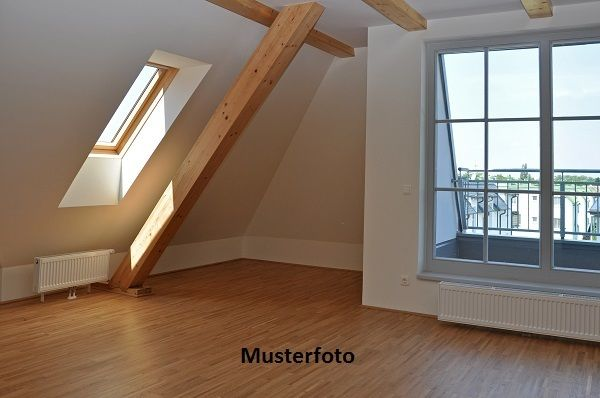

In [480]:
winner= Image(filename='winner_apt.jpeg')
display(winner)

The picture is good. The apartment looks nice. Let's take a look at numbers:
* Down Payment is only 15,000 eur
* monthly mortage is only 344 eur
* ROI is 138%!
* monthly cash flow is 1713 eur

All the numbers suggest a very profitable investment. Let's find put if the predicted yearly income was reasonable for this apartment. 

In [481]:
print('Predicted Yearly Income: ', int(immo_predicted['yearly_incomes_predicted'].loc[164]), 'eur')

Predicted Yearly Income:  25809 eur


With our assumed occupancy model, which suggested the apartment is occupied 40 weeks a year, price per night for this apartment is:

In [482]:
print('Price per Night: ' , int(immo_predicted['yearly_incomes_predicted'].loc[164]/(40*7)), 'eur/night')

Price per Night:  92 eur/night


It looks reasonable based on its location and the fact that it is offered as an entire place but to make sure I performed a search on Airbnb and here is the result:

In [483]:
import matplotlib.image as mpimg

In [484]:
img1 = mpimg.imread('winner_map.png')
img2 = mpimg.imread('winner_airbnb.png')

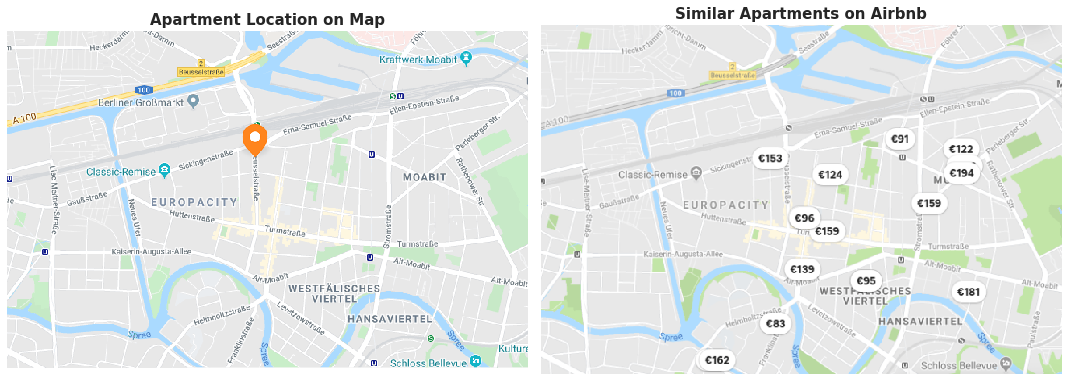

In [485]:
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.imshow(img1.data)
plt.title('Apartment Location on Map', fontsize=15, fontweight='bold')
plt.xticks([])
plt.yticks([])
sns.despine(left=True,bottom=True)

plt.subplot(122)
plt.title('Similar Apartments on Airbnb', fontsize=15, fontweight='bold')
plt.imshow(img2.data)
plt.xticks([])
plt.yticks([])
sns.despine(left=True,bottom=True)

plt.tight_layout()

The search result on Airbnb (price per night for a couple looking for an entire place ) shows that in this location the aprtments' rent per night starts from 91 eur. Our predicted value of 92 eur/night looks to be a resonable price.

All in all, the analysis makes sense and the **36 sqm flat in Beusselstr, Tiergarten** looks to be an intresting investment.

Let's take a look at other intresting apartments in tourist friendly neighborhoods:

In [486]:
tourist_neigh= ['Prenzlauer Berg', 'Schöneberg', 'Wilmersdorf', 'Mitte','Friedrichshain',  'Moabit',
                'Neukölln', 'Charlottenburg', 'Kreuzberg', 'Wedding', 'Tiergarten', 'Potsdamer Platz']
immo_predicted[immo_predicted['neighborhood'].apply(lambda x: x in tourist_neigh)]\
.sort_values(by='ROI', ascending=False).head(5)

address  size  rooms  \
164   Beusselstraße xxx, Tiergarten (Tiergarten), Be...  36.0    1.0   
1196         Isarstraße 12, Neukölln (Neukölln), Berlin  28.0    1.0   
999                     Tiergarten (Tiergarten), Berlin  25.0    1.0   
4396                    Tiergarten (Tiergarten), Berlin  26.0    1.0   
3303  Stephanstraße 50, Tiergarten (Tiergarten), Berlin  26.0    1.0   

                                criteria    price  longitude  latitude  \
164   [Provisionsfrei*, Balkon/Terrasse]  74000.0   13.35476  52.50933   
1196                               empty  75000.0   13.43201  52.48111   
999                             [Keller]  99000.0   13.37171  52.51960   
4396                               empty  99000.0   13.37171  52.51960   
3303                               empty  99000.0   13.35315  52.50928   

      distance  district neighborhood    id  host_identity_verified  \
164   3.422558     Mitte   Tiergarten   164                       1   
1196  3.059231  Neukölln     Neukölln  1197                       1   
999   2.885050     Mitte        Mitte  1000                       1   
4396  2.885050     Mitte        Mitte  4399                       1   
3303  3.527965     Mitte   Tiergarten  3305                       1   

      instant_bookable  bed_type  private  ...  Pizza Place  Pub  \
164                  1         1        1  ...            0    0   
1196                 1         1        1  ...            2    3   
999                  1         1        1  ...            0    0   
4396                 1         1        1  ...            0    0   
3303                 1         1        1  ...            0    0   

      yearly_incomes_predicted  energy_consumption   utilities  repair  \
164                  25809.007         2200.000000  702.680000   432.0   
1196                 22033.772         1933.333333  617.506667   336.0   
999                  27474.213         1833.333333  585.566667   300.0   
4396                 27366.590         1866.666667  596.213333   312.0   
3303                 24957.296         1866.666667  596.213333   312.0   

     total_cost  down_payment     loan  mortage_monthly  mortage_yearly  \
164     84693.0       14800.0  69893.0       343.732671     4124.792051   
1196    85837.5       15000.0  70837.5       348.377707     4180.532484   
999    113305.5       19800.0  93505.5       459.858573     5518.302879   
4396   113305.5       19800.0  93505.5       459.858573     5518.302879   
3303   113305.5       19800.0  93505.5       459.858573     5518.302879   

      cost_of_investment     cash_flow  cash_flow_monthly       ROI  
164          5259.472051  20549.534949        1712.461246  1.388482  
1196         5134.039151  16899.732849        1408.311071  1.126649  
999          6403.869546  21070.343454        1755.861954  1.064159  
4396         6426.516213  20940.073787        1745.006149  1.057579  
3303         6426.516213  18530.779787        1544.231649  0.935898  

[5 rows x 45 columns]

## 3.4. Discussion

Let's look at all the calculated values for ROI.

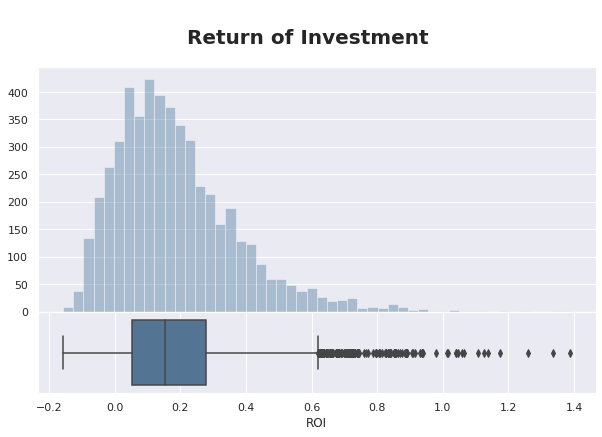

In [487]:
# set seaborn style
sns.set_style('darkgrid')
# import gridspec func for subplots with different sizes
from matplotlib import gridspec
# creat figure
fig = plt.figure(figsize=(10, 6)) 
fig.suptitle('\nReturn of Investment',y=1.02, fontsize=20, fontweight='bold')
# creat 2 subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1], hspace=0)
# creat ax0 and ax1 for two plots
ax0 = plt.subplot(gs[0])
ax0.set_xticks([])
ax1 = plt.subplot(gs[1])
# histogram of ROI distribution
sns.distplot(a=immo_predicted['ROI'], ax=ax0, kde=False,color='#49759c')
ax0.set_xlabel(None)
# boxplot of ROI distribution
sns.boxplot(x='ROI', data=immo_predicted, ax=ax1,color='#49759c')
ax1.set_xlabel('ROI')
plt.show()

In [488]:
print('ROI Median Value:' ,int(np.median(immo_predicted.ROI)*100),'%')

ROI Median Value: 15 %


The median Value for ROI is about 15%, which shows generally speaking that's a good idea to invest in this business. But as can be seen, there are properties with a ROI value down to -20%. That means not all of them would be profitable and we can not just buy any property.

Let's look at the numbers for top 50 apartments:

In [489]:
filter_cols=['ROI','cash_flow_monthly','size', 'price','yearly_incomes_predicted',
             'down_payment','mortage_monthly',]

In [490]:
immo_predicted.sort_values(by='ROI', ascending=False).head(50)[['district','neighborhood']].describe()

district neighborhood
count        50           50
unique       11           23
top       Mitte   Tiergarten
freq         15            8

In [491]:
immo_predicted.sort_values(by='ROI', ascending=False).head(50).describe()[filter_cols]

ROI  cash_flow_monthly       size          price  \
count  50.000000          50.000000  50.000000      50.000000   
mean    0.946560        1612.466579  36.600000  103276.600000   
std     0.134842         272.038121  10.347039   16957.705444   
min     0.822656        1165.429432  25.000000   69000.000000   
25%     0.852781        1429.584399  29.250000   92000.000000   
50%     0.889972        1561.327265  33.000000  100250.000000   
75%     1.014815        1712.033298  43.000000  114975.000000   
max     1.388482        2874.270899  67.000000  139000.000000   

       yearly_incomes_predicted  down_payment  mortage_monthly  
count                 50.000000     50.000000        50.000000  
mean               26254.549360  20655.320000       479.723535  
std                 4049.216342   3391.541089        78.769154  
min                19925.710000  13800.000000       320.507490  
25%                23723.003500  18400.000000       427.343321  
50%                25212.584500  20050.000000       465.664868  
75%                27891.217000  22995.000000       534.063025  
max                43133.500000  27800.000000       645.660017

As can be seen:
* The median ROI is 89% 
* The median size is 33 sqm
* The median price is 100,000 eur
* The most frequent neighborhood is Tiergarten, Mitte

So, our model suggests that it is better to buy a small and relatively cheap apartment in a good location. 35 sqm seems to be perfect for two guests who would probably rather stay near city center than have a 100 sqm apartment. The number all add up, and I believe they make total sense. 

In case we really want to buy a property, we can check the top apartments profile on ImmobilienScout website and finally make a decision.

# 4. Summary and Conclusion

## Stating and refining the question

This project started with an idea: Let us buy an apartment and rent it out on Airbnb and make a lot of money! But before we got too excited about our idea, we knew we have to dig this idea deeper and do analysis. So we started to ask: Is this even a true statement? After researching and getting an insight over available data on Internet, we found out it is resonable to have this expectation. But we didn't know to what extent. That formed the question which drove this project:

> **Is an Airbnb Investment Right for me? if yes, how can I find the best Airbnb rental properties in Berlin to buy and which property should I buy?**

## Exploring the data

The data driven solution is to use airbnb data to build a price prediction model. Then get the real estate data and apply the price prediction model. Finally using financial analysis, we can find out if this investment is profitable or not, and if profitable, which property is the best one to buy. To do all of these, required data are collected from different sources.

The datasets used in this project are:
1. Berlin Airbnb listings: I was lucky to find this dataset already scraped in a website called [insideairbnb](www.insideairbnb.com). This saved me a lot of time.
2. List of apartments for sale in Berlin: This time I had to scrap data directly from a website called [ImmobilienScout24](www.immobilienscout24.de), which is an online marketplace for real estate in Germany.
3. Popular Venues in Berlin: This data is extracted form [Foursquare](developer.foursquare.com) Database using their Rest API.
4. Geo-location Data: Using [HERE](www.here.com) Rest Api, we could access a geocoder, which can extract coordinates of apartments.

After obtaining airbnb data, it had to get **cleaned** in the first step. We dealed with **missing value**. Then used **feature engineering** to extract usefull features, such as living area, amenities or distance from city center. **Exploratory Data Analysis** helped us to get better insight over airbnb statistics. Along the way we used **unsupervised machine learning algorithm**, **K-Means_Clustering** to be more specific, to explore airbnb dataset further and to segment berlin neighborhoods. 

Real estate data was scraped from ImmobilienScout website. After cleaning data and dealing with missing values in this dataset, we made exploratory plots of data. This led to a better understanding of real estate market in berlin and currently available apartments.

## Building formal statistical models

Since a quantity needs to predicted in order to solve this machine learing problem, we used **Regression Algorithms**. Different estimators such as **Lienar Regressor**, **Polynomial Regressor**, **Random Forest Regressor** and **Support Vector Machine Regressor** are used and compared. The measure used for comparing these algorithms is **Root Mean Square Error (RMSE)**.

To **refine the model**, **Foursquare Data** are downloaded using their **Rest Api**. It adds information about nearby venues which led to a **lower RMSE** and a **better model**.

Before we could apply the model on real estate data, we had to build missing features. Apartments' coordinates were downloaded using HERE Rest Api. Neighborhoods were predicted using a **Classification Algorithm** called **K-Nearest-Neighbors**. This classifier used airbnb data for training and with **cross validation** showed an **accuracy score** of more than 99%.

## Interpreting the results

Using our price prediction model, we could successfully predict yearly income of each apartment. These Incomes alone are not enough for decision making. We did financial analysis to determine profitability of properties. This project calculates Return On Investment (ROI) to evaluate the efficiency of an investment. After calculating this metric, a strong model is generated which answered our questions:

* Is an Airbnb Investment Right for me?
ROI values show this kind of investment is generally profitable. But Not always! You have to find the right property which brings to to second question?

* How can I find the best Airbnb rental properties in Berlin to buy and which property should I buy?
By sorting ROI values from high to low we can investigate top apartments and chose between them.

---------

This project was a part of IBM Data Science Capstone Project.\
Author: [Siavash Saki](https://www.linkedin.com/in/siavash-saki/)\
MIT License

-------